In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import data: df_2021
# proposed dataset from DataScientest: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021
df_2021 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSwTDKrckE-pJG2Ann87URyzlloBRxqqlpMbe56N9mR3Wo6TmXRCK_rAzlDcc7euaT4ZX1frg4cKHAh/pub?output=csv')

In [3]:
# import data: df_historical
# proposed dataset from DataScientest: https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021
df_historical = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQfUTWvM-v16hCvJwnoJnt02pIw-ABKdzvzzRX35sF1RM2xq4Jy8y7d-pCk4y6Z-XrW0z0iIZIsjy0S/pub?output=csv')

In [4]:
# show information on df_2021
df_2021.info()
df_2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    int64  
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    int64  
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    int64  
 10  Generosity    

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                              32         7.904         7.780   
1                              35         7.687         7.552   
2                              36         7.643         7.500   
3                              59         7.670         7.438   
4                              27         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775             954                     72.0   
1                 10.933             954                     72.7   
2                 11.117             942                     74.4   
3                 10.878             983                     73.0   
4                 10.932             942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                           949         -98                        186   
1                           946          30                        179   
2                           919          25                        292   
3                           955         160                        673   
4                           913         175                        338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                    741   
1                         1.108                                    763   
2                         1.079                                    816   
3                         1.172                                    772   
4                         1.079                                    753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                         691                       124   
1                                         686                       208   
2                                         653                       204   
3                                         698                       293   
4                                         647                       302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                      481                3.253  
1                                      485                2.868  
2                                      413                2.839  
3                                      170                2.967  
4                                      384                2.798

In [5]:
# adjust data type (int => float)
df_2021 = df_2021.astype({'Standard error of ladder score':'float',
                          'Social support':'float',
                          'Freedom to make life choices':'float',
                          'Generosity':'float',
                          'Perceptions of corruption':'float',
                          'Explained by: Healthy life expectancy':'float',
                          'Explained by: Freedom to make life choices':'float',
                          'Explained by: Generosity':'float',
                          'Explained by: Perceptions of corruption':'float'})

In [6]:
# correct values (divide by 1,000)
df_2021['Standard error of ladder score']=df_2021['Standard error of ladder score']/1000
df_2021['Social support']=df_2021['Social support']/1000
df_2021['Freedom to make life choices']=df_2021['Freedom to make life choices']/1000
df_2021['Generosity']=df_2021['Generosity']/1000
df_2021['Perceptions of corruption']=df_2021['Perceptions of corruption']/1000
df_2021['Explained by: Healthy life expectancy']=df_2021['Explained by: Healthy life expectancy']/1000
df_2021['Explained by: Freedom to make life choices']=df_2021['Explained by: Freedom to make life choices']/1000
df_2021['Explained by: Generosity']=df_2021['Explained by: Generosity']/1000
df_2021['Explained by: Perceptions of corruption']=df_2021['Explained by: Perceptions of corruption']/1000
df_2021.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe         7.842   
1      Denmark     Western Europe         7.620   
2  Switzerland     Western Europe         7.571   
3      Iceland     Western Europe         7.554   
4  Netherlands     Western Europe         7.464   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                           0.032         7.904         7.780   
1                           0.035         7.687         7.552   
2                           0.036         7.643         7.500   
3                           0.059         7.670         7.438   
4                           0.027         7.518         7.410   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0                 10.775           0.954                     72.0   
1                 10.933           0.954                     72.7   
2                 11.117           0.942                     74.4   
3                 10.878           0.983                     73.0   
4                 10.932           0.942                     72.4   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                         0.949      -0.098                      0.186   
1                         0.946       0.030                      0.179   
2                         0.919       0.025                      0.292   
3                         0.955       0.160                      0.673   
4                         0.913       0.175                      0.338   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                      2.43                             1.446   
1                      2.43                             1.502   
2                      2.43                             1.566   
3                      2.43                             1.482   
4                      2.43                             1.501   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                         1.106                                  0.741   
1                         1.108                                  0.763   
2                         1.079                                  0.816   
3                         1.172                                  0.772   
4                         1.079                                  0.753   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                       0.691                     0.124   
1                                       0.686                     0.208   
2                                       0.653                     0.204   
3                                       0.698                     0.293   
4                                       0.647                     0.302   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                    0.481                3.253  
1                                    0.485                2.868  
2                                    0.413                2.839  
3                                    0.170                2.967  
4                                    0.384                2.798

In [7]:
# rename columns in df_2021
df_2021 = df_2021.rename(columns={'Country name':'Country',
                                  'Regional indicator':'Region',
                                  'year':'Year',
                                  'Ladder score':'Happiness Score',
                                  'Standard error of ladder score':'Standard Error of Happiness Score',
                                  'upperwhisker':'Upper Whisker of Happiness Score',
                                  'lowerwhisker':'Lower Whisker of Happiness Score',
                                  'Logged GDP per capita':'GDP',
                                  'Social support':'Social Support',
                                  'Healthy life expectancy':'Life Expectancy',
                                  'Freedom to make life choices':'Freedom',
                                  'Perceptions of corruption':'Corruption',
                                  'Ladder score in Dystopia':'Happiness Score in Dystopia',
                                  'Explained by: Log GDP per capita':'Explained by: GDP',
                                  'Explained by: Social support':'Explained by: Social Support',
                                  'Explained by: Healthy life expectancy':'Explained by: Life Expectancy',
                                  'Explained by: Freedom to make life choices':'Explained by: Freedom',
                                  'Explained by: Perceptions of corruption':'Explained by: Corruption',
                                  'Dystopia + residual':'Dystopia + Residual'})

In [8]:
# check missing values in df_2021
df_2021.isna().sum()

# => no missing vaules

Country                              0
Region                               0
Happiness Score                      0
Standard Error of Happiness Score    0
Upper Whisker of Happiness Score     0
Lower Whisker of Happiness Score     0
GDP                                  0
Social Support                       0
Life Expectancy                      0
Freedom                              0
Generosity                           0
Corruption                           0
Happiness Score in Dystopia          0
Explained by: GDP                    0
Explained by: Social Support         0
Explained by: Life Expectancy        0
Explained by: Freedom                0
Explained by: Generosity             0
Explained by: Corruption             0
Dystopia + Residual                  0
dtype: int64

In [9]:
# check duplicates in df_2021
df_2021.duplicated().sum()

# => no duplicates

0

In [10]:
# drop columns, which don't give us necessary information:
# Standard Error of Happiness Score
# Upper Whisker of Happiness Score
# Lower Whisker of Happiness Score
# Happiness Score in Dystopia
# Explained by: GDP
# Explained by: Soical Support
# Explained by: Life Expectancy
# Explained by: Freedom
# Explained by: Generosity
# Explained by: Corruption
# Dystopia + Residual
df_2021 = df_2021[['Country',
                   'Region',
                   'Happiness Score',
                   'GDP',
                   'Social Support',
                   'Life Expectancy',
                   'Freedom',
                   'Generosity',
                   'Corruption']]

# => we only keep the 6 contributing factors

In [11]:
# check distribution of countries by region
counts = df_2021['Region'].value_counts(normalize=True, dropna=False)
rounded_counts = [round(count, 2) for count in counts]
rounded_df = pd.DataFrame({'Countries in %':rounded_counts}, index=counts.index)
display(rounded_df)

# => 25% of countries in Sub-Saharan Africa

Countries in %
Region                                            
Sub-Saharan Africa                            0.24
Western Europe                                0.14
Latin America and Caribbean                   0.13
Middle East and North Africa                  0.11
Central and Eastern Europe                    0.11
Commonwealth of Independent States            0.08
Southeast Asia                                0.06
South Asia                                    0.05
East Asia                                     0.04
North America and ANZ                         0.03

In [12]:
# check countries who don't appear in the World Happiness Report
# check list countries of the United Nations
# https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/#:~:text=Countries%20in%20the%20World%3A&text=There%20are%20195%20countries%20in,and%20the%20State%20of%20Palestine.

list_195_countries=('Afghanistan','Albania','Algeria','Andorra','Angola','Antigua and Barbuda','Argentina','Armenia','Australia','Austria',
                   'Azerbaijan','Bahamas','Bahrain','Bangladesh','Barbados','Belarus','Belgium','Belize','Benin','Bhutan','Bolivia',
                   'Bosnia and Herzegovina','Botswana','Brazil','Brunei','Bulgaria','Burkina Faso','Burundi','Cabo Verde','Cambodia',
                   'Cameroon','Canada','Central African Republic','Chad','Chile','China','Colombia','Comoros','Congo','Costa Rica',
                   'Ivory Coast','Croatia','Cuba','Cyprus','Czech Republic','Denmark','Djibouti','Dominica','Dominican Republic',
                   'DR Congo','Ecuador','Egypt','El Salvador','Equatorial Guinea','Eritrea','Estonia','Eswatini','Ethiopia','Fiji','Finland',
                   'France','Gabon','Gambia','Georgia','Germany','Ghana','Greece','Grenada','Guatemala','Guinea','Guinea-Bissau','Guyana',
                   'Haiti','Holy See','Honduras','Hungary','Iceland','India','Indonesia','Iran','Iraq','Ireland','Israel','Italy','Jamaica',
                   'Japan','Jordan','Kazakhstan','Kenya','Kiribati','Kuwait','Kyrgyzstan','Laos','Latvia','Lebanon','Lesotho','Liberia',
                   'Libya','Liechtenstein','Lithuania','Luxembourg','Madagascar','Malawi','Malaysia','Maldives','Mali','Malta',
                   'Marshall Islands','Mauritania','Mauritius','Mexico','Micronesia','Moldova','Monaco','Mongolia','Montenegro','Morocco',
                   'Mozambique','Myanmar','Namibia','Nauru','Nepal','Netherlands','New Zealand','Nicaragua','Niger','Nigeria','North Korea',
                   'North Macedonia','Norway','Oman','Pakistan','Palau','Panama','Papua New Guinea','Paraguay','Peru','Philippines','Poland',
                   'Portugal','Qatar','Romania','Russia','Rwanda','Saint Kitts & Nevis','Saint Lucia','Samoa','San Marino',
                   'Sao Tome & Principe','Saudi Arabia','Senegal','Serbia','Seychelles','Sierra Leone','Singapore','Slovakia','Slovenia',
                   'Solomon Islands','Somalia','South Africa','South Korea','South Sudan','Spain','Sri Lanka','St. Vincent & Grenadines',
                   'State of Palestine','Sudan','Suriname','Sweden','Switzerland','Syria','Tajikistan','Tanzania','Thailand','Timor-Leste',
                   'Togo','Tonga','Trinidad and Tobago','Tunisia','Turkey','Turkmenistan','Tuvalu','Uganda','Ukraine','United Arab Emirates',
                   'United Kingdom','United States','Uruguay','Uzbekistan','Vanuatu','Venezuela','Vietnam','Yemen','Zambia','Zimbabwe')

check_countries = ~df_2021['Country'].isin(list_195_countries)
print(df_2021['Country'][check_countries])

# Congo (Brazzaville) = Congo
# Swaziland = Eswatini
# => Besides Congo (Brazzaville) and Swaziland,
# the following countries are not member countries of the UN but appear in the World Happiness Report:

23      Taiwan Province of China
32                        Kosovo
73                  North Cyprus
76     Hong Kong S.A.R. of China
82           Congo (Brazzaville)
124      Palestinian Territories
129                    Swaziland
Name: Country, dtype: object


In [13]:
# check missing countries in df_2021 in comparison to UN member countries
missing_countries = list(set(list_195_countries) - set(df_2021['Country']))
missing_countries = sorted(missing_countries)
for item in missing_countries:
    print(item)

# Congo (Brazzaville) = Congo
# Dominica = Dominican Republic
# Eswatini = Swaziland
# => Besides Congo, Dominica and Eswatini, the following countries are missing in df_2021:

Andorra
Angola
Antigua and Barbuda
Bahamas
Barbados
Belize
Bhutan
Brunei
Cabo Verde
Central African Republic
Congo
Cuba
DR Congo
Djibouti
Dominica
Equatorial Guinea
Eritrea
Eswatini
Fiji
Grenada
Guinea-Bissau
Guyana
Holy See
Kiribati
Liechtenstein
Marshall Islands
Micronesia
Monaco
Nauru
North Korea
Oman
Palau
Papua New Guinea
Qatar
Saint Kitts & Nevis
Saint Lucia
Samoa
San Marino
Sao Tome & Principe
Seychelles
Solomon Islands
Somalia
South Sudan
St. Vincent & Grenadines
State of Palestine
Sudan
Suriname
Syria
Timor-Leste
Tonga
Trinidad and Tobago
Tuvalu
Vanuatu


In [14]:
# sort by Country
df_2021.sort_values(by=['Country'])

Country                              Region  Happiness Score    GDP  \
148  Afghanistan                          South Asia            2.523  7.695   
92       Albania          Central and Eastern Europe            5.117  9.520   
108      Algeria        Middle East and North Africa            4.887  9.342   
56     Argentina         Latin America and Caribbean            5.929  9.962   
85       Armenia  Commonwealth of Independent States            5.283  9.487   
..           ...                                 ...              ...    ...   
106    Venezuela         Latin America and Caribbean            4.892  9.073   
78       Vietnam                      Southeast Asia            5.411  8.973   
140        Yemen        Middle East and North Africa            3.658  7.578   
136       Zambia                  Sub-Saharan Africa            4.073  8.145   
147     Zimbabwe                  Sub-Saharan Africa            3.145  7.943   

     Social Support  Life Expectancy  Freedom  Generosity  Corruption  
148           0.463           52.493    0.382      -0.102       0.924  
92            0.697           68.999    0.785      -0.030       0.901  
108           0.802           66.005    0.480      -0.067       0.752  
56            0.898           69.000    0.828      -0.182       0.834  
85            0.799           67.055    0.825      -0.168       0.629  
..              ...              ...      ...         ...         ...  
106           0.861           66.700    0.615      -0.169       0.827  
78            0.850           68.034    0.940      -0.098       0.796  
140           0.832           57.122    0.602      -0.147       0.800  
136           0.708           55.809    0.782       0.061       0.823  
147           0.750           56.201    0.677      -0.047       0.821  

[149 rows x 9 columns]

In [15]:
# check the statistics in df_2021
df_2021.describe()

Happiness Score         GDP  Social Support  Life Expectancy  \
count       149.000000  149.000000      149.000000       149.000000   
mean          5.532839    9.432208        0.814745        64.992799   
std           1.073924    1.158601        0.114889         6.762043   
min           2.523000    6.635000        0.463000        48.478000   
25%           4.852000    8.541000        0.750000        59.802000   
50%           5.534000    9.569000        0.832000        66.603000   
75%           6.255000   10.421000        0.905000        69.600000   
max           7.842000   11.647000        0.983000        76.953000   

          Freedom  Generosity  Corruption  
count  149.000000  149.000000  149.000000  
mean     0.791597   -0.015134    0.727450  
std      0.113332    0.150657    0.179226  
min      0.382000   -0.288000    0.082000  
25%      0.718000   -0.126000    0.667000  
50%      0.804000   -0.036000    0.781000  
75%      0.877000    0.079000    0.845000  
max      0.970000    0.542000    0.939000

In [16]:
# check the statistics of countries with a Happiness Score >= mean
df_2021[(df_2021['Happiness Score']) >= 5.532839].describe()

Happiness Score        GDP  Social Support  Life Expectancy    Freedom  \
count         75.00000  75.000000       75.000000        75.000000  75.000000   
mean           6.40420  10.221667        0.892573        69.695907   0.846227   
std            0.59966   0.718983        0.048801         3.385661   0.082298   
min            5.53400   8.538000        0.762000        62.000000   0.582000   
25%            5.93450   9.794500        0.857500        67.316500   0.795500   
50%            6.25500  10.382000        0.898000        69.201000   0.862000   
75%            6.89250  10.759000        0.934500        72.600000   0.911000   
max            7.84200  11.647000        0.983000        76.953000   0.970000   

       Generosity  Corruption  
count   75.000000   75.000000  
mean    -0.034427    0.685893  
std      0.133153    0.213787  
min     -0.288000    0.082000  
25%     -0.134000    0.589500  
50%     -0.070000    0.742000  
75%      0.075500    0.842000  
max      0.311000    0.939000

In [17]:
# check the statistics of countries with a Happiness Score < mean
df_2021[(df_2021['Happiness Score'] < 5.532839)].describe()

Happiness Score        GDP  Social Support  Life Expectancy   Freedom  \
count        74.000000  74.000000       74.000000        74.000000  74.00000   
mean          4.649703   8.632081        0.735865        60.226135   0.73623   
std           0.634837   0.952985        0.108701         5.943561   0.11402   
min           2.523000   6.635000        0.463000        48.478000   0.38200   
25%           4.293750   7.847500        0.675500        55.882000   0.68150   
50%           4.843000   8.541500        0.748000        59.553500   0.73900   
75%           5.097750   9.461500        0.815500        65.331000   0.81225   
max           5.477000  11.000000        0.983000        76.820000   0.95900   

       Generosity  Corruption  
count   74.000000   74.000000  
mean     0.004419    0.769568  
std      0.165149    0.123373  
min     -0.246000    0.167000  
25%     -0.105000    0.722500  
50%     -0.013500    0.798000  
75%      0.081250    0.847750  
max      0.542000    0.932000

In [18]:
# highlight max
original=df_2021.copy()
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: limegreen' if v else '' for v in is_max]

df_2021.style.apply(highlight_max,
                    subset=['Happiness Score',
                            'GDP','Social Support','Life Expectancy',
                            'Freedom','Generosity','Corruption'])

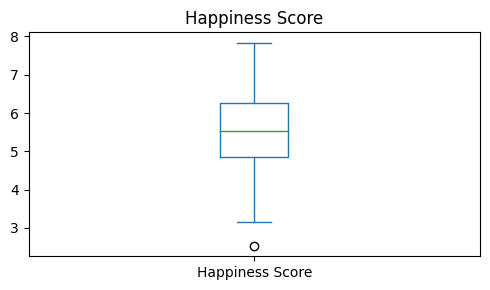

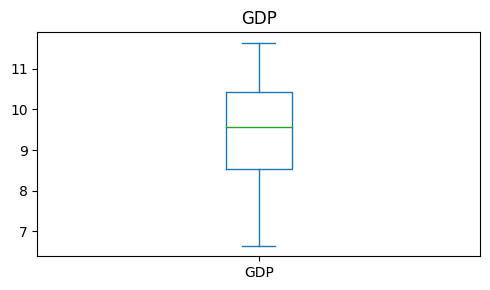

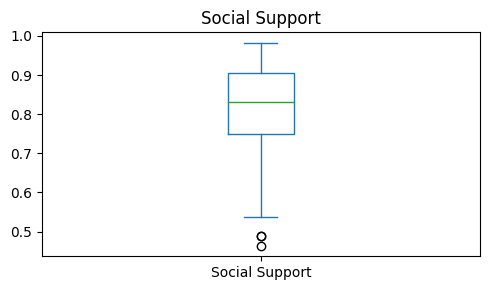

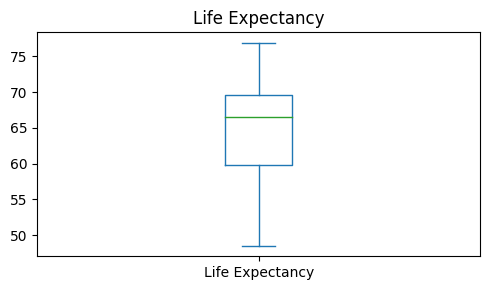

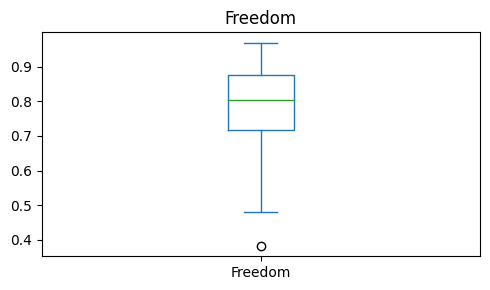

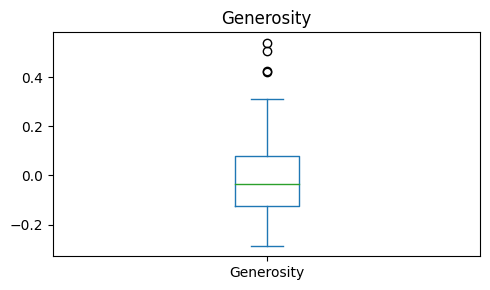

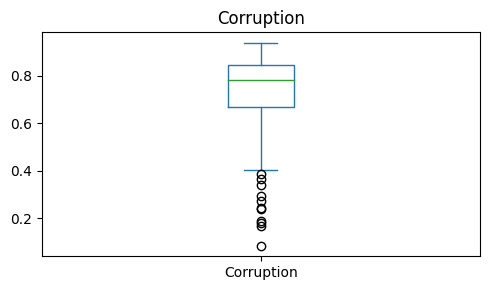

In [19]:
# show outliers or extreme values
for col in ['Happiness Score','GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']:
    plt.figure()
    df_2021[col].plot(kind='box', figsize=(5,3), title=col, showfliers=True)
    plt.tight_layout()

In [20]:
# identify outliers
fig, ax = plt.subplots()
bp = df_2021.boxplot(column=['Happiness Score','GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption'],
                     return_type='dict',ax=ax)
ax.set_axis_off()
plt.close()

# extract outliers for all columns
outliers = {}
for i, col in enumerate(['Happiness Score','GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']):
    outliers[col] = bp['fliers'][i].get_ydata()

# print outliers
for col, out in outliers.items():
    print(f"Outliers for '{col}': {out}")

Outliers for 'Happiness Score': [2.523]
Outliers for 'GDP': []
Outliers for 'Social Support': [0.489 0.49 0.463]
Outliers for 'Life Expectancy': []
Outliers for 'Freedom': [0.382]
Outliers for 'Generosity': [0.542 0.424 0.509 0.422]
Outliers for 'Corruption': [0.186 0.179 0.292 0.338 0.27 0.237 0.386 0.242 0.363 0.082 0.167]


In [21]:
# show detailed information on outliers and check if we keep them

print('Outliers for "Happiness Score"')
display(df_2021[(df_2021['Happiness Score']==2.523)])
# Afghanistan: value seems plausible because of the political and social situation

print('\n' 'Outliers for "Social Support"')
display(df_2021[(df_2021['Social Support']<=0.49)])
# Afghanistan, Benin, Burundi: values seem plausible because of the countries history in (civil) war and poverty

print('\n' 'Outliers for "Freedom"')
display(df_2021[(df_2021['Freedom']==0.382)])
# Afghanistan: value seems plausible because of the political and social situation

print('\n' 'Outliers for "Generosity"')
display(df_2021[(df_2021['Generosity']>=0.422)])
# Why do we have positive and negative values?
# https://happiness-report.s3.amazonaws.com/2021/Appendix1WHR2021C2.pdf
# https://worldhappiness.report/ed/2023/world-happiness-trust-and-social-connections-in-times-of-crisis/
# Generosity is the residual of regressing the national average of GWP responses to the donation question
# “Have you donated money to a charity in the past month?” on log GDP per capita.
# => We only know the residuals (difference between predicted and observed values (how were they observed?))
# => we don't know the actual donation values!
# => Gambia, Haiti, Indonesia, Myanmar: highest residuals, these values maybe not useful for further analysis

print('\n' 'Outliers for "Corruption"')
display(df_2021[(df_2021['Corruption']<=0.386)])
# Is Rwanda's low corruption value explainable, since it has low values in GDP and Social Support?
# "Anti-corruption efforts in Rwanda produce results" has led to lower perception of corruption
# https://fcpablog.com/2019/03/13/an-africa-success-story-anti-corruption-efforts-in-rwanda-pr/

# => outliers are checked and we can keep them!

Outliers for "Happiness Score"


Country      Region  Happiness Score    GDP  Social Support  \
148  Afghanistan  South Asia            2.523  7.695           0.463   

     Life Expectancy  Freedom  Generosity  Corruption  
148           52.493    0.382      -0.102       0.924


Outliers for "Social Support"


Country              Region  Happiness Score    GDP  Social Support  \
98         Benin  Sub-Saharan Africa            5.045  8.087           0.489   
139      Burundi  Sub-Saharan Africa            3.775  6.635           0.490   
148  Afghanistan          South Asia            2.523  7.695           0.463   

     Life Expectancy  Freedom  Generosity  Corruption  
98            54.713    0.757      -0.034       0.661  
139           53.400    0.626      -0.024       0.607  
148           52.493    0.382      -0.102       0.924


Outliers for "Freedom"


Country      Region  Happiness Score    GDP  Social Support  \
148  Afghanistan  South Asia            2.523  7.695           0.463   

     Life Expectancy  Freedom  Generosity  Corruption  
148           52.493    0.382      -0.102       0.924


Outliers for "Generosity"


Country                       Region  Happiness Score    GDP  \
81   Indonesia               Southeast Asia            5.345  9.365   
97      Gambia           Sub-Saharan Africa            5.051  7.686   
125    Myanmar               Southeast Asia            4.426  8.541   
142      Haiti  Latin America and Caribbean            3.615  7.477   

     Social Support  Life Expectancy  Freedom  Generosity  Corruption  
81            0.811           62.236    0.873       0.542       0.867  
97            0.690           55.160    0.697       0.424       0.746  
125           0.779           59.302    0.876       0.509       0.660  
142           0.540           55.700    0.593       0.422       0.721


Outliers for "Corruption"


Country                 Region  Happiness Score     GDP  \
0        Finland         Western Europe            7.842  10.775   
1        Denmark         Western Europe            7.620  10.933   
2    Switzerland         Western Europe            7.571  11.117   
4    Netherlands         Western Europe            7.464  10.932   
5         Norway         Western Europe            7.392  11.053   
6         Sweden         Western Europe            7.363  10.867   
7     Luxembourg         Western Europe            7.324  11.647   
8    New Zealand  North America and ANZ            7.277  10.643   
14       Ireland         Western Europe            7.085  11.342   
31     Singapore         Southeast Asia            6.377  11.488   
146       Rwanda     Sub-Saharan Africa            3.415   7.676   

     Social Support  Life Expectancy  Freedom  Generosity  Corruption  
0             0.954           72.000    0.949      -0.098       0.186  
1             0.954           72.700    0.946       0.030       0.179  
2             0.942           74.400    0.919       0.025       0.292  
4             0.942           72.400    0.913       0.175       0.338  
5             0.954           73.300    0.960       0.093       0.270  
6             0.934           72.700    0.945       0.086       0.237  
7             0.908           72.600    0.907      -0.034       0.386  
8             0.948           73.400    0.929       0.134       0.242  
14            0.947           72.400    0.879       0.077       0.363  
31            0.915           76.953    0.927      -0.018       0.082  
146           0.552           61.400    0.897       0.061       0.167

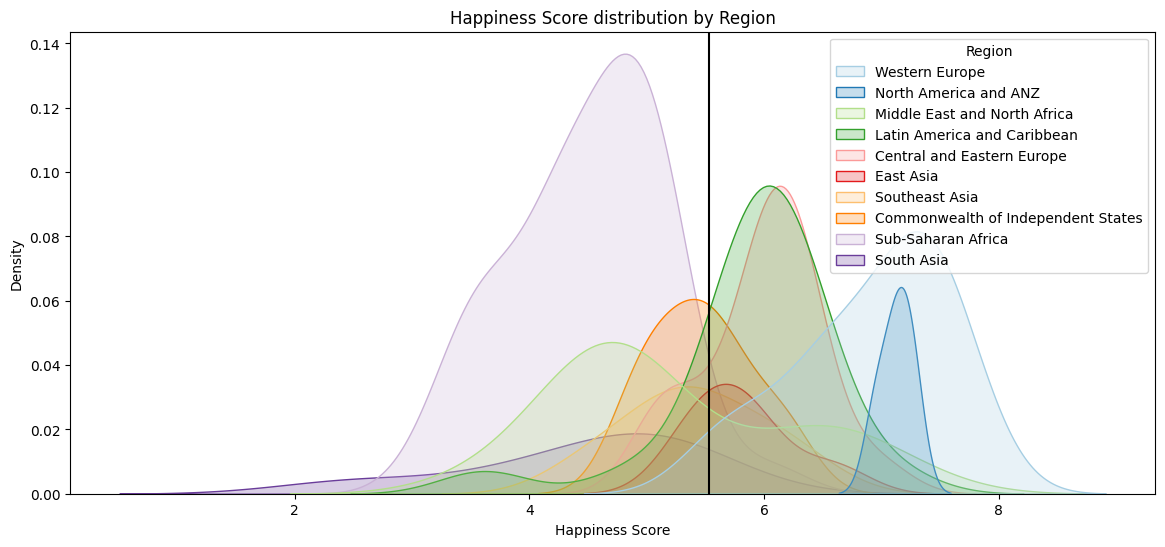

In [22]:
# Happiness Score distribution by Region
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.figure(figsize=(14,6))
    sns.kdeplot(x=df_2021['Happiness Score'],
                hue=df_2021['Region'],
                fill=True,
                multiple='layer',
                linewidth=1,
                palette=sns.color_palette('Paired'))
    plt.axvline(df_2021['Happiness Score'].mean(),
                color="black")
    plt.title('Happiness Score distribution by Region')
    plt.show()

# => the most countries in the world are in Sub-Saharan Afria; their 'Happiness Score' is below mean
# => most of the countries in Middle East and North Africa below mean
# => countries with Happiness Score above mean:
# Western Europe, North America and ANZ, Central and Eastern Europe, Latin America and Carribbean

<ipython-input-23-c4ef5ceb671e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_Top_10,


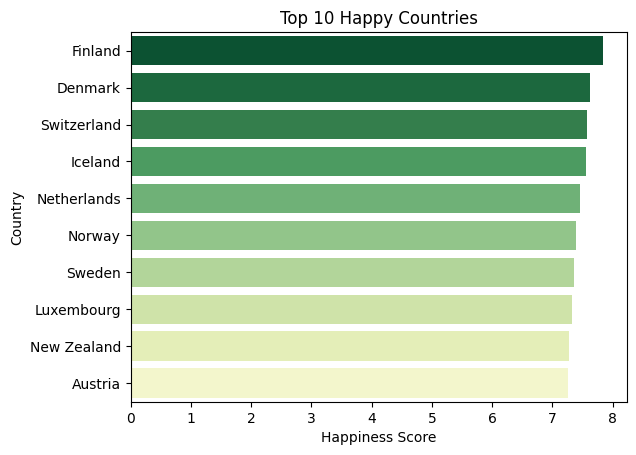

In [23]:
# Top 10 Happy Countries
df_Top_10 = df_2021[(df_2021.loc[:,'Happiness Score'] > 7.2)]
sns.barplot(data=df_Top_10,
            x='Happiness Score',
            y= 'Country',
            palette = 'YlGn_r')
plt.title('Top 10 Happy Countries')
plt.show()

<ipython-input-24-62014338e072>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_Top_10,


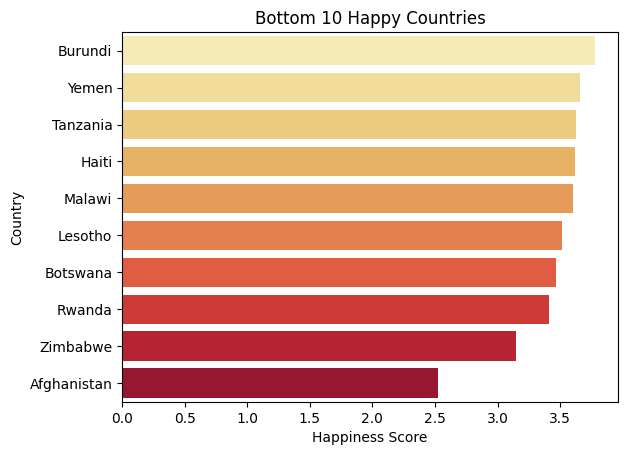

In [24]:
# Bottom 10 Happy Countries
df_Top_10 = df_2021[(df_2021.loc[:,'Happiness Score'] < 3.8)]
sns.barplot(data=df_Top_10,
            x='Happiness Score',
            y='Country',
            palette = 'YlOrRd')
plt.title('Bottom 10 Happy Countries')
plt.show()

In [25]:
# Geopraphical visualization of Happiness Score and missing countries
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type ='choropleth',
           locations = df_2021['Country'],
           locationmode ='country names',
           colorscale='RdYlGn',
           z = df_2021['Happiness Score'],
           text = df_2021['Region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title ='Geographical Visualization of Happiness Score',
              geo = dict(showframe = True,
                         projection = {'type':'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

# => several countries in Mid-Africa are missing
# => the happiest countries seem to be in Europe, North & South America and Australia/New Zealand

In [26]:
# Cantril Ladder Classification: https://innobatics.gr/en/cantril-ladder/
# add Classification (from 1 to 10) to map absolute quality of the Happiness Score
# before we only analyzed the relative Happiness Score between the countries
df_2021['Happiness Score numeric'] = pd.to_numeric(df_2021['Happiness Score'], errors='coerce')

# definition of the function of the Cantril Ladder Classification
def cantril_ladder_classification(score):
    if score < 2:
        return 'Hopeless'
    elif 2 <= score < 3:
        return 'Depressed'
    elif 3 <= score < 4:
        return 'Suffering'
    elif 4 <= score < 5:
        return 'Struggling'
    elif 5 <= score < 6:
        return 'Coping'
    elif 6 <= score < 7:
        return 'Just ok'
    elif 7 <= score < 8:
        return 'Doing well'
    elif 8 <= score < 9:
        return 'Blooming'
    elif 9 <= score < 10:
        return 'Thriving'
    else:
        return 'Prospering'

# apply function
df_2021['Happiness Score Classification'] = df_2021['Happiness Score numeric'].apply(cantril_ladder_classification)
df_2021.drop('Happiness Score numeric', axis=1, inplace=True)
df_2021 = df_2021[['Country','Region','Happiness Score','Happiness Score Classification',
                   'GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']]
df_2021

Country              Region  Happiness Score  \
0        Finland      Western Europe            7.842   
1        Denmark      Western Europe            7.620   
2    Switzerland      Western Europe            7.571   
3        Iceland      Western Europe            7.554   
4    Netherlands      Western Europe            7.464   
..           ...                 ...              ...   
144      Lesotho  Sub-Saharan Africa            3.512   
145     Botswana  Sub-Saharan Africa            3.467   
146       Rwanda  Sub-Saharan Africa            3.415   
147     Zimbabwe  Sub-Saharan Africa            3.145   
148  Afghanistan          South Asia            2.523   

    Happiness Score Classification     GDP  Social Support  Life Expectancy  \
0                       Doing well  10.775           0.954           72.000   
1                       Doing well  10.933           0.954           72.700   
2                       Doing well  11.117           0.942           74.400   
3                       Doing well  10.878           0.983           73.000   
4                       Doing well  10.932           0.942           72.400   
..                             ...     ...             ...              ...   
144                      Suffering   7.926           0.787           48.700   
145                      Suffering   9.782           0.784           59.269   
146                      Suffering   7.676           0.552           61.400   
147                      Suffering   7.943           0.750           56.201   
148                      Depressed   7.695           0.463           52.493   

     Freedom  Generosity  Corruption  
0      0.949      -0.098       0.186  
1      0.946       0.030       0.179  
2      0.919       0.025       0.292  
3      0.955       0.160       0.673  
4      0.913       0.175       0.338  
..       ...         ...         ...  
144    0.715      -0.131       0.915  
145    0.824      -0.246       0.801  
146    0.897       0.061       0.167  
147    0.677      -0.047       0.821  
148    0.382      -0.102       0.924  

[149 rows x 10 columns]

<ipython-input-27-b3f198e1273d>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




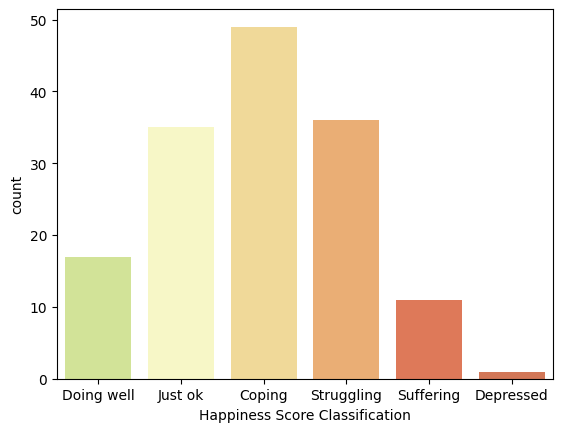

In [27]:
# show the distribution of the Happiness Score Classification
import matplotlib.colors as mcolors

color_dict = {'Doing well':'#d9ef8b',
              'Just ok':'#ffffbf',
              'Coping':'#fee08b',
              'Struggling':'#fdae61',
              'Suffering':'#f46d43',
              'Depressed':'#e66d43'}

ordered_values = ['Doing well',
                  'Just ok','Coping','Struggling',
                  'Suffering','Depressed']

colors = [mcolors.to_rgba(color_dict[val]) for val in ordered_values]

sns.countplot(data=df_2021,
              x='Happiness Score Classification',
              palette=colors);

# => According to the Cantril Ladder, most of the world's countries are less then 'Doing well',
# which means that they are either struggling or/and suffering.
# https://innobatics.gr/en/cantril-ladder/
# Thriving area: Prospering, Thriving, Blooming, Doing well
# Struggling area: Just ok, Coping, Struggling
# Suffering area: Suffering, Depressed, Hopeless

In [28]:
# Geopraphical visualization of Happiness Score Classification (Cantril Ladder)
# comparison to the Happiness Score visualization, where more countries seem to be greenier/happier

import plotly.graph_objs as go
from plotly.offline import iplot

# create a dictionary that maps categories to numbers
category_to_number = {'Doing well': 0,
                      'Just ok': 0.2,
                      'Coping': 0.4,
                      'Struggling': 0.6,
                      'Suffering': 0.8,
                      'Depressed': 1.0}

mapped_values = df_2021['Happiness Score Classification'].map(category_to_number)

data = dict(type ='choropleth',
           locations = df_2021['Country'],
           locationmode ='country names',
           colorscale=[[0,'#d9ef8b'],[0.2,'#ffffbf'],[0.4,'#fee08b'],
                       [0.6,'#fdae61'],[0.8,'#f46d43'],[1.0,'#e66d43']],
           z = mapped_values,
           text = df_2021['Region'],
           colorbar=dict(title='Happiness Score Classification',
                         tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                         ticktext=['Doing well','Just ok','Coping','Struggling','Suffering','Depressed']))

layout = dict(title = 'Geographical Visualization of Happiness Score Classification',
              geo = dict(showframe = True,
                         projection = {'type':'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3);

# => The 'Doing well' countries seem to be found in Middle and Northern Europe, Canada and Australia/New Zealand.
# => The 'Suffering' and 'Depressed' countries can be found particulary in Africa and South Asia
# => Some of the world's biggest countries (United States, Brasil) are 'Just ok',
# => while others (Russia, China, Mongolia) are 'Coping'
# => More countries in the world seem to be rather unhappy than happy.

In [29]:
# GDP per Country by Region
import plotly.express as px

fig = px.sunburst(df_2021,
                  path=['Region','Country'], values='Happiness Score',
                  color='GDP',
                  color_continuous_scale='rdbu')
fig.update_layout(width=800, height=600)
fig.update_layout(title="GDP per country by region")
fig.show()

# => GDP highest in Western Europe and North America/ANZ, lowest in Sub-Saharan Africa

In [30]:
# Social Support per country by Region
fig = px.sunburst(df_2021,
                  path=['Region','Country'], values='Happiness Score',
                  color='Social Support',
                  color_continuous_scale='rdbu')
fig.update_layout(width=800, height=600)
fig.update_layout(title="Social Support per country by region")
fig.show()

# => Social Support highest in Western Europe and North America/ANZ, lowest in Sub-Saharan Africa

In [31]:
# Life Expectancy per country by Region
fig = px.sunburst(df_2021,
                  path=['Region','Country'], values='Happiness Score',
                  color='Life Expectancy',
                  color_continuous_scale='rdbu')
fig.update_layout(width=800, height=600)
fig.update_layout(title="Life Expectancy per country by region")
fig.show()

# => Life Expectancy highest in Western Europe, East Asia and North America/ANZ, lowest in Sub-Saharan Africa

In [32]:
# Freedom per country by Region
fig = px.sunburst(df_2021,
                  path=['Region','Country'], values='Happiness Score',
                  color='Freedom',
                  color_continuous_scale='rdbu')
fig.update_layout(width=800, height=600)
fig.update_layout(title="Freedom per country by region")
fig.show()

# => Freedom highest in Western Europe, Southeast Asia and North America/ANZ, lowest in Sub-Saharan Africa, Middle East and North Africa

In [33]:
# Generosity per country by Region
fig = px.sunburst(df_2021,
                  path=['Region','Country'], values='Happiness Score',
                  color='Generosity',
                  color_continuous_scale='rdbu')
fig.update_layout(width=800, height=600)
fig.update_layout(title="Generosity per country by region")
fig.show()

# => Generosity highest in Southeast Asia and North America/ANZ

In [34]:
# Corruption per country by Region
fig = px.sunburst(df_2021,
                  path=['Region','Country'], values='Happiness Score',
                  color='Corruption',
                  color_continuous_scale=list(reversed(px.colors.sequential.RdBu)))
fig.update_layout(width=800, height=600)
fig.update_layout(title="Corruption per country by region")
fig.show()

# => lowest Corruption in Western Europe and North America/ANZ, highest in Central and Eastern Europe and South Asia

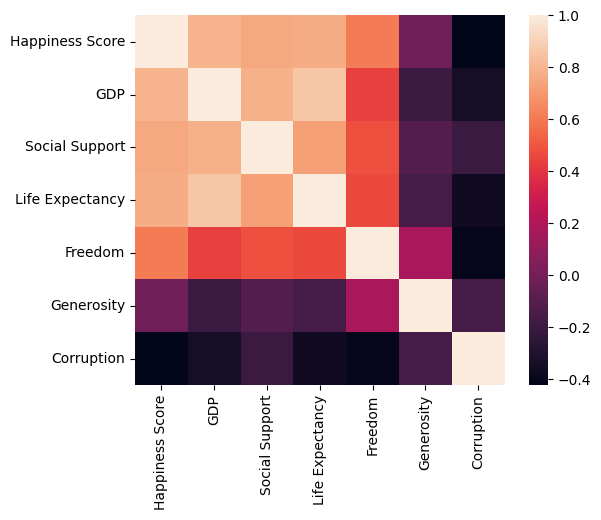

In [35]:
# Heatmap
fig, ax = plt.subplots()
sns.heatmap(df_2021.corr(numeric_only=True), square=True);

# => Corruption and Generosity most influential on Happiness Score?

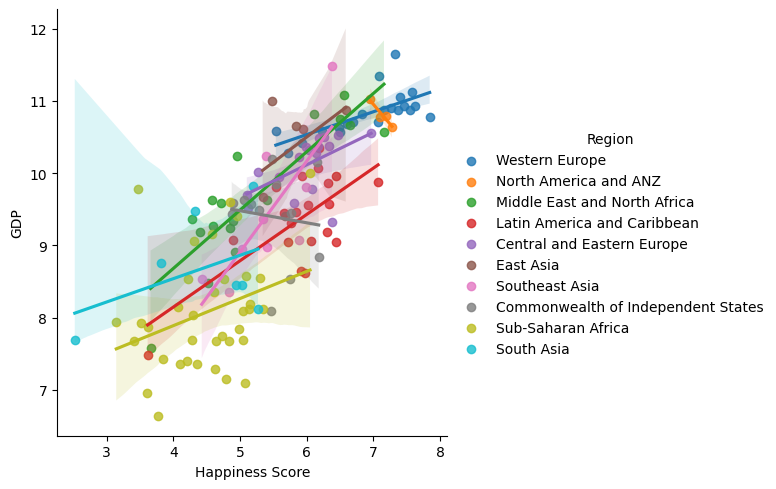

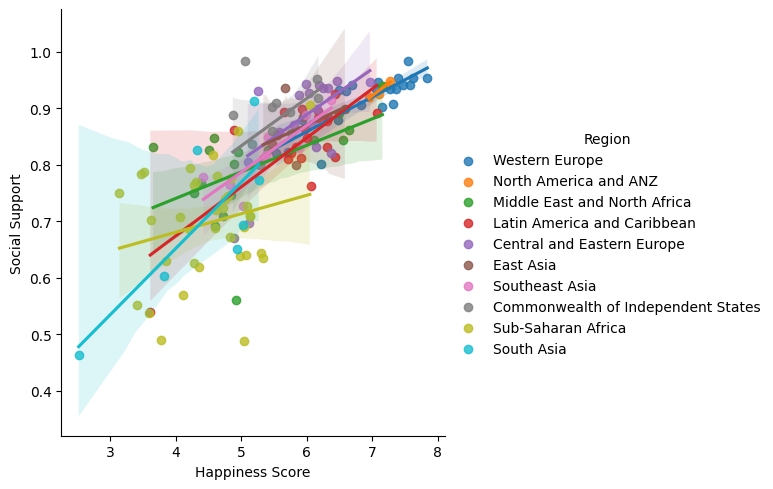

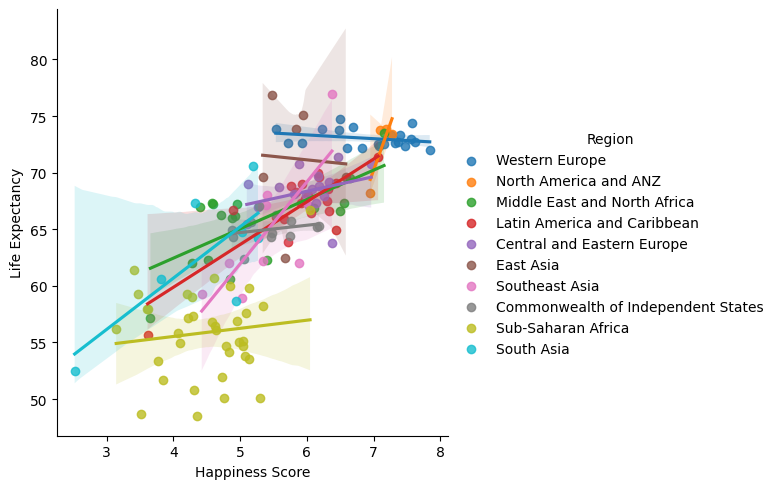

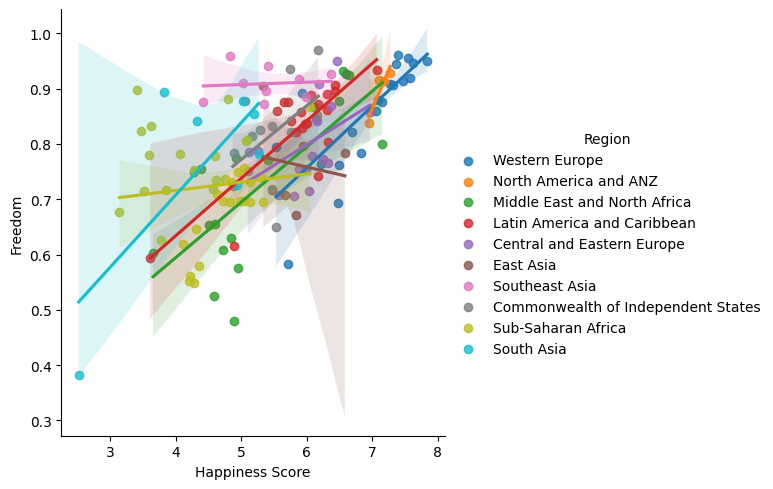

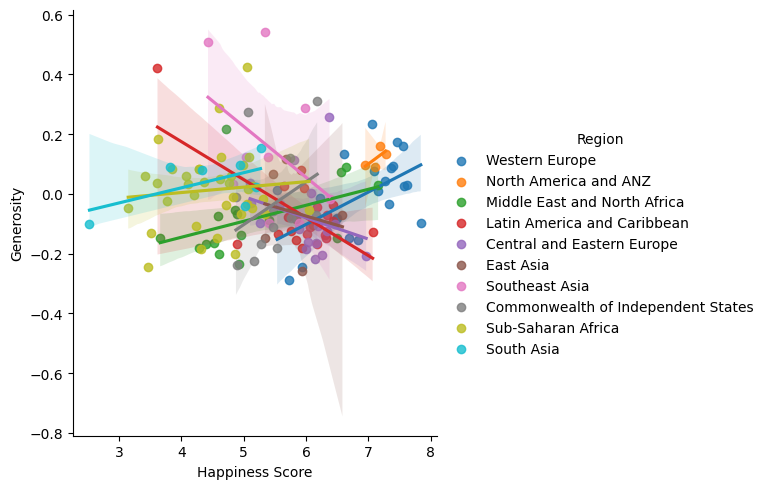

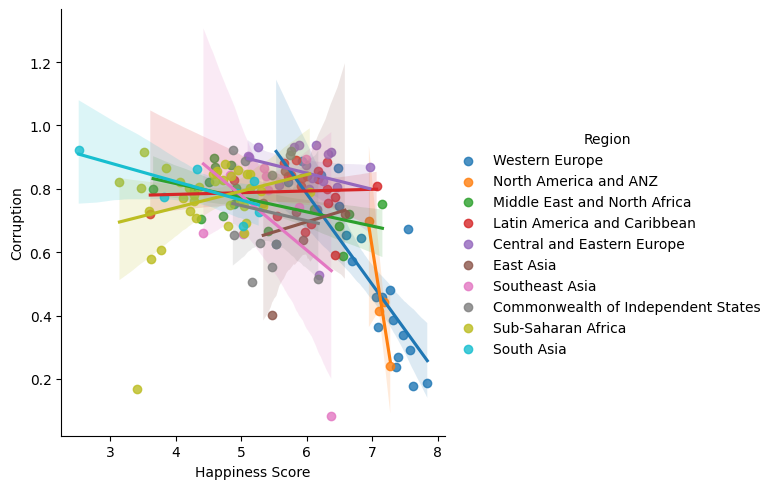

In [36]:
# Scatter plot with Linear Regression line
sns.lmplot(x='Happiness Score', y='GDP', hue='Region', data=df_2021);
sns.lmplot(x='Happiness Score', y='Social Support', hue='Region', data=df_2021);
sns.lmplot(x='Happiness Score', y='Life Expectancy', hue='Region', data=df_2021);
sns.lmplot(x='Happiness Score', y='Freedom', hue='Region', data=df_2021);
sns.lmplot(x='Happiness Score', y='Generosity', hue='Region', data=df_2021);
sns.lmplot(x='Happiness Score', y='Corruption', hue='Region', data=df_2021);

# => Positive Correlation with Happiness Score: GDP, Social Support, Freedom?
# => Negative Correlation with Corruption?
# => No Correlation with Happiness Score: Life Expectancy, Generosity?

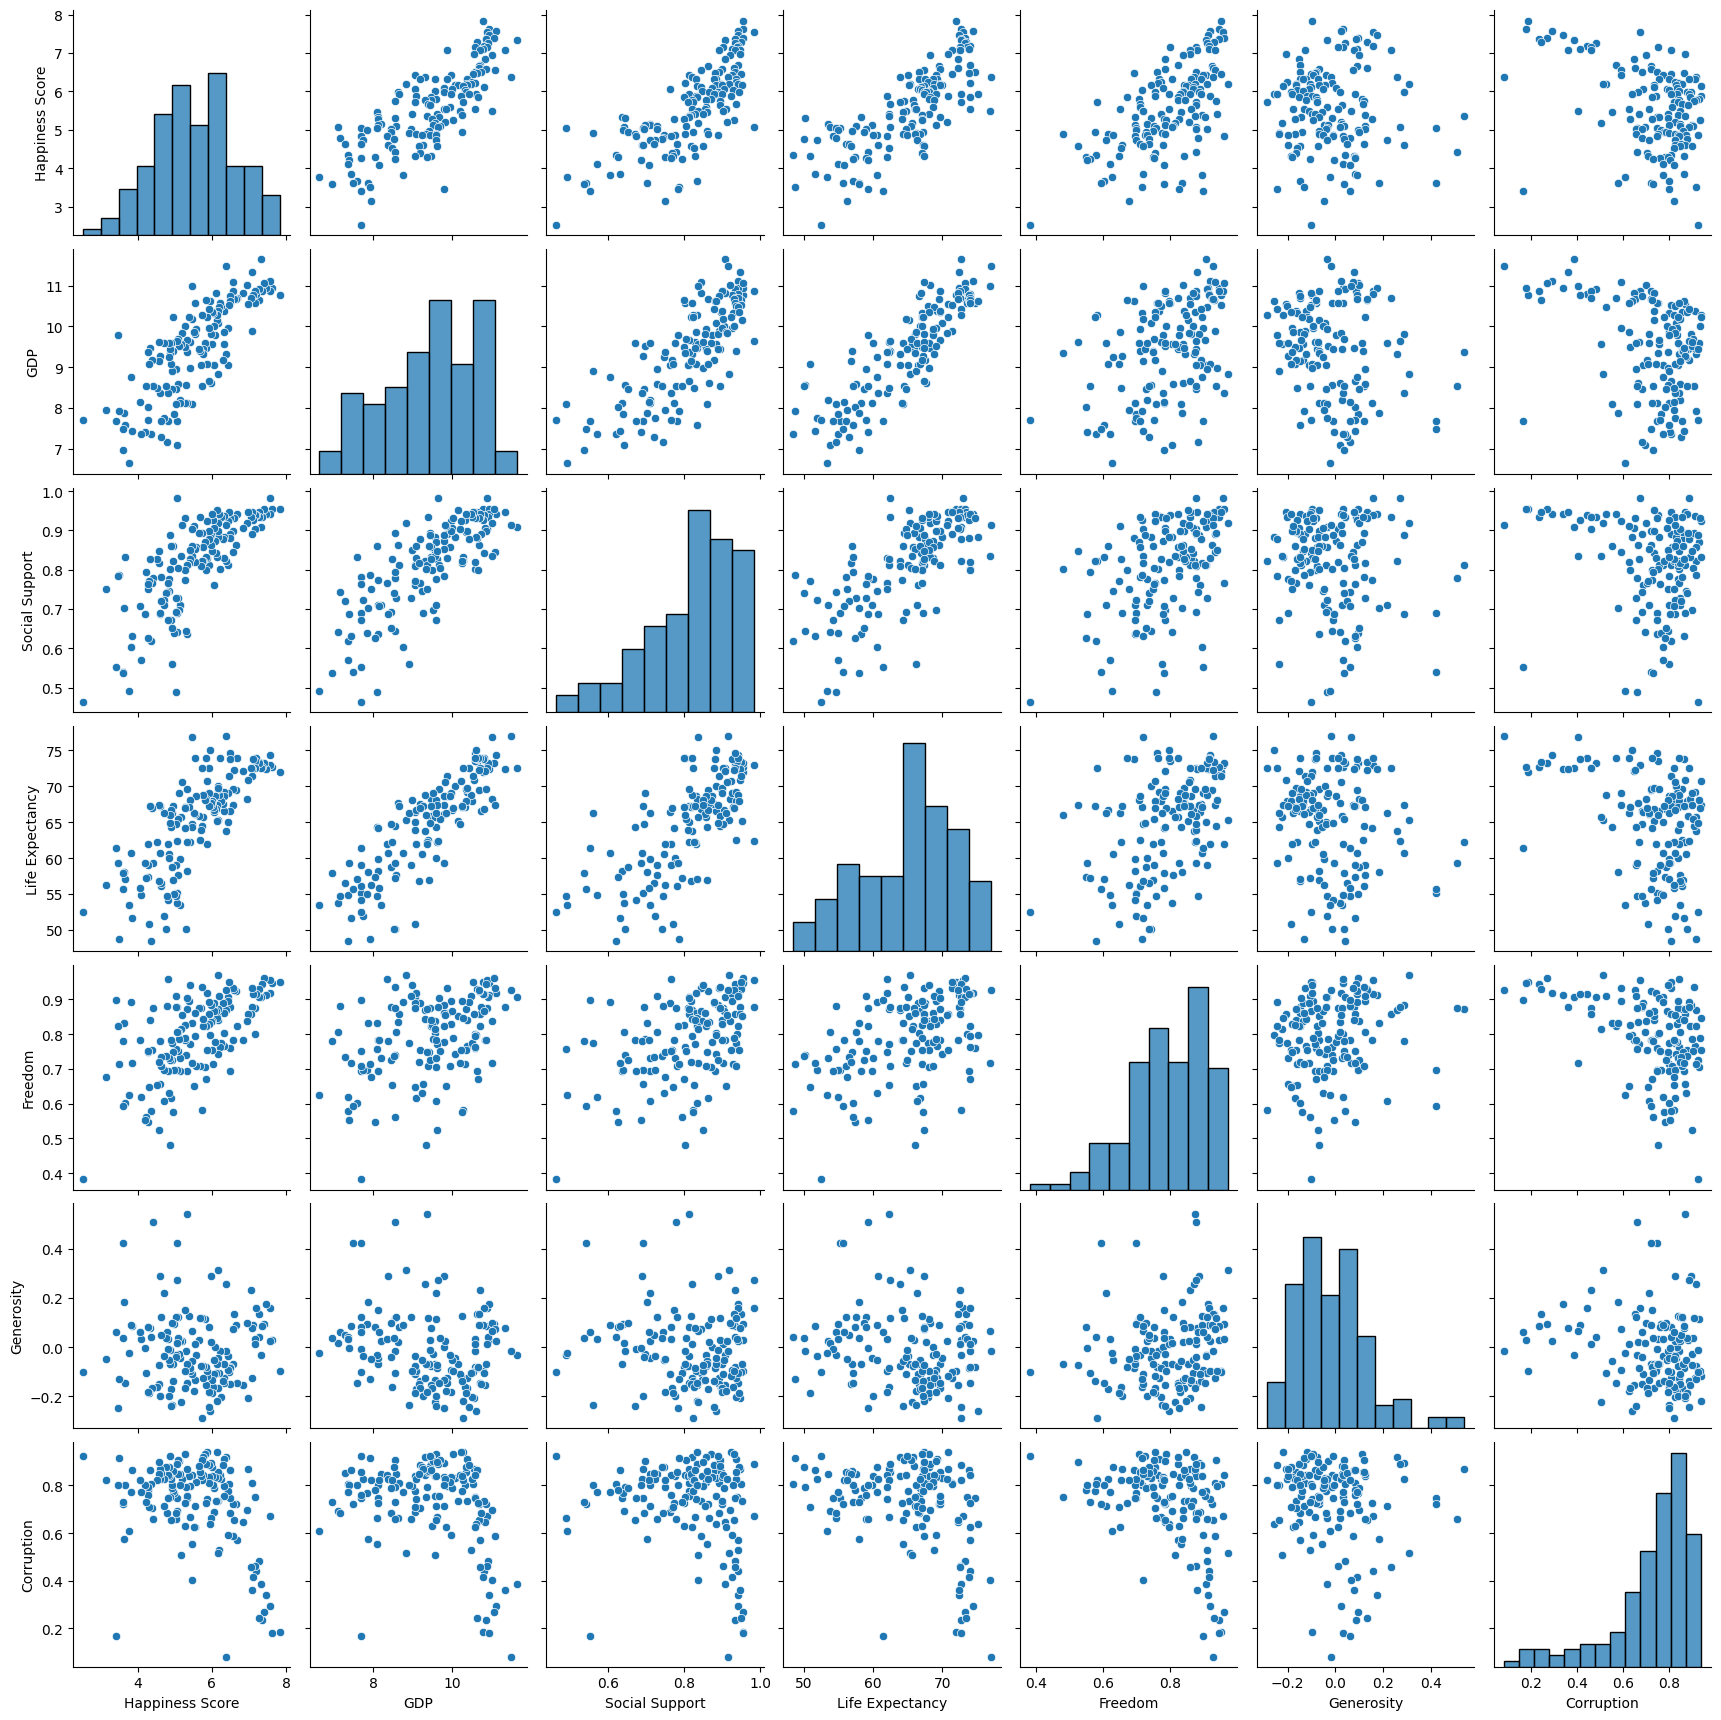

In [37]:
# Pairplot
sns.pairplot(df_2021);

# => there seems to be high correlation between Happiness Score and GDP/Social Support/Life Expectancy

In [38]:
# import population data
# https://www.kaggle.com/datasets/rsrishav/world-population
df_pop = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQPdnR0lKzDa3zc46AMrxfNnB5SL1x7coLdlUMcdZL7B_KmVzAtckhPyWcKXhL8SjVUVNibhYAMGyql/pub?output=csv')
df_pop = df_pop[['country','2021_last_updated']]
df_pop = df_pop.rename(columns={'country':'Country','2021_last_updated':'Population'})
df_pop

Country     Population
0               China  1,447,065,329
1               India  1,401,310,563
2       United States    334,058,426
3           Indonesia    278,037,263
4            Pakistan    227,724,796
..                ...            ...
219        Montserrat          4,977
220  Falkland Islands          3,533
221              Niue          1,619
222           Tokelau          1,373
223      Vatican City            800

[224 rows x 2 columns]

In [39]:
# check data types
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     224 non-null    object
 1   Population  224 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB


In [40]:
# drop the commas in 'Population'
df_pop['Population'] = df_pop['Population'].str.replace(',', '')

In [41]:
# change data type
df_pop = df_pop.astype({'Population':'int'})

In [42]:
# check duplicates
df_pop.duplicated().sum()

# => no duplicates

0

In [43]:
# check missing values
df_pop.isna().sum()

# => no missing values

Country       0
Population    0
dtype: int64

In [44]:
# count sum of 'Population'
sum_pop = df_pop['Population'].sum()
print(sum_pop)

# => 7,817,454,498
# => World's population 2021 by Worldbank: 7,888,409,000 (difference = 70,954,502 or <1% )

7817454498


In [45]:
# list countries and population, which are not represented in the World Happiness Report
missing_countries = df_pop[~df_pop['Country'].isin(df_2021['Country'])]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print('Missing countries in df_2021:')
display(missing_countries)

# => The following country's population is not represented in the World Happiness Report:

Missing countries in df_2021:


Country  Population
31                          Sudan    45532863
41                         Angola    34566172
52                    North Korea    25950189
55                         Taiwan    23877855
64                          Syria    18646187
71                        Somalia    16634297
81                    South Sudan    11493450
82                           Cuba    11312548
95               Papua New Guinea     9220306
102                     Hong Kong     7585785
117                          Oman     5296006
118                     Palestine     5293440
122      Central African Republic     4971922
130                       Eritrea     3633796
133        Bosnia And Herzegovina     3251612
136                         Qatar     2962425
138                   Puerto Rico     2806918
147                 Guinea Bissau     2043512
150             Equatorial Guinea     1477483
151           Trinidad And Tobago     1405746
152                   Timor Leste     1358744
156                      Djibouti     1010377
157                          Fiji       90657
158                       Reunion       90535
160                        Guyana      792481
161                        Bhutan      784855
162               Solomon Islands      714126
163                         Macau      663998
166                Western Sahara       62028
167                      Suriname      594817
168                    Cape Verde      565346
171                        Brunei      443903
172                        Belize      409224
173                       Bahamas      399068
174                    Martinique      374314
176                       Vanuatu      318774
177                 New Caledonia      289727
178                      Barbados      287927
179              French Polynesia      283392
180                       Mayotte      283394
181         Sao Tome And Principe      225954
182                         Samoa      201011
183                   Saint Lucia      184831
184                          Guam      171041
185                       Curacao      165229
186                      Kiribati       12247
187                    Micronesia      116901
188                       Grenada      113237
189                         Aruba      107204
190                         Tonga      107407
191  United States Virgin Islands       10401
192                    Seychelles       99124
193           Antigua And Barbuda       99162
194                       Andorra       77355
195                      Dominica       72167
196                Cayman Islands       66497
197                       Bermuda        6209
198              Marshall Islands        5961
199      Northern Mariana Islands       57917
200                     Greenland       56877
201                American Samoa         551
202         Saint Kitts And Nevis       53544
203                 Faroe Islands       49049
204                  Sint Maarten       43412
205                        Monaco       39511
206                  Saint Martin       39234
207      Turks And Caicos Islands       39231
208                 Liechtenstein        3825
209                    San Marino       34017
210                     Gibraltar       33698
211                         Palau       18169
212                  Cook Islands       17565
213                      Anguilla       15117
214                        Tuvalu       11931
215             Wallis And Futuna       11094
216                         Nauru       10876
217              Saint Barthelemy        9907
218     Saint Pierre And Miquelon        5766
219                    Montserrat        4977
220              Falkland Islands        3533
221                          Niue        1619
222                       Tokelau        1373
223                  Vatican City         800

In [46]:
# list countries and population, which are not represented in df_pop
missing_countries2 = df_2021[~df_2021['Country'].isin(df_pop['Country'])]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print('Missing countries in df_pop:')
display(missing_countries2)

# => Besides Bosnia and Herzegovina, Hong Kong, Palestine and Taiwan, the following countries are missing in df_pop:
# rename countries and check again

Missing countries in df_pop:


Country                        Region  Happiness Score  \
23    Taiwan Province of China                     East Asia            6.584   
32                      Kosovo    Central and Eastern Europe            6.372   
63      Bosnia and Herzegovina    Central and Eastern Europe            5.813   
73                North Cyprus                Western Europe            5.536   
76   Hong Kong S.A.R. of China                     East Asia            5.477   
82         Congo (Brazzaville)            Sub-Saharan Africa            5.342   
124    Palestinian Territories  Middle East and North Africa            4.517   
129                  Swaziland            Sub-Saharan Africa            4.308   

    Happiness Score Classification     GDP  Social Support  Life Expectancy  \
23                         Just ok  10.871           0.898           69.600   
32                         Just ok   9.318           0.821           63.813   
63                          Coping   9.590           0.870           68.098   
73                          Coping  10.576           0.820           73.898   
76                          Coping  11.000           0.836           76.820   
82                          Coping   8.117           0.636           58.221   
124                     Struggling   8.485           0.826           62.250   
129                     Struggling   9.065           0.770           50.833   

     Freedom  Generosity  Corruption  
23     0.784      -0.070       0.721  
32     0.869       0.257       0.917  
63     0.706       0.113       0.931  
73     0.795       0.012       0.626  
76     0.717       0.067       0.403  
82     0.695      -0.068       0.745  
124    0.653      -0.163       0.821  
129    0.647      -0.185       0.708

In [47]:
# rename Bosnia and Herzegovina, Hong Kong, Palestine and Taiwan before the merge with df_2021
df_pop['Country'] = df_pop['Country'].replace({'Bosnia And Herzegovina':'Bosnia and Herzegovina',
                                               'Hong Kong':'Hong Kong S.A.R. of China',
                                               'Palestine':'Palestinian Territories',
                                               'Taiwan':'Taiwan Province of China'})

In [48]:
# merge df_2021 and df_pop
df_pop_2021 = pd.merge(df_2021, df_pop, on='Country')
df_pop_2021 = df_pop_2021[['Country','Region','Population','Happiness Score','Happiness Score Classification',
                           'GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']]
df_pop_2021

Country                              Region  \
0                      Finland                      Western Europe   
1                      Denmark                      Western Europe   
2                  Switzerland                      Western Europe   
3                      Iceland                      Western Europe   
4                  Netherlands                      Western Europe   
5                       Norway                      Western Europe   
6                       Sweden                      Western Europe   
7                   Luxembourg                      Western Europe   
8                  New Zealand               North America and ANZ   
9                      Austria                      Western Europe   
10                   Australia               North America and ANZ   
11                      Israel        Middle East and North Africa   
12                     Germany                      Western Europe   
13                      Canada               North America and ANZ   
14                     Ireland                      Western Europe   
15                  Costa Rica         Latin America and Caribbean   
16              United Kingdom                      Western Europe   
17              Czech Republic          Central and Eastern Europe   
18               United States               North America and ANZ   
19                     Belgium                      Western Europe   
20                      France                      Western Europe   
21                     Bahrain        Middle East and North Africa   
22                       Malta                      Western Europe   
23    Taiwan Province of China                           East Asia   
24        United Arab Emirates        Middle East and North Africa   
25                Saudi Arabia        Middle East and North Africa   
26                       Spain                      Western Europe   
27                       Italy                      Western Europe   
28                    Slovenia          Central and Eastern Europe   
29                   Guatemala         Latin America and Caribbean   
30                     Uruguay         Latin America and Caribbean   
31                   Singapore                      Southeast Asia   
32                    Slovakia          Central and Eastern Europe   
33                      Brazil         Latin America and Caribbean   
34                      Mexico         Latin America and Caribbean   
35                     Jamaica         Latin America and Caribbean   
36                   Lithuania          Central and Eastern Europe   
37                      Cyprus                      Western Europe   
38                     Estonia          Central and Eastern Europe   
39                      Panama         Latin America and Caribbean   
40                  Uzbekistan  Commonwealth of Independent States   
41                       Chile         Latin America and Caribbean   
42                      Poland          Central and Eastern Europe   
43                  Kazakhstan  Commonwealth of Independent States   
44                     Romania          Central and Eastern Europe   
45                      Kuwait        Middle East and North Africa   
46                      Serbia          Central and Eastern Europe   
47                 El Salvador         Latin America and Caribbean   
48                   Mauritius                  Sub-Saharan Africa   
49                      Latvia          Central and Eastern Europe   
50                    Colombia         Latin America and Caribbean   
51                     Hungary          Central and Eastern Europe   
52                    Thailand                      Southeast Asia   
53                   Nicaragua         Latin America and Caribbean   
54                       Japan                           East Asia   
55                   Argentina         Latin America and Caribbean   
56                    Portugal   

In [49]:
# check country names
sorted(df_pop_2021['Country'].unique())

['Afghanistan',
 'Albania',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Haiti',
 'Honduras',
 'Hong Kong S.A.R. of China',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kuwait',
 'Kyrgyzstan',
 'Laos',
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Lithuania',
 'Luxembourg',
 'Madagascar',
 'Mal

In [50]:
# count sum of 'Population'
sum_pop = df_pop_2021['Population'].sum()
print(sum_pop)

# => 7.567.268.768
# => Countries with a population of 250.185.730 are not represented in the Happiness Score (3.2%).

7607277460


In [51]:
# list countries and population, which are not represented in the World Happiness Report
missing_countries3 = df_pop[~df_pop['Country'].isin(df_pop_2021['Country'])]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print('Missing countries in df_pop_2021:')
display(missing_countries3)

# => new output because of corrected country names a few steps earlier
# => The population of the following countries is not represented in the World Happiness Report:

Missing countries in df_pop_2021:


Country  Population
31                          Sudan    45532863
41                         Angola    34566172
52                    North Korea    25950189
64                          Syria    18646187
71                        Somalia    16634297
81                    South Sudan    11493450
82                           Cuba    11312548
95               Papua New Guinea     9220306
117                          Oman     5296006
122      Central African Republic     4971922
130                       Eritrea     3633796
136                         Qatar     2962425
138                   Puerto Rico     2806918
147                 Guinea Bissau     2043512
150             Equatorial Guinea     1477483
151           Trinidad And Tobago     1405746
152                   Timor Leste     1358744
156                      Djibouti     1010377
157                          Fiji       90657
158                       Reunion       90535
160                        Guyana      792481
161                        Bhutan      784855
162               Solomon Islands      714126
163                         Macau      663998
166                Western Sahara       62028
167                      Suriname      594817
168                    Cape Verde      565346
171                        Brunei      443903
172                        Belize      409224
173                       Bahamas      399068
174                    Martinique      374314
176                       Vanuatu      318774
177                 New Caledonia      289727
178                      Barbados      287927
179              French Polynesia      283392
180                       Mayotte      283394
181         Sao Tome And Principe      225954
182                         Samoa      201011
183                   Saint Lucia      184831
184                          Guam      171041
185                       Curacao      165229
186                      Kiribati       12247
187                    Micronesia      116901
188                       Grenada      113237
189                         Aruba      107204
190                         Tonga      107407
191  United States Virgin Islands       10401
192                    Seychelles       99124
193           Antigua And Barbuda       99162
194                       Andorra       77355
195                      Dominica       72167
196                Cayman Islands       66497
197                       Bermuda        6209
198              Marshall Islands        5961
199      Northern Mariana Islands       57917
200                     Greenland       56877
201                American Samoa         551
202         Saint Kitts And Nevis       53544
203                 Faroe Islands       49049
204                  Sint Maarten       43412
205                        Monaco       39511
206                  Saint Martin       39234
207      Turks And Caicos Islands       39231
208                 Liechtenstein        3825
209                    San Marino       34017
210                     Gibraltar       33698
211                         Palau       18169
212                  Cook Islands       17565
213                      Anguilla       15117
214                        Tuvalu       11931
215             Wallis And Futuna       11094
216                         Nauru       10876
217              Saint Barthelemy        9907
218     Saint Pierre And Miquelon        5766
219                    Montserrat        4977
220              Falkland Islands        3533
221                          Niue        1619
222                       Tokelau        1373
223                  Vatican City         800

In [52]:
# check population of countries by region
pop_dist = df_pop_2021.groupby('Region')['Population'].sum() / df_pop_2021['Population'].sum()
pop_dist = pop_dist.sort_values(ascending=False).round(2)
df_pop_dist = pd.DataFrame({'Region':pop_dist.index,'Population in %':pop_dist.values})
display(df_pop_dist)

# => Comparison with the country's distribution by Region:
# => South & East Asia cover almost 50% of World's Population (relevant to know for further analysis)
# => Western Europe and North America/ANZ with high Happiness Scores cover only 11% of world's population

Region  Population in %
0                          South Asia             0.25
1                           East Asia             0.22
2                  Sub-Saharan Africa             0.13
3                      Southeast Asia             0.09
4         Latin America and Caribbean             0.08
5        Middle East and North Africa             0.07
6                      Western Europe             0.06
7               North America and ANZ             0.05
8  Commonwealth of Independent States             0.04
9          Central and Eastern Europe             0.02

In [53]:
# Happiness Score and Population by Country via Region
import plotly.express as px

fig = px.scatter(df_pop_2021,
                 x = 'Region',
                 y = 'Happiness Score',
                 size = 'Population',
                 template = 'plotly_white',
                 color = 'Region',
                 hover_name = 'Country',
                 size_max = 80)

fig.update_layout(title ='Happiness Score and Population by Countriy via Region')
fig.update_layout(showlegend=False)
fig.show()

# => The happiest countries seem to be found in Western Europe, North America and Australia/New Zealand,
# given that the countries are likely less inhabited than other countries (only 11% of world's population).
# => The unhappiest countries seem to be found in Sub-Saharan Africa and South Asia,
# but also a lot of countries in the Middle East and North Africa.

In [54]:
# Happiness Score and Population by Country via Region
# add mean per Region
import plotly.express as px

df_region_mean = df_pop_2021.groupby('Region',as_index=False)['Happiness Score'].mean()

fig = px.scatter(df_pop_2021,
                 x='Region',
                 y='Happiness Score',
                 size='Population',
                 color='Region',
                 hover_name='Country',
                 size_max=80,
                 template='plotly_white')

fig.add_trace(go.Scatter(x=df_region_mean['Region'],
                         y=df_region_mean['Happiness Score'],
                         mode='lines',
                         line=dict(color='black',width=1.5)))

fig.update_layout(title='Happiness Score and Population by Country via Region',showlegend=False)
fig.show()

# => Although Middle East/North Africa seem to be third happiest region,
# it's Happiness Score mean is lower than Latin America/Carribean and East Asia. Only few countries above mean.
# => The Happiness Score for the most of Middle East/North Africa's population is under 5.0,
# which seems to be also true for Sub-Saharan Africa's and South Asia's population, as the world's unhappiest regions.

In [55]:
# Happiness Score Classification and Population by Country via Region
import plotly.express as px
fig = px.scatter(df_pop_2021,
                 x = 'Region',
                 y = 'Happiness Score Classification',
                 size = 'Population',
                 template = 'plotly_white',
                 color = 'Region',
                 hover_name = 'Country',
                 size_max = 80)
fig.update_layout(title = 'Happiness Score Classification and Population by Countries via Regions',
                  showlegend=False,
                  yaxis=dict(autorange='reversed'))
fig.show()

# => most of the world's population are coping, struggling und suffering

In [56]:
# show information on df_historical
df_historical.info()
df_historical.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           451.0   
1  Afghanistan  2009        4.402               7.540           552.0   
2  Afghanistan  2010        4.758               7.647           539.0   
3  Afghanistan  2011        3.832               7.620           521.0   
4  Afghanistan  2012        3.783               7.705           521.0   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         718.0       168.0   
1                             51.20                         679.0       190.0   
2                             51.60                         600.0       121.0   
3                             51.92                         496.0       162.0   
4                             52.24                         531.0       236.0   

   Perceptions of corruption  Positive affect  Negative affect  
0                      882.0            518.0            258.0  
1                      850.0            584.0            237.0  
2                      707.0            618.0            275.0  
3                      731.0            611.0            267.0  
4                      776.0            710.0            268.0

In [57]:
# correct values
df_historical['Social support']=df_historical['Social support']/1000
df_historical['Freedom to make life choices']=df_historical['Freedom to make life choices']/1000
df_historical['Generosity']=df_historical['Generosity']/1000
df_historical['Perceptions of corruption']=df_historical['Perceptions of corruption']/1000
df_historical['Positive affect']=df_historical['Positive affect']/1000
df_historical['Negative affect']=df_historical['Negative affect']/1000
df_historical.head()

Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008        3.724               7.370           0.451   
1  Afghanistan  2009        4.402               7.540           0.552   
2  Afghanistan  2010        4.758               7.647           0.539   
3  Afghanistan  2011        3.832               7.620           0.521   
4  Afghanistan  2012        3.783               7.705           0.521   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                             50.80                         0.718       0.168   
1                             51.20                         0.679       0.190   
2                             51.60                         0.600       0.121   
3                             51.92                         0.496       0.162   
4                             52.24                         0.531       0.236   

   Perceptions of corruption  Positive affect  Negative affect  
0                      0.882            0.518            0.258  
1                      0.850            0.584            0.237  
2                      0.707            0.618            0.275  
3                      0.731            0.611            0.267  
4                      0.776            0.710            0.268

In [58]:
# rename columns in df_historical
df_historical = df_historical.rename(columns={'Country name':'Country',
                                	           'year':'Year',
                                             'Life Ladder':'Happiness Score',
                                             'Log GDP per capita':'GDP',
                                             'Social support':'Social Support',
                                             'Healthy life expectancy at birth':'Life Expectancy',
                                             'Freedom to make life choices':'Freedom',
                                             'Perceptions of corruption':'Corruption',
                                             'Positive affect':'Positive Affect',
                                             'Negative affect':'Negative Affect'})

In [59]:
# check missing values in df_historical
df_historical.isna().sum()

Country              0
Year                 0
Happiness Score      0
GDP                 36
Social Support      13
Life Expectancy     55
Freedom             32
Generosity          89
Corruption         110
Positive Affect     22
Negative Affect     16
dtype: int64

In [60]:
# check percentages of missing values in df_historical
(df_historical.isna().sum()/len(df_historical)*100).round(2)

# => max. 5.64% of missing values in 'Corruption'
# ok

Country            0.00
Year               0.00
Happiness Score    0.00
GDP                1.85
Social Support     0.67
Life Expectancy    2.82
Freedom            1.64
Generosity         4.57
Corruption         5.64
Positive Affect    1.13
Negative Affect    0.82
dtype: float64

In [61]:
# print rows with missing values
display(df_historical[df_historical.isnull().any(axis=1)])

# China completely doesn't have information on Corruption
# Hong Kong completely doesn't have information on Life Expectancy
# Jordan almost doesn't have information on Corruption
# Taiwan completely doesn't have information on Life Expectancy
# Palestinian Territories almost doesn't have information on Life Expectancy
# Saudi Arabia almost doesn't have information on Corruption

Country  Year  Happiness Score     GDP  \
25                      Algeria  2010            5.464   9.287   
28                      Algeria  2014            6.355   9.335   
29                      Algeria  2016            5.341   9.362   
66                    Australia  2005            7.341  10.659   
110                     Bahrain  2012            5.027  10.716   
111                     Bahrain  2013            6.690  10.757   
112                     Bahrain  2014            6.165  10.783   
113                     Bahrain  2015            6.007  10.785   
114                     Bahrain  2016            6.170  10.781   
115                     Bahrain  2017            6.227  10.771   
116                     Bahrain  2019            7.098  10.715   
117                     Bahrain  2020            6.173  10.620   
126                  Bangladesh  2014            4.636   8.164   
135                     Belarus  2008            5.463   9.677   
147                     Belgium  2005            7.262  10.745   
218                      Brazil  2005            6.637   9.438   
224                      Brazil  2012            6.660   9.647   
263                    Cambodia  2006            3.569   7.746   
264                    Cambodia  2007            4.156   7.829   
275                    Cambodia  2018            5.122   8.333   
294                      Canada  2007            7.482  10.739   
342                       China  2006            4.560   8.696   
343                       China  2007            4.863   8.824   
344                       China  2008            4.846   8.911   
345                       China  2009            4.454   8.996   
346                       China  2010            4.653   9.092   
347                       China  2011            5.037   9.179   
348                       China  2012            5.095   9.249   
349                       China  2013            5.241   9.319   
350                       China  2014            5.196   9.386   
351                       China  2015            5.304   9.449   
352                       China  2016            5.325   9.510   
353                       China  2017            5.099   9.571   
354                       China  2018            5.131   9.632   
355                       China  2019            5.144   9.688   
356                       China  2020            5.771   9.702   
378         Congo (Brazzaville)  2008            3.820   8.082   
423                        Cuba  2006            5.418     NaN   
436                      Cyprus  2020            6.260     NaN   
437              Czech Republic  2005            6.439  10.324   
449                     Denmark  2005            8.019  10.851   
466                    Djibouti  2010            5.006   7.812   
498                       Egypt  2005            5.168   9.036   
499                       Egypt  2007            5.541   9.135   
500                       Egypt  2008            4.632   9.186   
509                       Egypt  2017            3.929   9.307   
510                       Egypt  2018            4.005   9.338   
511                       Egypt  2019            4.328   9.373   
512                       Egypt  2020            4.472   9.383   
542                    Ethiopia  2012            4.561   7.271   
564                      France  2005            7.093  10.642   
606                     Germany  2005            6.620  10.689   
608                     Germany  2008            6.522  10.770   
636                      Greece  2005            6.006  10.462   
699   Hong Kong S.A.R. of China  2006            5.511  10.746   
700   Hong Kong S.A.R. of China  2008            5.137  10.816   
701   Hong Kong S.A.R. of China  2009            5.397  10.788   
702   Hong Kong S.A.R. of China  2010            5.643  10.847   
703   Hong Kong S.A.R. of China  2011            5.474  10.887   
704   Hong Kong S.A.R. of China  2012            5.484  10.893  

In [62]:
# check number of values per year
total_values = df_historical.groupby('Year').count()
total_values

# years with >140 countries: 2011, 2012, 2014, 2015, 2016, 2017, 2018, 2019

Country  Happiness Score  GDP  Social Support  Life Expectancy  Freedom  \
Year                                                                            
2005       27               27   27              27               27       25   
2006       89               89   88              89               88       86   
2007      102              102  102             100              101      101   
2008      110              110  110             110              108      107   
2009      114              114  113             113              111      112   
2010      124              124  123             120              121      122   
2011      146              146  145             145              141      145   
2012      142              142  140             142              136      141   
2013      137              137  136             137              133      136   
2014      145              145  142             142              140      138   
2015      143              143  140             142              139      140   
2016      142              142  139             142              137      140   
2017      147              147  146             146              143      146   
2018      142              142  136             142              138      141   
2019      144              144  138             144              139      143   
2020       95               95   88              95               92       94   

      Generosity  Corruption  Positive Affect  Negative Affect  
Year                                                            
2005           1          25               26               26  
2006          81          83               89               88  
2007         102          98              101              102  
2008         109         107              108              110  
2009         113         111              113              113  
2010         123         119              120              120  
2011         144         138              145              146  
2012         133         132              142              142  
2013         133         130              135              137  
2014         138         136              141              142  
2015         139         133              142              142  
2016         138         131              142              142  
2017         145         137              146              146  
2018         136         134              140              140  
2019         137         136              143              143  
2020          88          89               94               94

In [63]:
# check duplicates in df_historical
df_historical.duplicated().sum()

# => no duplicates

0

In [64]:
# check the statistics in df_historical for each year
print('Year 2005')
display(df_historical[(df_historical['Year']==2005)].describe())
print('\n','Year 2006')
display(df_historical[(df_historical['Year']==2006)].describe())
print('\n','Year 2007')
display(df_historical[(df_historical['Year']==2007)].describe())
print('\n','Year 2008')
display(df_historical[(df_historical['Year']==2008)].describe())
print('\n','Year 2009')
display(df_historical[(df_historical['Year']==2009)].describe())
print('\n','Year 2010')
display(df_historical[(df_historical['Year']==2010)].describe())
print('\n','Year 2011')
display(df_historical[(df_historical['Year']==2011)].describe())
print('\n','Year 2012')
display(df_historical[(df_historical['Year']==2012)].describe())
print('\n','Year 2013')
display(df_historical[(df_historical['Year']==2013)].describe())
print('\n','Year 2014')
display(df_historical[(df_historical['Year']==2014)].describe())
print('\n','Year 2015')
display(df_historical[(df_historical['Year']==2015)].describe())
print('\n','Year 2016')
display(df_historical[(df_historical['Year']==2016)].describe())
print('\n','Year 2017')
display(df_historical[(df_historical['Year']==2017)].describe())
print('\n','Year 2018')
display(df_historical[(df_historical['Year']==2018)].describe())
print('\n','Year 2019')
display(df_historical[(df_historical['Year']==2019)].describe())
print('\n','Year 2020')
display(df_historical[(df_historical['Year']==2020)].describe())

Year 2005


Year  Happiness Score        GDP  Social Support  Life Expectancy  \
count    27.0        27.000000  27.000000       27.000000        27.000000   
mean   2005.0         6.446259  10.118667        0.897407        67.007407   
std       0.0         0.919129   0.690141        0.084185         4.549719   
min    2005.0         4.719000   8.218000        0.591000        54.200000   
25%    2005.0         5.539000   9.644500        0.858000        63.750000   
50%    2005.0         6.620000  10.462000        0.928000        67.000000   
75%    2005.0         7.161500  10.676000        0.953000        70.850000   
max    2005.0         8.019000  10.851000        0.979000        73.200000   

         Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  25.000000       1.000   25.000000        26.000000        26.000000  
mean    0.829520       0.256    0.715880         0.748615         0.255769  
std     0.105477         NaN    0.198819         0.089055         0.064453  
min     0.623000       0.256    0.237000         0.557000         0.151000  
25%     0.782000       0.256    0.598000         0.693000         0.233000  
50%     0.847000       0.256    0.745000         0.754000         0.242000  
75%     0.916000       0.256    0.877000         0.819750         0.288000  
max     0.971000       0.256    0.983000         0.869000         0.456000


 Year 2006


Year  Happiness Score        GDP  Social Support  Life Expectancy  \
count    89.0        89.000000  88.000000       89.000000        88.000000   
mean   2006.0         5.196899   9.044284        0.835809        60.147500   
std       0.0         1.094545   1.245756        0.111844         8.842003   
min    2006.0         3.202000   6.678000        0.435000        40.300000   
25%    2006.0         4.460000   8.031000        0.775000        53.785000   
50%    2006.0         5.084000   9.066000        0.875000        62.800000   
75%    2006.0         5.954000  10.019250        0.912000        66.265000   
max    2006.0         7.672000  11.367000        0.970000        73.600000   

         Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  86.000000   81.000000   83.000000        89.000000        88.000000  
mean    0.730477    0.006654    0.755747         0.719090         0.254614  
std     0.140504    0.168969    0.186817         0.102766         0.070386  
min     0.281000   -0.307000    0.132000         0.433000         0.094000  
25%     0.649250   -0.084000    0.708000         0.652000         0.200500  
50%     0.737000   -0.007000    0.807000         0.723000         0.246000  
75%     0.834000    0.089000    0.875000         0.809000         0.303750  
max     0.969000    0.439000    0.967000         0.886000         0.469000


 Year 2007


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   102.0       102.000000  102.000000      100.000000       101.000000   
mean   2007.0         5.418275    9.172951        0.807770        61.305267   
std       0.0         1.047920    1.118447        0.109869         8.290910   
min    2007.0         3.280000    6.742000        0.479000        40.900000   
25%    2007.0         4.670250    8.321250        0.745000        57.260000   
50%    2007.0         5.221500    9.229000        0.832000        63.780000   
75%    2007.0         6.121750   10.008000        0.882000        66.700000   
max    2007.0         7.834000   11.212000        0.970000        73.900000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  101.000000  102.000000   98.000000       101.000000       102.000000  
mean     0.687337    0.014833    0.792133         0.709178         0.250216  
std      0.147873    0.168196    0.166162         0.097619         0.068496  
min      0.295000   -0.284000    0.064000         0.427000         0.114000  
25%      0.605000   -0.094500    0.757750         0.635000         0.208500  
50%      0.684000   -0.005000    0.830000         0.709000         0.240000  
75%      0.796000    0.115750    0.894750         0.784000         0.287000  
max      0.932000    0.478000    0.976000         0.875000         0.435000


 Year 2008


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   110.0       110.000000  110.000000      110.000000       108.000000   
mean   2008.0         5.418509    9.167273        0.784391        61.249954   
std       0.0         1.169425    1.219757        0.146848         8.487917   
min    2008.0         2.808000    6.719000        0.291000        40.380000   
25%    2008.0         4.604250    8.169000        0.709750        54.875000   
50%    2008.0         5.181500    9.211000        0.820500        63.400000   
75%    2008.0         6.235500   10.271000        0.886750        67.815000   
max    2008.0         7.971000   11.178000        0.983000        74.200000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  107.000000  109.000000  107.000000       108.000000       110.000000  
mean     0.688355    0.021486    0.764121         0.706241         0.243545  
std      0.162818    0.162904    0.190736         0.111413         0.070806  
min      0.260000   -0.305000    0.066000         0.362000         0.120000  
25%      0.601000   -0.092000    0.702000         0.620750         0.186250  
50%      0.678000   -0.012000    0.817000         0.731500         0.233500  
75%      0.833500    0.120000    0.894000         0.796000         0.287750  
max      0.970000    0.425000    0.968000         0.890000         0.448000


 Year 2009


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   114.0       114.000000  113.000000      113.000000       111.000000   
mean   2009.0         5.457667    9.263805        0.819071        62.418928   
std       0.0         1.029690    1.152539        0.110231         7.469346   
min    2009.0         3.408000    6.723000        0.326000        44.620000   
25%    2009.0         4.687000    8.345000        0.771000        58.830000   
50%    2009.0         5.360500    9.332000        0.835000        64.349000   
75%    2009.0         6.253750   10.097000        0.903000        66.950000   
max    2009.0         7.683000   11.562000        0.964000        74.500000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  112.000000  113.000000  111.000000       113.000000       113.000000  
mean     0.687402   -0.005372    0.763387         0.706097         0.246982  
std      0.152322    0.162868    0.193167         0.109793         0.077011  
min      0.258000   -0.303000    0.035000         0.491000         0.112000  
25%      0.590750   -0.108000    0.690000         0.604000         0.189000  
50%      0.705500   -0.026000    0.824000         0.734000         0.238000  
75%      0.800000    0.077000    0.900000         0.793000         0.292000  
max      0.949000    0.525000    0.979000         0.898000         0.466000


 Year 2010


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   124.0       124.000000  123.000000      120.000000       121.000000   
mean   2010.0         5.496806    9.393846        0.831867        63.069025   
std       0.0         1.125612    1.127052        0.104215         7.872696   
min    2010.0         3.229000    6.941000        0.483000        32.300000   
25%    2010.0         4.640500    8.480000        0.777500        60.200000   
50%    2010.0         5.460500    9.456000        0.857000        65.100000   
75%    2010.0         6.318750   10.419000        0.908250        68.100000   
max    2010.0         7.771000   11.592000        0.976000        74.800000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  122.000000  123.000000  119.000000       120.000000       120.000000  
mean     0.708262    0.003382    0.757235         0.712150         0.240675  
std      0.143044    0.161475    0.187839         0.113162         0.078504  
min      0.364000   -0.303000    0.060000         0.473000         0.083000  
25%      0.598500   -0.105000    0.699500         0.625500         0.182750  
50%      0.728000   -0.028000    0.812000         0.721000         0.233500  
75%      0.816750    0.083500    0.886000         0.810250         0.290500  
max      0.944000    0.536000    0.983000         0.901000         0.431000


 Year 2011


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   146.0       146.000000  145.000000      145.000000       141.000000   
mean   2011.0         5.424082    9.286848        0.802800        62.212121   
std       0.0         1.084030    1.183538        0.127551         7.969296   
min    2011.0         2.936000    6.748000        0.303000        36.860000   
25%    2011.0         4.709250    8.374000        0.750000        56.300000   
50%    2011.0         5.224000    9.333000        0.830000        64.661000   
75%    2011.0         6.325500   10.248000        0.894000        67.260000   
max    2011.0         7.788000   11.595000        0.977000        75.020000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  145.000000  144.000000  138.000000       145.000000       146.000000  
mean     0.732186   -0.014437    0.755203         0.701559         0.248822  
std      0.148847    0.161419    0.186767         0.117113         0.081321  
min      0.333000   -0.316000    0.099000         0.446000         0.112000  
25%      0.618000   -0.126250    0.697250         0.598000         0.187750  
50%      0.769000   -0.038500    0.809000         0.713000         0.247500  
75%      0.848000    0.052750    0.883500         0.799000         0.287750  
max      0.962000    0.459000    0.977000         0.934000         0.557000


 Year 2012


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   142.0       142.000000  140.000000      142.000000       136.000000   
mean   2012.0         5.443754    9.390593        0.809063        63.216993   
std       0.0         1.116601    1.126125        0.112738         7.145936   
min    2012.0         3.164000    6.832000        0.511000        41.420000   
25%    2012.0         4.603750    8.530750        0.743250        57.860000   
50%    2012.0         5.336500    9.464500        0.826000        64.910000   
75%    2012.0         6.211000   10.290250        0.903000        67.965000   
max    2012.0         7.776000   11.567000        0.979000        74.160000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  141.000000  133.000000  132.000000       142.000000       142.000000  
mean     0.711241   -0.002060    0.757955         0.707000         0.260268  
std      0.152332    0.169169    0.184075         0.116368         0.091584  
min      0.315000   -0.305000    0.081000         0.423000         0.095000  
25%      0.602000   -0.130000    0.709250         0.609000         0.194250  
50%      0.706000   -0.032000    0.806000         0.714500         0.250000  
75%      0.841000    0.098000    0.886250         0.811000         0.318250  
max      0.956000    0.645000    0.962000         0.917000         0.705000


 Year 2013


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   137.0       137.000000  136.000000      137.000000       133.000000   
mean   2013.0         5.394562    9.373235        0.806555        63.326481   
std       0.0         1.180784    1.112856        0.110145         7.222385   
min    2013.0         2.688000    6.880000        0.484000        45.160000   
25%    2013.0         4.514000    8.486250        0.740000        58.300000   
50%    2013.0         5.246000    9.440500        0.827000        65.120000   
75%    2013.0         6.325000   10.268500        0.901000        68.080000   
max    2013.0         7.594000   11.580000        0.967000        75.460000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  136.000000  133.000000  130.000000       135.000000       137.000000  
mean     0.727897   -0.000158    0.763492         0.711926         0.271219  
std      0.136687    0.172119    0.176451         0.105848         0.091502  
min      0.390000   -0.289000    0.117000         0.387000         0.124000  
25%      0.642000   -0.118000    0.699000         0.635000         0.205000  
50%      0.739000   -0.034000    0.814500         0.718000         0.263000  
75%      0.822000    0.084000    0.885750         0.795500         0.315000  
max      0.950000    0.689000    0.973000         0.919000         0.622000


 Year 2014


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   145.0       145.000000  142.000000      142.000000       140.000000   
mean   2014.0         5.389021    9.370972        0.805641        63.295950   
std       0.0         1.155524    1.149176        0.115346         7.202269   
min    2014.0         2.839000    6.787000        0.444000        45.580000   
25%    2014.0         4.500000    8.457750        0.753500        57.685000   
50%    2014.0         5.333000    9.426500        0.821500        65.250000   
75%    2014.0         6.275000   10.293750        0.898000        68.075000   
max    2014.0         7.508000   11.598000        0.968000        75.680000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  138.000000  138.000000  136.000000       141.000000       142.000000  
mean     0.734457    0.020261    0.738331         0.709106         0.270056  
std      0.143566    0.169097    0.185974         0.104879         0.080231  
min      0.369000   -0.288000    0.078000         0.483000         0.106000  
25%      0.647500   -0.095500    0.667750         0.619000         0.216000  
50%      0.744500   -0.001500    0.792500         0.711000         0.261500  
75%      0.846000    0.105500    0.866500         0.805000         0.317500  
max      0.956000    0.698000    0.976000         0.944000         0.564000


 Year 2015


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   143.0       143.000000  140.000000      142.000000       139.000000   
mean   2015.0         5.404035    9.396364        0.798204        63.665072   
std       0.0         1.116039    1.171620        0.125874         7.167150   
min    2015.0         2.702000    6.935000        0.434000        46.000000   
25%    2015.0         4.614500    8.470000        0.729250        58.250000   
50%    2015.0         5.344000    9.453000        0.825500        65.500000   
75%    2015.0         6.279000   10.347250        0.900250        68.400000   
max    2015.0         7.603000   11.617000        0.987000        75.900000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  140.000000  139.000000  133.000000       142.000000       142.000000  
mean     0.748679    0.019691    0.736526         0.709317         0.278704  
std      0.136423    0.166158    0.195682         0.106207         0.085441  
min      0.389000   -0.272000    0.095000         0.369000         0.103000  
25%      0.655250   -0.094500    0.673000         0.625250         0.214250  
50%      0.776000   -0.029000    0.810000         0.714000         0.274500  
75%      0.850500    0.111500    0.862000         0.800500         0.332000  
max      0.980000    0.688000    0.962000         0.910000         0.643000


 Year 2016


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   142.0       142.000000  139.000000      142.000000       137.000000   
mean   2016.0         5.399479    9.403014        0.811894        63.860036   
std       0.0         1.140646    1.180537        0.125169         7.298618   
min    2016.0         2.693000    6.785000        0.290000        44.900000   
25%    2016.0         4.521250    8.479000        0.756500        58.700000   
50%    2016.0         5.424000    9.510000        0.838000        65.700000   
75%    2016.0         6.134500   10.373500        0.910250        68.700000   
max    2016.0         7.660000   11.640000        0.985000        76.200000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  140.000000  138.000000  131.000000       142.000000       142.000000  
mean     0.763157    0.000696    0.746687         0.711486         0.285662  
std      0.128239    0.154448    0.188061         0.099177         0.090963  
min      0.304000   -0.266000    0.047000         0.465000         0.108000  
25%      0.693250   -0.091000    0.708000         0.636000         0.220000  
50%      0.774500   -0.031000    0.811000         0.704000         0.273500  
75%      0.863750    0.090000    0.867000         0.792500         0.338750  
max      0.984000    0.679000    0.969000         0.925000         0.570000


 Year 2017


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   147.0       147.000000  146.000000      146.000000       143.000000   
mean   2017.0         5.460408    9.397034        0.805144        64.090231   
std       0.0         1.140804    1.180853        0.122158         7.086236   
min    2017.0         2.662000    6.817000        0.320000        45.200000   
25%    2017.0         4.619500    8.493000        0.733250        58.700000   
50%    2017.0         5.553000    9.504000        0.828500        65.800000   
75%    2017.0         6.251500   10.390000        0.905000        68.750000   
max    2017.0         7.788000   11.634000        0.967000        76.500000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  146.000000  145.000000  137.000000       146.000000       146.000000  
mean     0.780603   -0.006566    0.728540         0.704979         0.291212  
std      0.127331    0.158008    0.183745         0.108512         0.090579  
min      0.427000   -0.290000    0.162000         0.421000         0.114000  
25%      0.713250   -0.139000    0.673000         0.615000         0.224250  
50%      0.812500   -0.030000    0.781000         0.721000         0.279000  
75%      0.884000    0.094000    0.851000         0.793500         0.348500  
max      0.985000    0.650000    0.954000         0.903000         0.599000


 Year 2018


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   142.0       142.000000  136.000000      142.000000       138.000000   
mean   2018.0         5.499444    9.406743        0.812345        64.555377   
std       0.0         1.083489    1.161606        0.114989         6.763478   
min    2018.0         2.694000    6.635000        0.485000        48.200000   
25%    2018.0         4.772500    8.525250        0.740250        59.025000   
50%    2018.0         5.468500    9.563500        0.839000        66.200000   
75%    2018.0         6.247000   10.349500        0.908000        69.225000   
max    2018.0         7.858000   11.645000        0.984000        76.800000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  141.000000  136.000000  134.000000        140.00000       140.000000  
mean     0.783936   -0.023088    0.733672          0.70890         0.292693  
std      0.117443    0.160171    0.184789          0.11013         0.089858  
min      0.374000   -0.335000    0.097000          0.42400         0.093000  
25%      0.716000   -0.142250    0.691000          0.63975         0.216250  
50%      0.797000   -0.046500    0.793500          0.73250         0.284000  
75%      0.876000    0.070000    0.851750          0.79300         0.359500  
max      0.970000    0.512000    0.952000          0.88400         0.544000


 Year 2019


Year  Happiness Score         GDP  Social Support  Life Expectancy  \
count   144.0       144.000000  138.000000      144.000000       139.000000   
mean   2019.0         5.570868    9.477029        0.816792        65.003914   
std       0.0         1.111850    1.143544        0.117761         6.650202   
min    2019.0         2.375000    6.966000        0.420000        48.700000   
25%    2019.0         4.927500    8.564750        0.759000        59.800000   
50%    2019.0         5.594500    9.594500        0.844000        66.600000   
75%    2019.0         6.281250   10.444500        0.910500        69.250000   
max    2019.0         7.780000   11.648000        0.982000        77.100000   

          Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  143.000000  137.000000  136.000000       143.000000       143.000000  
mean     0.794552   -0.019891    0.722654         0.711217         0.287014  
std      0.116810    0.154101    0.185747         0.111704         0.088785  
min      0.385000   -0.289000    0.070000         0.322000         0.093000  
25%      0.717000   -0.130000    0.681500         0.634500         0.217500  
50%      0.817000   -0.045000    0.774500         0.729000         0.274000  
75%      0.889000    0.067000    0.849500         0.799500         0.353500  
max      0.970000    0.561000    0.963000         0.891000         0.502000


 Year 2020


Year  Happiness Score        GDP  Social Support  Life Expectancy  \
count    95.0        95.000000  88.000000       95.000000        92.000000   
mean   2020.0         5.840600   9.751330        0.838916        67.099565   
std       0.0         0.978608   0.950918        0.105662         5.841234   
min    2020.0         3.160000   7.684000        0.507000        50.500000   
25%    2020.0         5.204500   9.093250        0.773000        64.575000   
50%    2020.0         5.885000   9.881500        0.874000        67.850000   
75%    2020.0         6.495000  10.567250        0.930000        72.250000   
max    2020.0         7.889000  11.323000        0.983000        75.200000   

         Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
count  94.000000   88.000000   89.000000        94.000000        94.000000  
mean    0.817766   -0.008011    0.707753         0.720426         0.292234  
std     0.097190    0.137050    0.199190         0.084521         0.079890  
min     0.510000   -0.259000    0.164000         0.384000         0.083000  
25%     0.764750   -0.111250    0.609000         0.651000         0.240750  
50%     0.824000   -0.038500    0.780000         0.734500         0.291000  
75%     0.901500    0.079000    0.845000         0.788500         0.340000  
max     0.965000    0.470000    0.961000         0.878000         0.532000

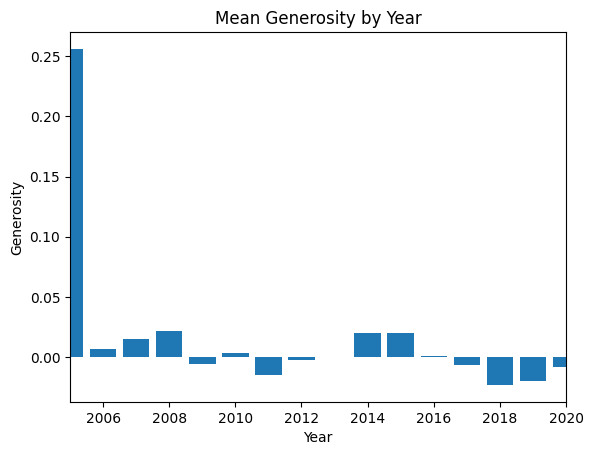

Mean of "Generosity" in 2021: -0.02


In [65]:
# check mean of 'Generosity' throughout the years
means = df_historical.groupby('Year')['Generosity'].mean()
plt.bar(means.index, means.values)
plt.xlim(means.index.min(), means.index.max())
plt.title('Mean Generosity by Year')
plt.xlabel('Year')
plt.ylabel('Generosity')
plt.show()

# only 1 value for 2005
# mean of 'Generosity' is shrinking since 2016
# mean of 'Generosity'
print('Mean of "Generosity" in 2021:',df_2021['Generosity'].mean().round(2))

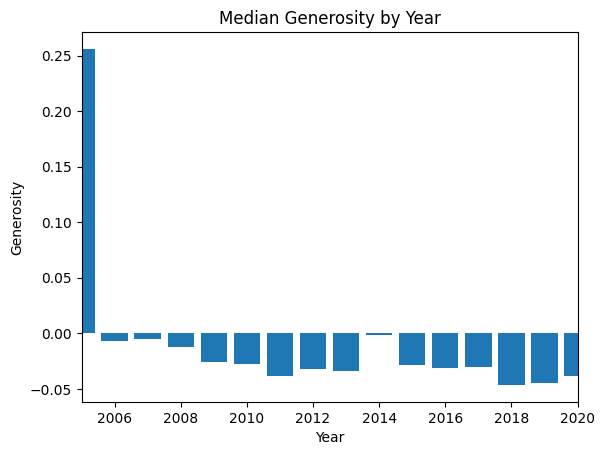

Median of "Generosity" in 2021: -0.04


In [66]:
# check median of 'Generosity' throughout the years
medians = df_historical.groupby('Year')['Generosity'].median()
plt.bar(medians.index, medians.values)
plt.xlim(medians.index.min(), medians.index.max())
plt.title('Median Generosity by Year')
plt.xlabel('Year')
plt.ylabel('Generosity')
plt.show()

# only 1 value for 2005
# median of 'Generosity' continuously negative throughout the years
# => What does it mean? observed donations < predicted donations?
print('Median of "Generosity" in 2021:',df_2021['Generosity'].median().round(2))

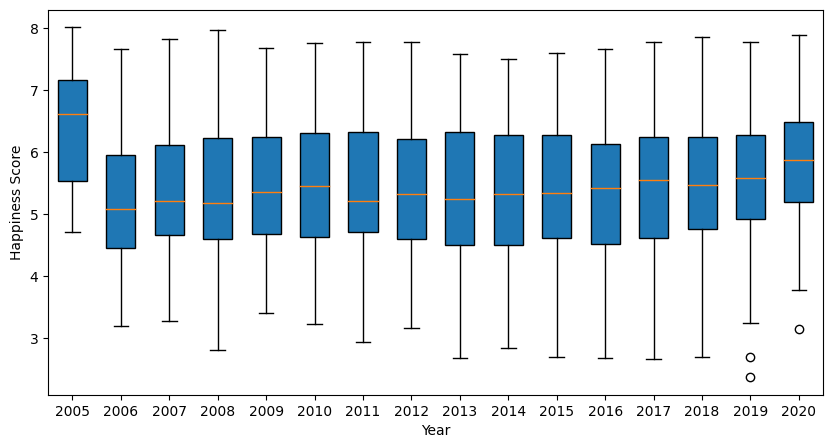

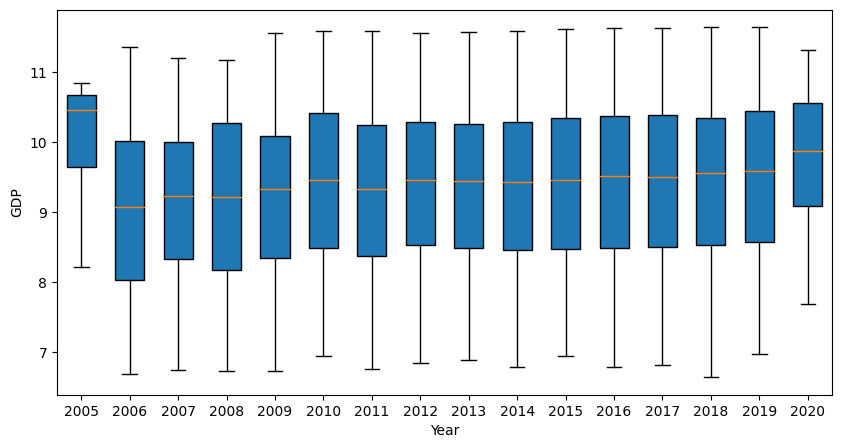

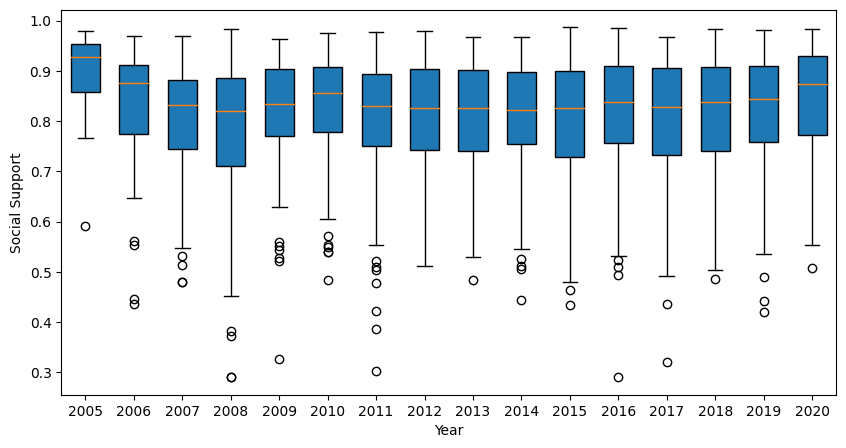

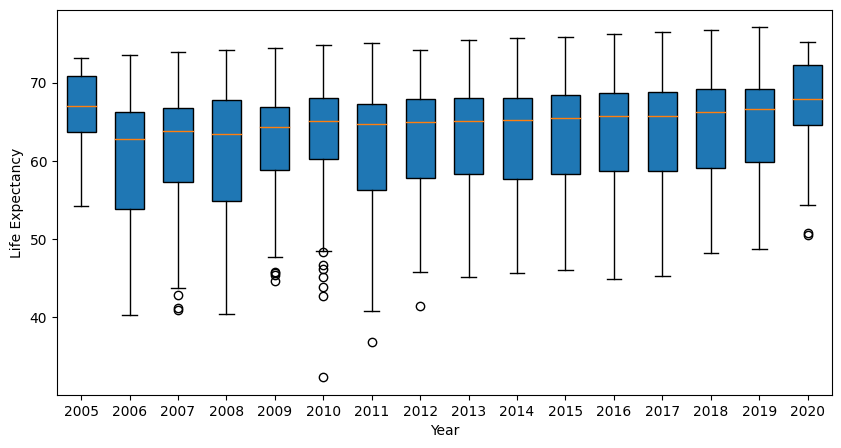

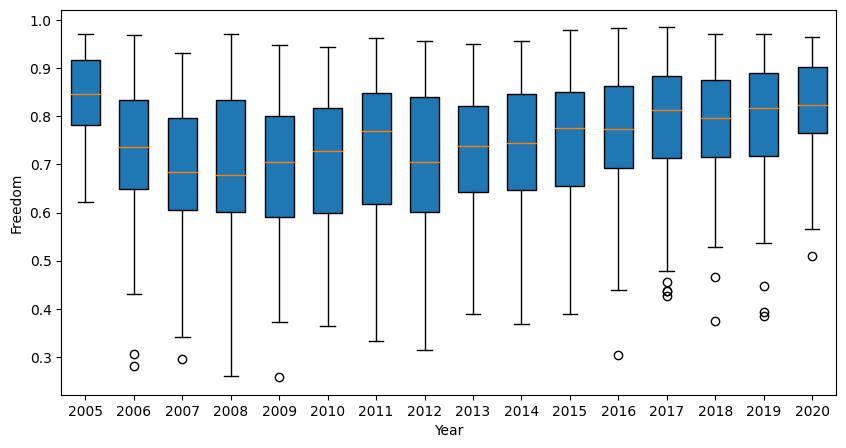

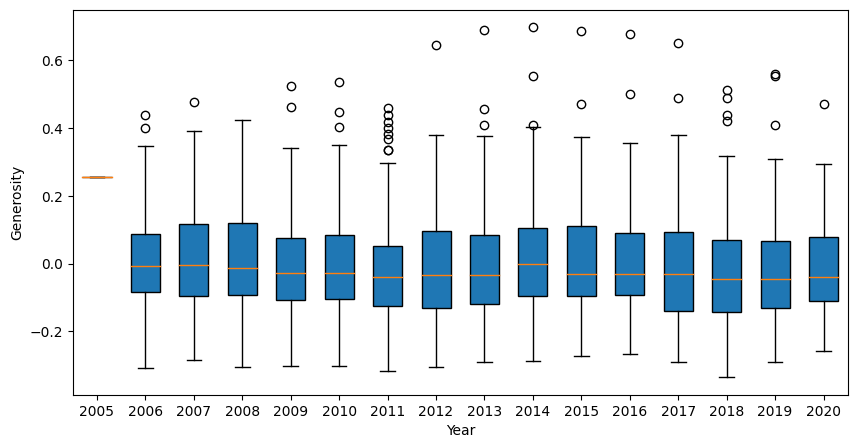

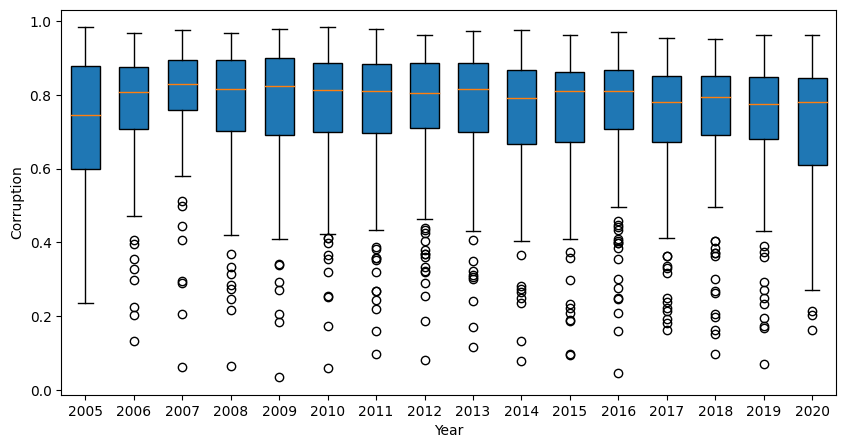

Outliers for 'Happiness Score' in year 2005: []
Outliers for 'Happiness Score' in year 2006: []
Outliers for 'Happiness Score' in year 2007: []
Outliers for 'Happiness Score' in year 2008: []
Outliers for 'Happiness Score' in year 2009: []
Outliers for 'Happiness Score' in year 2010: []
Outliers for 'Happiness Score' in year 2011: []
Outliers for 'Happiness Score' in year 2012: []
Outliers for 'Happiness Score' in year 2013: []
Outliers for 'Happiness Score' in year 2014: []
Outliers for 'Happiness Score' in year 2015: []
Outliers for 'Happiness Score' in year 2016: []
Outliers for 'Happiness Score' in year 2017: []
Outliers for 'Happiness Score' in year 2018: []
Outliers for 'Happiness Score' in year 2019: [2.375 2.694]
Outliers for 'Happiness Score' in year 2020: [3.16]
Outliers for 'GDP' in year 2005: []
Outliers for 'GDP' in year 2006: []
Outliers for 'GDP' in year 2007: []
Outliers for 'GDP' in year 2008: []
Outliers for 'GDP' in year 2009: []
Outliers for 'GDP' in year 2010: []
O

In [67]:
# check outliers or extreme values per year by ignoring missing values
years = sorted(df_historical['Year'].unique())

# create boxplot for each column and sort the x-axis
outliers = {}
grouped = df_historical.groupby('Year')
for col in ['Happiness Score','GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']:
    outliers[col] = {}
    fig, ax = plt.subplots(figsize=(10,5))
    for i, year in enumerate(years):
        group = grouped.get_group(year)
        bp = ax.boxplot(group[col].dropna(), positions=[i], widths=0.6, showfliers=True, patch_artist=True)
        outliers[col][year] = bp['fliers'][0].get_data()[1]
    ax.set_xticks(range(len(years)))
    ax.set_xticklabels(years)
    ax.set_xlabel('Year')
    ax.set_ylabel(col)
    plt.show()

# print outliers
for col, years in outliers.items():
    for year, out in years.items():
        print(f"Outliers for '{col}' in year {year}: {out}")

In [68]:
# show detailed information on outliers
# 2005 is not representable, only 27 countries listed

print('Outliers for "Happiness Score" in year 2019')
display(df_historical[(df_historical['Year']==2019) & (df_historical['Happiness Score']<=2.694)])
# ok
print('\n','Outliers for "Happiness Score" in year 2020')
display(df_historical[(df_historical['Year']==2020) & (df_historical['Happiness Score']==3.16)])
# ok
print('\n','Outliers for "Social Support" in year 2008')
display(df_historical[(df_historical['Year']==2008) & (df_historical['Social Support']<=0.382)])
# ok
print('\n','Outliers for "Social Support" in year 2009')
display(df_historical[(df_historical['Year']==2009) & (df_historical['Social Support']<=0.559)])
# ok
print('\n','Outliers for "Social Support" in year 2011')
display(df_historical[(df_historical['Year']==2011) & (df_historical['Social Support']<=0.521)])
# ok
print('\n','Outliers for "Social Support" in year 2016')
display(df_historical[(df_historical['Year']==2016) & (df_historical['Social Support']<=0.524)])
# ok
print('\n','Outliers for "Social Support" in year 2017')
display(df_historical[(df_historical['Year']==2017) & (df_historical['Social Support']<=0.436)])
# ok
print('\n','Outliers for "Life Expectancy" in year 2010')
display(df_historical[(df_historical['Year']==2010) & (df_historical['Life Expectancy']<=48.3)])
# Check Haiti Life Expectancy throuhout the years!
print('\n','Outliers for "Life Expectancy" in year 2011')
display(df_historical[(df_historical['Year']==2011) & (df_historical['Life Expectancy']==36.86)])
# Check Haiti Life Expectancy throuhout the years!
print('\n','Outliers for "Freedom" in year 2006')
display(df_historical[(df_historical['Year']==2006) & (df_historical['Freedom']<=0.306)])
# Cuba only for 2006 available
print('\n','Outliers for "Freedom" in year 2007')
display(df_historical[(df_historical['Year']==2007) & (df_historical['Freedom']==0.295)])
# ok
print('\n','Outliers for "Freedom" in year 2009')
display(df_historical[(df_historical['Year']==2009) & (df_historical['Freedom']==0.258)])
# ok
print('\n','Outliers for "Freedom" in year 2016')
display(df_historical[(df_historical['Year']==2016) & (df_historical['Freedom']==0.304)])
# ok
print('\n','Outliers for "Freedom" in year 2018')
display(df_historical[(df_historical['Year']==2018) & (df_historical['Freedom']<=0.467)])
# ok
print('\n','Outliers for "Freedom" in year 2019')
display(df_historical[(df_historical['Year']==2019) & (df_historical['Freedom']<=0.447)])
# ok
print('\n','Outliers for "Generosity" in year 2012')
display(df_historical[(df_historical['Year']==2012) & (df_historical['Generosity']==0.645)])
# ok
print('\n','Outliers for "Generosity" in year 2013')
display(df_historical[(df_historical['Year']==2013) & (df_historical['Generosity']>=0.41)])
# ok
print('\n','Outliers for "Generosity" in year 2014')
display(df_historical[(df_historical['Year']==2014) & (df_historical['Generosity']>=0.408)])
# ok
print('\n','Outliers for "Generosity" in year 2015')
display(df_historical[(df_historical['Year']==2015) & (df_historical['Generosity']>=0.471)])
# ok
print('\n','Outliers for "Generosity" in year 2016')
display(df_historical[(df_historical['Year']==2016) & (df_historical['Generosity']>=0.5)])
# ok
print('\n','Outliers for "Generosity" in year 2017')
display(df_historical[(df_historical['Year']==2017) & (df_historical['Generosity']>=0.488)])
# ok
print('\n','Outliers for "Generosity" in year 2019')
display(df_historical[(df_historical['Year']==2019) & (df_historical['Generosity']>=0.41)])
# ok
print('\n','Outliers for "Corruption" in year 2007')
display(df_historical[(df_historical['Year']==2007) & (df_historical['Corruption']==0.064)])
# ok
print('\n','Outliers for "Corruption" in year 2016')
display(df_historical[(df_historical['Year']==2016) & (df_historical['Corruption']==0.159)])
# ok
print('\n','Outliers for "Corruption" in year 2018')
display(df_historical[(df_historical['Year']==2018) & (df_historical['Corruption']==0.151)])
# ok

# => outliers are checked and we can keep them!

Outliers for "Happiness Score" in year 2019


Country  Year  Happiness Score    GDP  Social Support  \
11    Afghanistan  2019            2.375  7.697           0.420   
1947     Zimbabwe  2019            2.694  7.950           0.759   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
11               52.4    0.394      -0.108       0.924            0.351   
1947             56.2    0.632      -0.064       0.831            0.716   

      Negative Affect  
11              0.502  
1947            0.235


 Outliers for "Happiness Score" in year 2020


Country  Year  Happiness Score    GDP  Social Support  Life Expectancy  \
1948  Zimbabwe  2020             3.16  7.829           0.717             56.8   

      Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
1948    0.643      -0.009       0.789            0.703            0.346


 Outliers for "Social Support" in year 2008


Country  Year  Happiness Score    GDP  Social Support  Life Expectancy  \
164      Benin  2008            3.667  7.915           0.382            50.90   
258    Burundi  2008            3.563  6.719           0.291            49.02   
1313  Pakistan  2008            4.414  8.271           0.373            55.40   
1728      Togo  2008            2.808  7.052           0.291            50.18   

      Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
164     0.709      -0.004       0.825            0.584            0.303  
258     0.260      -0.019       0.860            0.440            0.253  
1313    0.335       0.100       0.848            0.655            0.321  
1728    0.287      -0.055       0.932            0.362            0.379


 Outliers for "Social Support" in year 2009


Country  Year  Happiness Score    GDP  Social Support  \
1     Afghanistan  2009            4.402  7.540           0.552   
121    Bangladesh  2009            5.083  7.924           0.528   
259       Burundi  2009            3.792  6.723           0.326   
594       Georgia  2009            3.801  9.116           0.544   
1314     Pakistan  2009            5.208  8.277           0.522   
1457       Rwanda  2009            4.030  7.273           0.559   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
1               51.20    0.679       0.190       0.850            0.584   
121             60.28    0.631      -0.075       0.776            0.670   
259             49.66    0.427      -0.019       0.718            0.641   
594             64.88    0.495      -0.233       0.535            0.492   
1314            55.80    0.388       0.077       0.874            0.639   
1457            54.62    0.766      -0.001       0.410            0.678   

      Negative Affect  
1               0.237  
121             0.223  
259             0.164  
594             0.242  
1314            0.349  
1457            0.112


 Outliers for "Social Support" in year 2011


Country  Year  Happiness Score    GDP  Social Support  \
3                  Afghanistan  2011            3.832  7.620           0.521   
165                      Benin  2011            3.870  7.904           0.477   
260                    Burundi  2011            3.706  6.748           0.422   
310   Central African Republic  2011            3.678  7.125           0.387   
596                    Georgia  2011            4.203  9.263           0.503   
1316                  Pakistan  2011            5.267  8.276           0.510   
1729                      Togo  2011            2.936  7.146           0.303   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
3               51.92    0.496       0.162       0.731            0.611   
165             51.98    0.773      -0.142       0.849            0.626   
260             50.68    0.490      -0.062       0.677            0.689   
310             43.08    0.780      -0.016       0.834            0.524   
596             64.86    0.632      -0.255       0.353            0.515   
1316            56.42    0.376       0.030       0.857            0.628   
1729            51.58    0.584      -0.070       0.832            0.480   

      Negative Affect  
3               0.267  
165             0.219  
260             0.190  
310             0.277  
596             0.247  
1316            0.358  
1729            0.395


 Outliers for "Social Support" in year 2016


Country  Year  Happiness Score    GDP  Social Support  \
170                      Benin  2016            4.007  7.993           0.493   
311   Central African Republic  2016            2.693  6.785           0.290   
1046                    Malawi  2016            3.476  6.932           0.524   
1732                      Togo  2016            3.879  7.306           0.509   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
170              53.5    0.780      -0.065       0.838            0.608   
311              44.9    0.624       0.033       0.859            0.579   
1046             56.2    0.810       0.066       0.824            0.603   
1732             53.9    0.730      -0.007       0.815            0.604   

      Negative Affect  
170             0.456  
311             0.494  
1046            0.325  
1732            0.483


 Outliers for "Social Support" in year 2017


Country  Year  Happiness Score    GDP  Social Support  \
171                     Benin  2017            4.853  8.021           0.436   
312  Central African Republic  2017            3.476  6.817           0.320   

     Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
171             53.9    0.727      -0.065       0.767            0.615   
312             45.2    0.645       0.073       0.890            0.614   

     Negative Affect  
171            0.458  
312            0.599


 Outliers for "Life Expectancy" in year 2010


Country  Year  Happiness Score    GDP  Social Support  \
282                   Cameroon  2010            4.554  8.035           0.759   
309   Central African Republic  2010            3.568  7.091           0.483   
317                       Chad  2010            3.743  7.457           0.734   
676                      Haiti  2010            3.766  7.384           0.554   
1271                   Nigeria  2010            4.760  8.504           0.824   
1512              Sierra Leone  2010            4.134  7.254           0.812   
1938                  Zimbabwe  2010            4.682  7.729           0.857   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
282              48.3    0.792       0.002       0.875            0.606   
309              42.7    0.690      -0.036       0.845            0.523   
317              45.1    0.505       0.025       0.858            0.545   
676              32.3    0.373       0.216       0.848            0.555   
1271             46.2    0.565       0.067       0.911            0.782   
1512             43.9    0.726       0.012       0.910            0.514   
1938             46.7    0.665      -0.093       0.828            0.748   

      Negative Affect  
282             0.274  
309             0.257  
317             0.287  
676             0.293  
1271            0.190  
1512            0.290  
1938            0.122


 Outliers for "Life Expectancy" in year 2011


Country  Year  Happiness Score    GDP  Social Support  Life Expectancy  \
677   Haiti  2011            4.845  7.423           0.567            36.86   

     Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
677    0.413       0.243       0.682            0.625            0.245


 Outliers for "Freedom" in year 2006


Country  Year  Happiness Score   GDP  Social Support  Life Expectancy  \
313    Chad  2006            3.435  7.36           0.724            43.18   
423    Cuba  2006            5.418   NaN           0.970            68.44   

     Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
313    0.306       0.028       0.961            0.580            0.263  
423    0.281         NaN         NaN            0.647            0.277


 Outliers for "Freedom" in year 2007


Country  Year  Happiness Score    GDP  Social Support  Life Expectancy  \
314    Chad  2007            4.141  7.359           0.479            43.66   

     Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
314    0.295      -0.011       0.874            0.614            0.245


 Outliers for "Freedom" in year 2009


Country  Year  Happiness Score    GDP  Social Support  \
194  Bosnia and Herzegovina  2009            4.963  9.296           0.735   

     Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
194            66.48    0.258      -0.026       0.959            0.572   

     Negative Affect  
194             0.39


 Outliers for "Freedom" in year 2016


Country  Year  Happiness Score    GDP  Social Support  Life Expectancy  \
682   Haiti  2016            3.352  7.477           0.584             55.3   

     Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
682    0.304       0.291       0.839            0.553            0.367


 Outliers for "Freedom" in year 2018


Country  Year  Happiness Score    GDP  Social Support  \
10    Afghanistan  2018            2.694  7.692           0.508   
1099   Mauritania  2018            4.314  8.526           0.802   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
10               52.6    0.374      -0.094       0.928            0.424   
1099             57.0    0.467      -0.112       0.711            0.663   

      Negative Affect  
10              0.405  
1099            0.276


 Outliers for "Freedom" in year 2019


Country  Year  Happiness Score    GDP  Social Support  \
11   Afghanistan  2019            2.375  7.697           0.420   
32       Algeria  2019            4.745  9.337           0.803   
981      Lebanon  2019            4.024  9.597           0.866   

     Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
11              52.4    0.394      -0.108       0.924            0.351   
32              66.1    0.385       0.005       0.741            0.585   
981             67.6    0.447      -0.081       0.890            0.322   

     Negative Affect  
11             0.502  
32             0.215  
981            0.494


 Outliers for "Generosity" in year 2012


Country  Year  Happiness Score    GDP  Social Support  Life Expectancy  \
1182  Myanmar  2012            4.439  8.158           0.612            57.02   

      Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
1182    0.691       0.645       0.695            0.764            0.205


 Outliers for "Generosity" in year 2013


Country  Year  Happiness Score     GDP  Social Support  \
1080     Malta  2013            6.380  10.422           0.942   
1183   Myanmar  2013            4.176   8.230           0.757   
1719  Thailand  2013            6.231   9.667           0.926   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
1080            71.96    0.909       0.410         NaN            0.660   
1183            57.38    0.775       0.689       0.638            0.803   
1719            66.16    0.781       0.456       0.925            0.846   

      Negative Affect  
1080            0.370  
1183            0.217  
1719            0.141


 Outliers for "Generosity" in year 2014


Country  Year  Happiness Score    GDP  Social Support  \
755   Indonesia  2014            5.597  9.190           0.905   
1184    Myanmar  2014            4.786  8.299           0.774   
1720   Thailand  2014            6.985  9.672           0.933   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
755             61.28    0.719       0.408       0.970            0.852   
1184            57.74      NaN       0.698       0.592            0.858   
1720            66.38    0.900       0.553       0.920            0.811   

      Negative Affect  
755             0.242  
1184            0.112  
1720            0.169


 Outliers for "Generosity" in year 2015


Country  Year  Happiness Score    GDP  Social Support  \
756   Indonesia  2015            5.043  9.225           0.809   
1185    Myanmar  2015            4.224  8.359           0.752   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
756              61.5    0.779       0.471       0.946            0.876   
1185             58.1    0.808       0.688       0.633            0.866   

      Negative Affect  
756             0.274  
1185            0.272


 Outliers for "Generosity" in year 2016


Country  Year  Happiness Score    GDP  Social Support  \
757   Indonesia  2016            5.136  9.262           0.792   
1186    Myanmar  2016            4.623  8.408           0.793   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
757              61.7    0.830       0.500       0.890            0.833   
1186             58.4    0.877       0.679       0.607            0.804   

      Negative Affect  
757             0.342  
1186            0.302


 Outliers for "Generosity" in year 2017


Country  Year  Happiness Score    GDP  Social Support  \
758   Indonesia  2017            5.098  9.300           0.796   
1187    Myanmar  2017            4.154  8.464           0.795   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
758              61.9    0.865       0.488       0.900            0.863   
1187             58.7    0.886       0.650       0.619            0.746   

      Negative Affect  
758             0.319  
1187            0.282


 Outliers for "Generosity" in year 2019


Country  Year  Happiness Score    GDP  Social Support  \
590      Gambia  2019            5.164  7.699           0.694   
760   Indonesia  2019            5.347  9.377           0.802   
1189    Myanmar  2019            4.434  8.545           0.763   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
590              55.3    0.677       0.410       0.798            0.773   
760              62.3    0.866       0.555       0.861            0.877   
1189             59.3    0.899       0.561       0.682            0.755   

      Negative Affect  
590             0.401  
760             0.302  
1189            0.286


 Outliers for "Corruption" in year 2007


Country  Year  Happiness Score     GDP  Social Support  \
1522  Singapore  2007            6.834  11.212           0.921   

      Life Expectancy  Freedom  Generosity  Corruption  Positive Affect  \
1522             73.9    0.867       0.293       0.064              0.7   

      Negative Affect  
1522            0.114


 Outliers for "Corruption" in year 2016


Country  Year  Happiness Score    GDP  Social Support  Life Expectancy  \
1463  Rwanda  2016            3.333  7.576           0.665             59.9   

      Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
1463    0.911       0.025       0.159            0.752            0.285


 Outliers for "Corruption" in year 2018


Country  Year  Happiness Score     GDP  Social Support  Life Expectancy  \
461  Denmark  2018            7.649  10.935           0.958             72.4   

     Freedom  Generosity  Corruption  Positive Affect  Negative Affect  
461    0.935       0.018       0.151            0.821            0.206

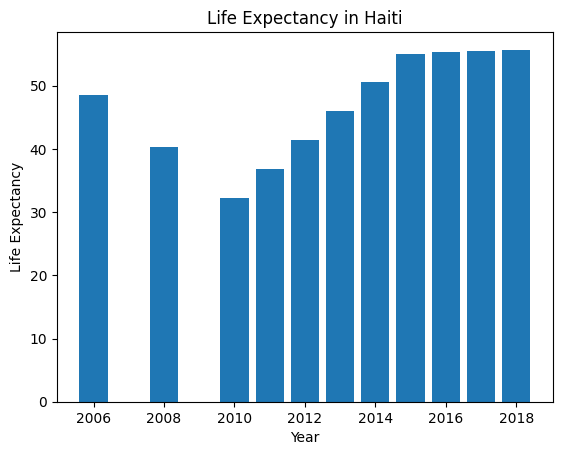

In [69]:
# check Haiti Life Expectancy throughout the years
haiti_life = df_historical[df_historical['Country']=='Haiti']
plt.bar(haiti_life['Year'], haiti_life['Life Expectancy'])
plt.title('Life Expectancy in Haiti')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

# ok

In [70]:
# drop 'Positive Affect' & 'Negative Effect' because of missing in 2021
df_historical.drop(['Positive Affect','Negative Affect'], axis=1, inplace=True)

In [71]:
# concat df_2021 and df_historical
df = pd.concat([df_2021, df_historical], axis=0)
df = df[['Country','Region','Year','Happiness Score','Happiness Score Classification',
         'GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']]
df

Country                              Region    Year  \
0                       Finland                      Western Europe     NaN   
1                       Denmark                      Western Europe     NaN   
2                   Switzerland                      Western Europe     NaN   
3                       Iceland                      Western Europe     NaN   
4                   Netherlands                      Western Europe     NaN   
5                        Norway                      Western Europe     NaN   
6                        Sweden                      Western Europe     NaN   
7                    Luxembourg                      Western Europe     NaN   
8                   New Zealand               North America and ANZ     NaN   
9                       Austria                      Western Europe     NaN   
10                    Australia               North America and ANZ     NaN   
11                       Israel        Middle East and North Africa     NaN   
12                      Germany                      Western Europe     NaN   
13                       Canada               North America and ANZ     NaN   
14                      Ireland                      Western Europe     NaN   
15                   Costa Rica         Latin America and Caribbean     NaN   
16               United Kingdom                      Western Europe     NaN   
17               Czech Republic          Central and Eastern Europe     NaN   
18                United States               North America and ANZ     NaN   
19                      Belgium                      Western Europe     NaN   
20                       France                      Western Europe     NaN   
21                      Bahrain        Middle East and North Africa     NaN   
22                        Malta                      Western Europe     NaN   
23     Taiwan Province of China                           East Asia     NaN   
24         United Arab Emirates        Middle East and North Africa     NaN   
25                 Saudi Arabia        Middle East and North Africa     NaN   
26                        Spain                      Western Europe     NaN   
27                        Italy                      Western Europe     NaN   
28                     Slovenia          Central and Eastern Europe     NaN   
29                    Guatemala         Latin America and Caribbean     NaN   
30                      Uruguay         Latin America and Caribbean     NaN   
31                    Singapore                      Southeast Asia     NaN   
32                       Kosovo          Central and Eastern Europe     NaN   
33                     Slovakia          Central and Eastern Europe     NaN   
34                       Brazil         Latin America and Caribbean     NaN   
35                       Mexico         Latin America and Caribbean     NaN   
36                      Jamaica         Latin America and Caribbean     NaN   
37                    Lithuania          Central and Eastern Europe     NaN   
38                       Cyprus                      Western Europe     NaN   
39                      Estonia          Central and Eastern Europe     NaN   
40                       Panama         Latin America and Caribbean     NaN   
41                   Uzbekistan  Commonwealth of Independent States     NaN   
42                        Chile         Latin America and Caribbean     NaN   
43                       Poland          Central and Eastern Europe     NaN   
44                   Kazakhstan  Commonwealth of Independent States     NaN   
45                      Romania          Central and Eastern Europe     NaN   
46                       Kuwait        Middle East and North Africa     NaN   
47                       Serbia          Central and Eastern Europe     NaN   
48                  El Salvador         Latin America and Caribbean     NaN   
49                    Mauritius                  Sub-Saharan Africa     Na

In [72]:
# show information on df
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2098 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         2098 non-null   object 
 1   Region                          149 non-null    object 
 2   Year                            1949 non-null   float64
 3   Happiness Score                 2098 non-null   float64
 4   Happiness Score Classification  149 non-null    object 
 5   GDP                             2062 non-null   float64
 6   Social Support                  2085 non-null   float64
 7   Life Expectancy                 2043 non-null   float64
 8   Freedom                         2066 non-null   float64
 9   Generosity                      2009 non-null   float64
 10  Corruption                      1988 non-null   float64
dtypes: float64(8), object(3)
memory usage: 196.7+ KB


In [73]:
# fill missing values in 'Year'
df['Year'] = df['Year'].fillna(2021)
df['Year'] = df['Year'].astype(int)

In [74]:
# check missing values in df
df.isna().sum()

Country                              0
Region                            1949
Year                                 0
Happiness Score                      0
Happiness Score Classification    1949
GDP                                 36
Social Support                      13
Life Expectancy                     55
Freedom                             32
Generosity                          89
Corruption                         110
dtype: int64

In [75]:
# show unique values for every column in df
df.nunique()

Country                            166
Region                              10
Year                                17
Happiness Score                   1639
Happiness Score Classification       6
GDP                               1580
Social Support                     462
Life Expectancy                    915
Freedom                            540
Generosity                         618
Corruption                         590
dtype: int64

In [76]:
# fill missing values in 'Region'
dct = {'Central and Eastern Europe':
        ['Albania','Bosnia and Herzegovina','Bulgaria','Croatia','Czech Republic','Estonia','Hungary','Kosovo','Latvia','Lithuania',
         'Montenegro','North Macedonia','Poland','Romania','Serbia','Slovakia','Slovenia'],
         'Commonwealth of Independent States':
        ['Armenia','Azerbaijan','Belarus','Georgia','Kazakhstan','Kyrgyzstan','Moldova','Russia','Tajikistan','Turkmenistan','Ukraine',
         'Uzbekistan'],
       'East Asia':
        ['China','Hong Kong S.A.R. of China','Japan','Mongolia','South Korea','Taiwan Province of China'],
       'Latin America and Caribbean':
        ['Argentina','Bolivia','Brazil','Chile','Colombia','Costa Rica','Dominican Republic','Ecuador','El Salvador','Guatemala','Haiti',
         'Honduras','Jamaica','Mexico','Nicaragua','Panama','Paraguay','Peru','Uruguay','Venezuela'],
       'Middle East and North Africa':
        ['Algeria','Bahrain','Egypt','Iran','Iraq','Israel','Jordan','Kuwait','Lebanon','Libya','Morocco','Palestinian Territories',
         'Saudi Arabia','Tunisia','Turkey','United Arab Emirates','Yemen'],
       'North America and ANZ':
        ['Australia','Canada','New Zealand','United States'],
       'South Asia':
        ['Afghanistan','Bangladesh','India','Maldives','Nepal','Pakistan','Sri Lanka'],
       'Southeast Asia':
        ['Cambodia','Indonesia','Laos','Malaysia','Myanmar','Philippines','Singapore','Thailand','Vietnam'],
       'Sub-Saharan Africa':
        ['Benin','Botswana','Burkina Faso','Burundi','Cameroon','Chad','Comoros','Congo (Brazzaville)','Ethiopia','Gabon','Gambia','Ghana',
         'Guinea','Ivory Coast','Kenya','Lesotho','Liberia','Madagascar','Malawi','Mali','Mauritania','Mauritius','Mozambique','Namibia',
         'Niger','Nigeria','Rwanda','Senegal','Sierra Leone','South Africa','Swaziland','Tanzania','Togo','Uganda','Zambia','Zimbabwe'],
       'Western Europe':
        ['Austria','Belgium','Cyprus','Denmark','Finland','France','Germany','Greece','Iceland','Ireland','Italy','Luxembourg','Malta',
         'Netherlands','North Cyprus','Norway','Portugal','Spain','Sweden','Switzerland','United Kingdom']}

# invert the dictionary
revdct = {c: r for r, lst in dct.items() for c in lst}
nan = float('NaN')
df['Region'] = df['Region'].fillna(df['Country'].map(revdct))
df

Country                              Region  Year  \
0                       Finland                      Western Europe  2021   
1                       Denmark                      Western Europe  2021   
2                   Switzerland                      Western Europe  2021   
3                       Iceland                      Western Europe  2021   
4                   Netherlands                      Western Europe  2021   
5                        Norway                      Western Europe  2021   
6                        Sweden                      Western Europe  2021   
7                    Luxembourg                      Western Europe  2021   
8                   New Zealand               North America and ANZ  2021   
9                       Austria                      Western Europe  2021   
10                    Australia               North America and ANZ  2021   
11                       Israel        Middle East and North Africa  2021   
12                      Germany                      Western Europe  2021   
13                       Canada               North America and ANZ  2021   
14                      Ireland                      Western Europe  2021   
15                   Costa Rica         Latin America and Caribbean  2021   
16               United Kingdom                      Western Europe  2021   
17               Czech Republic          Central and Eastern Europe  2021   
18                United States               North America and ANZ  2021   
19                      Belgium                      Western Europe  2021   
20                       France                      Western Europe  2021   
21                      Bahrain        Middle East and North Africa  2021   
22                        Malta                      Western Europe  2021   
23     Taiwan Province of China                           East Asia  2021   
24         United Arab Emirates        Middle East and North Africa  2021   
25                 Saudi Arabia        Middle East and North Africa  2021   
26                        Spain                      Western Europe  2021   
27                        Italy                      Western Europe  2021   
28                     Slovenia          Central and Eastern Europe  2021   
29                    Guatemala         Latin America and Caribbean  2021   
30                      Uruguay         Latin America and Caribbean  2021   
31                    Singapore                      Southeast Asia  2021   
32                       Kosovo          Central and Eastern Europe  2021   
33                     Slovakia          Central and Eastern Europe  2021   
34                       Brazil         Latin America and Caribbean  2021   
35                       Mexico         Latin America and Caribbean  2021   
36                      Jamaica         Latin America and Caribbean  2021   
37                    Lithuania          Central and Eastern Europe  2021   
38                       Cyprus                      Western Europe  2021   
39                      Estonia          Central and Eastern Europe  2021   
40                       Panama         Latin America and Caribbean  2021   
41                   Uzbekistan  Commonwealth of Independent States  2021   
42                        Chile         Latin America and Caribbean  2021   
43                       Poland          Central and Eastern Europe  2021   
44                   Kazakhstan  Commonwealth of Independent States  2021   
45                      Romania          Central and Eastern Europe  2021   
46                       Kuwait        Middle East and North Africa  2021   
47                       Serbia          Central and Eastern Europe  2021   
48                  El Salvador         Latin America and Caribbean  2021   
49                    Mauritius                  Sub-Saharan Africa  2021   
50                       Latvia          Central and Eastern Europe  2021   
51                  

In [77]:
# fill missing values in 'Happiness Score Classification'
# Cantril Ladder Classification: https://innobatics.gr/en/cantril-ladder/
# add Classification (from 1 to 10) to map absolute quality of the Happiness Score
df['Happiness Score numeric'] = pd.to_numeric(df['Happiness Score'], errors='coerce')

# Definition of the function of the Cantril Ladder Classification
def cantril_ladder_classification(score):
    if score < 2:
        return 'Hopeless'
    elif 2 <= score < 3:
        return 'Depressed'
    elif 3 <= score < 4:
        return 'Suffering'
    elif 4 <= score < 5:
        return 'Struggling'
    elif 5 <= score < 6:
        return 'Coping'
    elif 6 <= score < 7:
        return 'Just ok'
    elif 7 <= score < 8:
        return 'Doing well'
    elif 8 <= score < 9:
        return 'Blooming'
    elif 9 <= score < 10:
        return 'Thriving'
    else:
        return 'Prospering'

# apply function
df['Happiness Score Classification'] = df['Happiness Score numeric'].apply(cantril_ladder_classification)
df.drop('Happiness Score numeric', axis=1, inplace=True)
df

Country                              Region  Year  \
0                       Finland                      Western Europe  2021   
1                       Denmark                      Western Europe  2021   
2                   Switzerland                      Western Europe  2021   
3                       Iceland                      Western Europe  2021   
4                   Netherlands                      Western Europe  2021   
5                        Norway                      Western Europe  2021   
6                        Sweden                      Western Europe  2021   
7                    Luxembourg                      Western Europe  2021   
8                   New Zealand               North America and ANZ  2021   
9                       Austria                      Western Europe  2021   
10                    Australia               North America and ANZ  2021   
11                       Israel        Middle East and North Africa  2021   
12                      Germany                      Western Europe  2021   
13                       Canada               North America and ANZ  2021   
14                      Ireland                      Western Europe  2021   
15                   Costa Rica         Latin America and Caribbean  2021   
16               United Kingdom                      Western Europe  2021   
17               Czech Republic          Central and Eastern Europe  2021   
18                United States               North America and ANZ  2021   
19                      Belgium                      Western Europe  2021   
20                       France                      Western Europe  2021   
21                      Bahrain        Middle East and North Africa  2021   
22                        Malta                      Western Europe  2021   
23     Taiwan Province of China                           East Asia  2021   
24         United Arab Emirates        Middle East and North Africa  2021   
25                 Saudi Arabia        Middle East and North Africa  2021   
26                        Spain                      Western Europe  2021   
27                        Italy                      Western Europe  2021   
28                     Slovenia          Central and Eastern Europe  2021   
29                    Guatemala         Latin America and Caribbean  2021   
30                      Uruguay         Latin America and Caribbean  2021   
31                    Singapore                      Southeast Asia  2021   
32                       Kosovo          Central and Eastern Europe  2021   
33                     Slovakia          Central and Eastern Europe  2021   
34                       Brazil         Latin America and Caribbean  2021   
35                       Mexico         Latin America and Caribbean  2021   
36                      Jamaica         Latin America and Caribbean  2021   
37                    Lithuania          Central and Eastern Europe  2021   
38                       Cyprus                      Western Europe  2021   
39                      Estonia          Central and Eastern Europe  2021   
40                       Panama         Latin America and Caribbean  2021   
41                   Uzbekistan  Commonwealth of Independent States  2021   
42                        Chile         Latin America and Caribbean  2021   
43                       Poland          Central and Eastern Europe  2021   
44                   Kazakhstan  Commonwealth of Independent States  2021   
45                      Romania          Central and Eastern Europe  2021   
46                       Kuwait        Middle East and North Africa  2021   
47                       Serbia          Central and Eastern Europe  2021   
48                  El Salvador         Latin America and Caribbean  2021   
49                    Mauritius                  Sub-Saharan Africa  2021   
50                       Latvia          Central and Eastern Europe  2021   
51                  

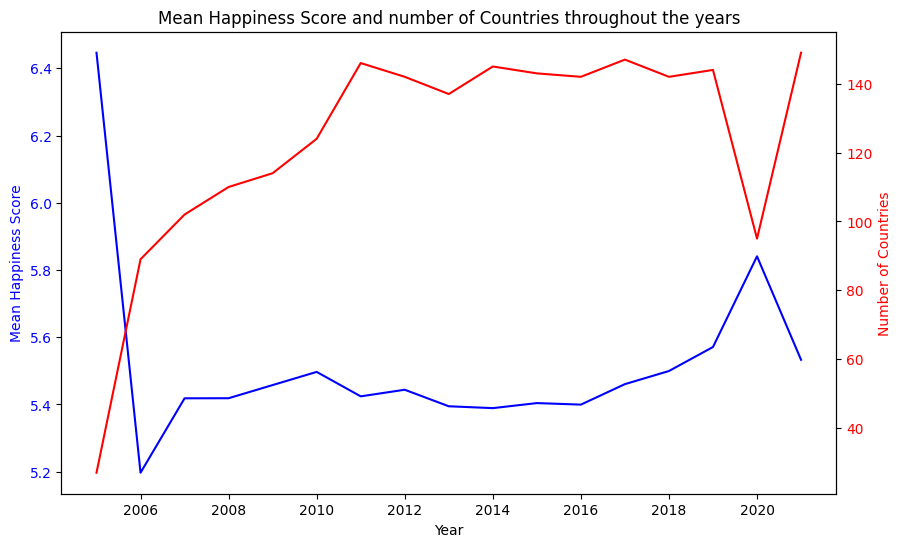

In [78]:
# plot mean Happiness Score throughout the years
mean_score = df.groupby('Year')['Happiness Score'].mean()
num_countries = df.groupby('Year')['Country'].nunique()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(mean_score.index, mean_score.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Happiness Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(num_countries.index, num_countries.values, color='red')
ax2.set_ylabel('Number of Countries', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Mean Happiness Score and number of Countries throughout the years')

plt.show()

# => mean Happiness Score 2005 and 2020 not useful, because of low number of participating countries
# plot again without 'useless' years

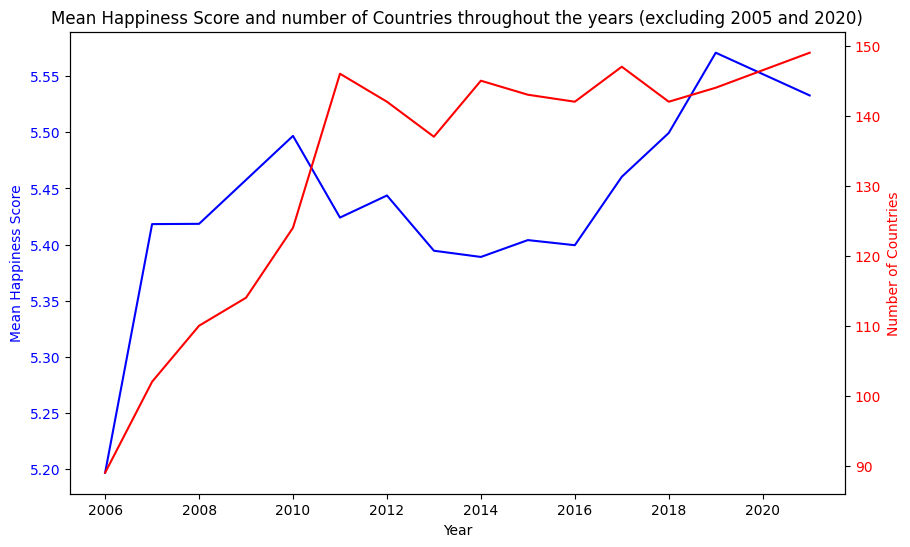

In [79]:
# plot mean Happiness Score throughout the years excluding 2005 and 2020
mean_score = df.query('Year != 2005 and Year != 2020').groupby('Year')['Happiness Score'].mean()
num_countries = df.query('Year != 2005 and Year != 2020').groupby('Year')['Country'].nunique()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(mean_score.index, mean_score.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Happiness Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(num_countries.index, num_countries.values, color='red')
ax2.set_ylabel('Number of Countries', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Mean Happiness Score and number of Countries throughout the years (excluding 2005 and 2020)')
plt.show()

# => mean Happiness Score rising from 2006 till 2010, falling till 2016, rising till 2019, falling afterwards

In [80]:
# Modelling part begins here

In [81]:
# delete rows with missing values in df
# it doesn't make sense to impute missing values, it would distort the results
# also, the missing rate is low
df.dropna(inplace=True)
df.isna().sum()

Country                           0
Region                            0
Year                              0
Happiness Score                   0
Happiness Score Classification    0
GDP                               0
Social Support                    0
Life Expectancy                   0
Freedom                           0
Generosity                        0
Corruption                        0
dtype: int64

In [82]:
# divide dataset into target (Happiness Score) and explanatory variables (GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption)
# we use the whole df_historical dataset from 2005-2020 to predict 2021
from sklearn.model_selection import train_test_split

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# train test split with test size 30% (enlarged test size due to missing countries in X_test with test size 20% or 25%)
# use parameter stratify to make sure that the countries are distributed in the same way in X_train and X_test as in original data
# drop Happiness Score Classification in X to not influence the results
X = df_05_20.drop(['Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=X['Country'])

print(len(X_train), len(X_test), len(y_train), len(y_test))

1166 501 1166 501


In [83]:
# check if every category in Country is represented in X_train
if set(X_train['Country']) != set(df_05_20['Country']):
    missing_countries = set(df_05_20['Country']) - set(X_train['Country'])
    print('missing countries in X_train:', missing_countries)

# check if every category in Country is represented in X_test
if set(X_test['Country']) != set(df_05_20['Country']):
    missing_countries = set(df_05_20['Country']) - set(X_test['Country'])
    print('missing countries in X_test:', missing_countries)

# => no missing countries in X_train and X_test after enlarging test size to 30%

In [84]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)

cat = ['Country','Region','Year']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# drop original categorical variables from X_train and X_test
X_train = X_train.drop(cat, axis=1)
X_test = X_test.drop(cat, axis=1)

In [85]:
# Standardization: is a scaling technique used when the features follow a Gaussian distribution or are approximately normally distributed.
# Standardization transforms the features to have a mean of 0 and standard deviation of 1.
# It is useful when the range of values of the features is known, and we want to make sure that different features have the same scale.
# This technique is commonly used for linear regression, logistic regression, and support vector machines.

In [86]:
# Standardization (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num = ['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [87]:
# concatenate categorical and numberical variables after encoding and scaling
X_train = np.concatenate((X_train_cat, X_train[num]), axis=1)
X_test = np.concatenate((X_test_cat, X_test[num]), axis=1)

In [88]:
# Linear Regression:
# Linear regression is a type of regression analysis that models the relationship between a dependent variable (also known as the
# response variable) and one or more independent variables (also known as predictor variables) that are assumed to have a linear
# relationship with the dependent variable. In other words, linear regression seeks to fit a straight line through a set of data points,
# in order to describe the relationship between the independent and dependent variables. The equation of this line is expressed as:
# y = b0 + b1 * x1 + b2 * x2 + ... + bn * xn
# where:
# y is the dependent variable
# b0 is the intercept or constant term
# b1, b2, ..., bn are the coefficients of the independent variables x1, x2, ..., xn
# x1, x2, ..., xn are the independent variables
# The goal of linear regression is to find the values of the coefficients b0, b1, b2, ..., bn that minimize the sum of the squared errors
# between the predicted values of the dependent variable and the actual values of the dependent variable. This is typically done using
# a method called ordinary least squares (OLS) regression. Once the coefficients are estimated, the linear regression model can be used
# to predict the value of the dependent variable for new values of the independent variables. Linear regression can be used for both
# simple regression problems, where there is only one independent variable, and multiple regression problems, where there are multiple
# independent variables. Linear regression is widely used in many fields, such as economics, finance, and social sciences, to model
# and analyze the relationships between variables. It is a simple and interpretable model that can be easily extended to handle
# more complex relationships between variables. However, it assumes a linear relationship between the independent and dependent variables,
# and it can be sensitive to outliers and non-linear relationships between variables.
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [89]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [90]:
# check intercept and estimated coefficients of each variable
print('Intercept:', LinReg.intercept_)
print('Coefficients:', LinReg.coef_)

# intercept represents the average value of the target variable when all predictors in the model are equal to zero

# when the variable x increases by 1 unit, y increases on average by the estimated coefficient
# => Intercept seems very high
# => because of high number of countries, we receive high number of coefficients
# => difficult for interpretation

Intercept: -144478532320.5907
Coefficients: [ 1.44478532e+11  8.02658513e+09  6.87993011e+09  1.20398777e+10
  2.88957065e+10  6.87993011e+09  1.20398777e+10  8.02658513e+09
  8.31085205e-01  1.20398777e+10  6.87993011e+09  3.90482520e+09
  6.87993011e+09  1.44478532e+11  3.90482520e+09  6.87993011e+09
  1.44478532e+11  3.90482520e+09  3.90482520e+09  1.44478532e+10
  3.90482520e+09  2.88957065e+10  3.90482520e+09  6.87993011e+09
  6.87993011e+09  3.90482520e+09  3.90482520e+09  6.87993011e+09
  1.44478532e+11  6.87993011e+09  1.44478532e+11  6.87993011e+09
  6.87993011e+09  6.87993011e+09  8.02658513e+09  6.87993011e+09
  1.44478532e+11  3.90482520e+09  6.87993011e+09  6.87993011e+09
  3.90482520e+09  3.90482520e+09  1.20398777e+10  6.87993011e+09
  3.90482520e+09  6.87993011e+09  6.87993011e+09  3.90482520e+09
  6.87993011e+09  6.87993011e+09  1.44478532e+11  6.87993011e+09
  6.47144318e-02  1.44478532e+10  8.02658513e+09  8.02658513e+09
  6.87993011e+09  8.02658513e+09  6.87993011e+

In [91]:
# check prediction errors
predictions = LinReg.predict(X_test)
errors = predictions - y_test
print(errors)

1428   -0.117419
797     0.406317
1319   -0.132106
599     0.137018
532     0.038818
1760    0.295807
1136    0.114480
289    -0.536311
1213   -0.007617
638    -0.291625
1710    0.372177
143     0.342111
1946    0.301297
639    -0.167606
1142    0.122050
1602   -0.541406
490    -0.280566
47     -0.246733
569    -0.177140
1177   -0.300041
400    -0.097721
208     0.411874
715     0.493819
68      0.164243
983     0.340529
1503   -0.260291
22      0.351377
1041    0.239364
1183   -0.035131
1625    0.167413
786    -0.220630
1784    0.092794
937    -0.426536
82     -0.083609
1692    0.015751
762    -0.615633
1452    0.187263
1186   -0.233596
893     0.133137
539    -0.213406
1132   -0.523226
468    -0.188800
1459    0.323586
1099    0.068050
633     0.204740
1508   -0.320748
517    -1.077708
1609   -0.062641
1453    0.314096
1267   -0.040048
101    -0.281572
1163    0.124008
1937   -0.440705
863    -0.126312
1884    0.034685
1084    0.051356
1752    0.103747
1524    0.146046
198    -0.2540

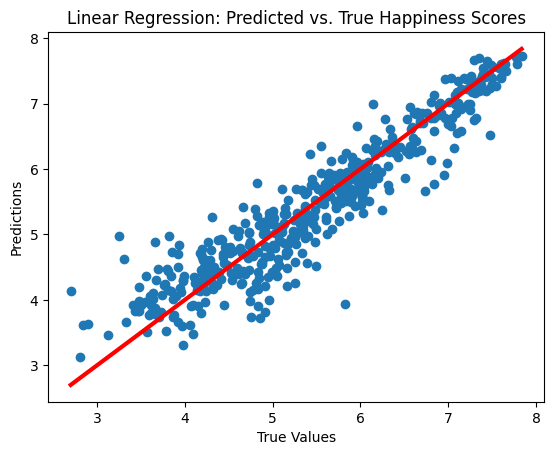

In [92]:
# scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predicted vs. True Happiness Scores')

# plot regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.show()

In [93]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

print('Coefficient of determination of the model on train set:', LinReg.score(X_train,y_train))
print('Coefficient of determination of the model on test set:', LinReg.score(X_test,y_test))

Coefficient of determination of the model on train set: 0.9218016095446757
Coefficient of determination of the model on test set: 0.8774567857199869


In [94]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# => run the model again without the encoded Country column!

Mean Absolute Error: 0.2993105478496133
Mean Squared Error: 0.15999788644802118
Root Mean Squared Error: 0.3999973580513016


In [95]:
# drop Country before One Hot Encoding categorical variables
# divide dataset into target (Happiness Score) and explanatory variables (GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption)
# we use the whole df_historical dataset from 2005-2020 to predict 2021
from sklearn.model_selection import train_test_split

# filter df to keep only the rows where the Year column is in the range 2005-2020 (inclusive)
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# train test split with test size 30%
# drop Happiness Score Classification in X to not influence the results
X = df_05_20.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1166 501 1166 501


In [96]:
# check if every category in Region is represented in X_train
if set(X_train['Region']) != set(df_05_20['Region']):
    missing_regions = set(df_05_20['Region']) - set(X_train['Region'])
    print('missing regions in X_train:', missing_regions)

# check if every category in Region is represented in X_test
if set(X_test['Region']) != set(df_05_20['Region']):
    missing_regions = set(df_05_20['Region']) - set(X_test['Region'])
    print('missing regions in X_test:', missing_regions)

# => no missing regions in X_train and X_test

In [97]:
# One Hot Encoding without Country column
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)

cat = ['Region','Year']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# drop original categorical variables from X_train and X_test
X_train = X_train.drop(cat, axis=1)
X_test = X_test.drop(cat, axis=1)

In [98]:
# Standardization (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num = ['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [99]:
# concatenate categorical and numberical variables after encoding and scaling
X_train = np.concatenate((X_train_cat, X_train[num]), axis=1)
X_test = np.concatenate((X_test_cat, X_test[num]), axis=1)

In [100]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [101]:
# check intercept and estimated coefficients of each variable
print('Intercept:', LinReg.intercept_)
print('Coefficients:', LinReg.coef_)

# intercept represents the average value of the target variable when all predictors in the model are equal to zero

# when the variable x increases by 1 unit, y increases on average by the estimated coefficient

# Intercept (with encoded Country column): 163545608978.02182!
# => Coefficients differ less than Coefficients with encoded Country column
# => Intercept seems to be more realistic

Intercept: 5.463831551662619
Coefficients: [ 0.04455035 -0.08782593  0.63409434  0.09216921  0.54551513  0.00096242
 -0.1980438  -0.10617603  0.43696182 -0.31849985 -0.01201793 -0.00892113
 -0.04369877 -0.08657077 -0.13791573 -0.1393549  -0.19609882 -0.25539937
 -0.24341869 -0.22292531 -0.15849552 -0.06068213 -0.20326966 -0.07259233
  0.47333811  0.2079817   0.07748087  0.14305933  0.12401709 -0.10015739]


In [102]:
# check prediction errors
predictions = LinReg.predict(X_test)
errors = predictions - y_test
print(errors)

1088    0.404996
1136   -0.526407
469     1.197744
820     0.225180
1882   -1.005983
152    -0.241207
1117   -0.328657
78     -0.059092
398    -0.185164
321     0.287468
555    -0.430052
1377    0.231169
895     0.190094
234     1.300059
637    -0.561495
568    -0.039473
659    -0.601242
207    -0.144599
56      0.234519
1318   -0.953254
1176   -0.885389
1232   -0.022853
1750    0.345692
1326    0.250957
190     0.065306
1913   -0.013277
107     0.863743
265    -0.064433
652    -0.423234
1786    0.553691
227    -0.364004
630     0.451761
1660   -0.476593
741     0.206466
454    -0.382460
842     0.593875
302    -0.197331
1323   -0.638033
23      0.065283
723    -0.078841
687     0.421355
1113   -0.663664
1347   -0.168198
379    -0.277507
1529    0.070621
1173   -0.039500
858    -0.033493
477     1.125213
1192    0.263124
1194    0.252746
1051   -0.507235
1368    0.606175
1348   -0.131611
491    -0.111576
363    -0.151105
1620    1.345297
73     -0.082053
835    -0.701371
32      0.2597

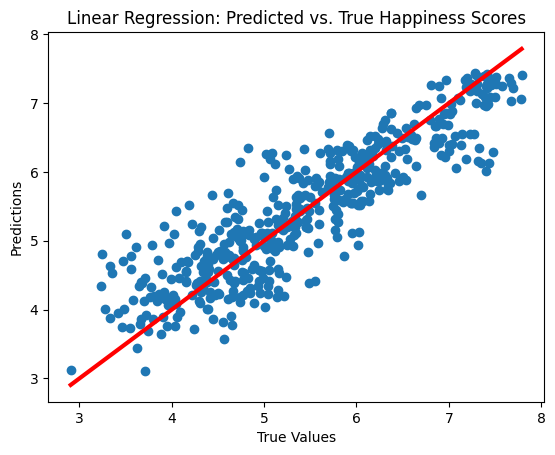

In [103]:
# scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predicted vs. True Happiness Scores')

# plot regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.show()

In [104]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

print('Coefficient of determination of the model on train set:', LinReg.score(X_train,y_train))
print('Coefficient of determination of the model on test set:', LinReg.score(X_test,y_test))

# Coefficient of determination of the model on train set (with encoded Country column): 0.9217824243143979
# Coefficient of determination of the model on test set (with encoded Country column): 0.8774446802502487
# => although the Intercept looks better, the Coefficient of determination has worse results
# => but: the coeefficients are very close to each other!

Coefficient of determination of the model on train set: 0.8014886875530511
Coefficient of determination of the model on test set: 0.7927630916033442


In [105]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean Absolute Error (with encoded Country column): 0.29927393893852927
# Mean Squared Error (with encoded Country column): 0.16001369188926046
# Root Mean Squared Error (with encoded Country column): 0.40001711449544314

# run again with test sizes 25% and 20%
# try different scaling
# try DecisionTreeRegressor and feat_importances
# try PCA

Mean Absolute Error: 0.38536971122325436
Mean Squared Error: 0.2532396892371397
Root Mean Squared Error: 0.5032292611098242


In [106]:
# drop Country before One Hot Encoding categorical variables and reduce test size to 25%
# divide dataset into target (Happiness Score) and explanatory variables (GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption)
# we use the whole df_historical dataset from 2005-2020 to predict 2021
from sklearn.model_selection import train_test_split

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# train test split with test size 25%
# drop Happiness Score Classification in X to not influence the results
X = df_05_20.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1250 417 1250 417


In [107]:
# check if every category in Region is represented in X_train
if set(X_train['Region']) != set(df_05_20['Region']):
    missing_regions = set(df_05_20['Region']) - set(X_train['Region'])
    print('missing regions in X_train:', missing_regions)

# check if every category in Region is represented in X_test
if set(X_test['Region']) != set(df_05_20['Region']):
    missing_regions = set(df_05_20['Region']) - set(X_test['Region'])
    print('missing regions in X_test:', missing_regions)

# => no missing regions in X_train and X_test

In [108]:
# One Hot Encoding without Country column
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)

cat = ['Region','Year']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# drop original categorical variables from X_train and X_test
X_train = X_train.drop(cat, axis=1)
X_test = X_test.drop(cat, axis=1)

In [109]:
# Standardization (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num = ['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [110]:
# concatenate categorical and numberical variables after encoding and scaling
X_train = np.concatenate((X_train_cat, X_train[num]), axis=1)
X_test = np.concatenate((X_test_cat, X_test[num]), axis=1)

In [111]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [112]:
# check intercept and estimated coefficients of each variable
print('Intercept:', LinReg.intercept_)
print('Coefficients:', LinReg.coef_)

# intercept represents the average value of the target variable when all predictors in the model are equal to zero

# when the variable x increases by 1 unit, y increases on average by the estimated coefficient

# Intercept with test size 30%: 5.463831551662627
# Coefficients with test size 30%: [ 0.04455035 -0.08782593  0.63409434  0.09216921  0.54551513  0.00096242
# -0.1980438  -0.10617603  0.43696182 -0.31849985 -0.01201793 -0.00892113
# -0.04369877 -0.08657077 -0.13791573 -0.1393549  -0.19609882 -0.25539937
# -0.24341869 -0.22292531 -0.15849552 -0.06068213 -0.20326966 -0.07259233
#  0.47333811  0.2079817   0.07748087  0.14305933  0.12401709 -0.10015739]

Intercept: 5.477992574576356
Coefficients: [ 0.00816027 -0.10284872  0.61768659  0.05531891  0.53665112 -0.03999556
 -0.2103774  -0.13234848  0.42601503 -0.31967824 -0.05449336  0.01003397
 -0.03338049 -0.080904   -0.1425114  -0.12269665 -0.20258785 -0.249293
 -0.2540588  -0.20694712 -0.18175358 -0.07462921 -0.1844536  -0.09569773
  0.46822225  0.20416204  0.07651299  0.14067831  0.11998139 -0.10397858]


In [113]:
# check prediction errors
predictions = LinReg.predict(X_test)
errors = predictions - y_test
print(errors)

1088    0.375987
1136   -0.523722
469     1.158642
820     0.221170
1882   -0.990826
152    -0.224529
1117   -0.330666
78     -0.036078
398    -0.170364
321     0.306165
555    -0.405940
1377    0.211653
895     0.185935
234     1.327530
637    -0.595028
568    -0.029119
659    -0.608314
207    -0.127900
56      0.235509
1318   -0.965491
1176   -0.850779
1232   -0.012430
1750    0.322640
1326    0.208805
190     0.058555
1913   -0.019864
107     0.853168
265    -0.029185
652    -0.399179
1786    0.562809
227    -0.372459
630     0.440852
1660   -0.452579
741     0.185196
454    -0.384039
842     0.602626
302    -0.206280
1323   -0.665037
23      0.105026
723    -0.087235
687     0.444740
1113   -0.662980
1347   -0.166973
379    -0.273903
1529    0.066004
1173   -0.067490
858    -0.009263
477     1.117507
1192    0.270196
1194    0.238012
1051   -0.547848
1368    0.632972
1348   -0.145707
491    -0.093949
363    -0.134492
1620    1.318183
73     -0.075553
835    -0.715903
32      0.2706

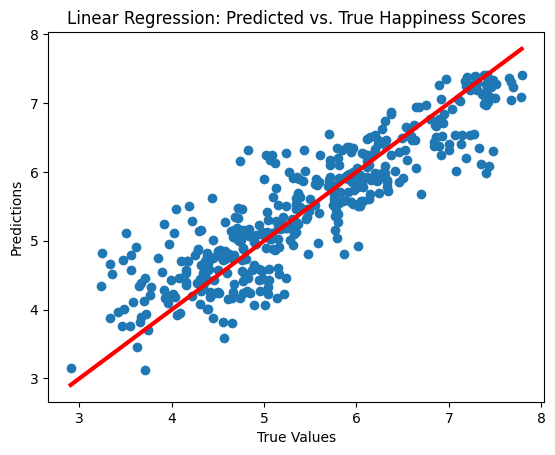

In [114]:
# scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predicted vs. True Happiness Scores')

# plot regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.show()

In [115]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

print('Coefficient of determination of the model on train set:', LinReg.score(X_train,y_train))
print('Coefficient of determination of the model on test set:', LinReg.score(X_test,y_test))

# Coefficient of determination of the model on train set (with test size 30%): 0.8014886875530511
# Coefficient of determination of the model on test set (with test soze 30%): 0.7927630916033443
# => similar results, test size doesn't really matter
# => again coefficients very close to each other

Coefficient of determination of the model on train set: 0.8014889463309637
Coefficient of determination of the model on test set: 0.7923327900605963


In [116]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean Absolute Error (with test size 30%): 0.3853697112232543
# Mean Squared Error (with test size 30%): 0.2532396892371396
# Root Mean Squared Error (with test size 30%): 0.5032292611098241

# => similar results, test size doesn't really matter
# => we don't need to run the model again with test 20%
# try different scaling => Normalization

Mean Absolute Error: 0.3849772575511287
Mean Squared Error: 0.2550331427213486
Root Mean Squared Error: 0.5050080620359922


In [117]:
# drop Country before One Hot Encoding categorical variables, test size 30%, Normalization
# divide dataset into target (Happiness Score) and explanatory variables (GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption)
# we use the whole df_historical dataset from 2005-2020 to predict 2021
from sklearn.model_selection import train_test_split

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# train test split with test size 25%
# drop Happiness Score Classification in X to not influence the results
X = df_05_20.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1166 501 1166 501


In [118]:
# check if every category in Region is represented in X_train
if set(X_train['Region']) != set(df_05_20['Region']):
    missing_regions = set(df_05_20['Region']) - set(X_train['Region'])
    print('missing regions in X_train:', missing_regions)

# check if every category in Region is represented in X_test
if set(X_test['Region']) != set(df_05_20['Region']):
    missing_regions = set(df_05_20['Region']) - set(X_test['Region'])
    print('missing regions in X_test:', missing_regions)

# => no missing regions in X_train and X_test

In [119]:
# One Hot Encoding without Country column
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)

cat = ['Region','Year']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# drop original categorical variables from X_train and X_test
X_train = X_train.drop(cat, axis=1)
X_test = X_test.drop(cat, axis=1)

In [120]:
# Normalization: is a scaling technique used when the distribution of the data is not known.
# Normalization is used to rescale the values of the numerical feature to a range of 0 to 1. This technique is useful
# when the range of values of the features is unknown, and it can be used for algorithms that assume the features
# follow a Gaussian distribution or have a linear relationship with the target variable.

In [121]:
# Normalization (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num = ['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [122]:
# concatenate categorical and numberical variables after encoding and scaling
X_train = np.concatenate((X_train_cat, X_train[num]), axis=1)
X_test = np.concatenate((X_test_cat, X_test[num]), axis=1)

In [123]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [124]:
# check intercept and estimated coefficients of each variable
print('Intercept:', LinReg.intercept_)
print('Coefficients:', LinReg.coef_)

# intercept represents the average value of the target variable when all predictors in the model are equal to zero

# when the variable x increases by 1 unit, y increases on average by the estimated coefficient

# Intercept (with Standardization): 5.463831551662627
# Coefficients (with Standardization): [ 0.04455035 -0.08782593  0.63409434  0.09216921  0.54551513  0.00096242
# -0.1980438  -0.10617603  0.43696182 -0.31849985 -0.01201793 -0.00892113
# -0.04369877 -0.08657077 -0.13791573 -0.1393549  -0.19609882 -0.25539937
# -0.24341869 -0.22292531 -0.15849552 -0.06068213 -0.20326966 -0.07259233
#  0.47333811  0.2079817   0.07748087  0.14305933  0.12401709 -0.10015739]

# => Intercept is way smaller
# => Coefficients vary more strongly

Intercept: 2.84388102762917
Coefficients: [ 4.45503481e-02 -8.78259327e-02  6.34094342e-01  9.21692115e-02
  5.45515131e-01  9.62422250e-04 -1.98043803e-01 -1.06176027e-01
  4.36961815e-01 -3.18499846e-01 -1.20179295e-02 -8.92112586e-03
 -4.36987653e-02 -8.65707714e-02 -1.37915728e-01 -1.39354897e-01
 -1.96098815e-01 -2.55399373e-01 -2.43418687e-01 -2.22925308e-01
 -1.58495516e-01 -6.06821251e-02 -2.03269656e-01 -7.25923310e-02
  2.05808516e+00  1.15986643e+00  4.06945105e-01  7.39783272e-01
  7.66783473e-01 -5.07198428e-01]


In [125]:
# check prediction errors
predictions = LinReg.predict(X_test)
errors = predictions - y_test
print(errors)

1088    0.404996
1136   -0.526407
469     1.197744
820     0.225180
1882   -1.005983
152    -0.241207
1117   -0.328657
78     -0.059092
398    -0.185164
321     0.287468
555    -0.430052
1377    0.231169
895     0.190094
234     1.300059
637    -0.561495
568    -0.039473
659    -0.601242
207    -0.144599
56      0.234519
1318   -0.953254
1176   -0.885389
1232   -0.022853
1750    0.345692
1326    0.250957
190     0.065306
1913   -0.013277
107     0.863743
265    -0.064433
652    -0.423234
1786    0.553691
227    -0.364004
630     0.451761
1660   -0.476593
741     0.206466
454    -0.382460
842     0.593875
302    -0.197331
1323   -0.638033
23      0.065283
723    -0.078841
687     0.421355
1113   -0.663664
1347   -0.168198
379    -0.277507
1529    0.070621
1173   -0.039500
858    -0.033493
477     1.125213
1192    0.263124
1194    0.252746
1051   -0.507235
1368    0.606175
1348   -0.131611
491    -0.111576
363    -0.151105
1620    1.345297
73     -0.082053
835    -0.701371
32      0.2597

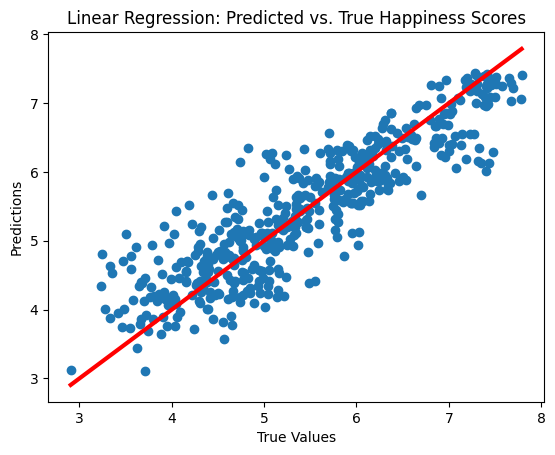

In [126]:
# scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predicted vs. True Happiness Scores')

# plot regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.show()

In [127]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

print('Coefficient of determination of the model on train set:', LinReg.score(X_train,y_train))
print('Coefficient of determination of the model on test set:', LinReg.score(X_test,y_test))

# Coefficient of determination of the model on train set (with Standardization): 0.8014889463309638
# Coefficient of determination of the model on test set (with Standardization): 0.7923327900605963

# => similar values as with Normalization
# => again coefficients very close to each other

Coefficient of determination of the model on train set: 0.8014886875530511
Coefficient of determination of the model on test set: 0.7927630916033443


In [128]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Mean Absolute Error (with Standardization): 0.38497725755112877
# Mean Squared Error (with Standardization): 0.2550331427213486
# Root Mean Squared Error (with Standardization): 0.5050080620359922

# => similar results as with Standardization!
# => try again with Robust Scaling

Mean Absolute Error: 0.3853697112232544
Mean Squared Error: 0.2532396892371395
Root Mean Squared Error: 0.5032292611098241


In [129]:
# drop Country before One Hot Encoding categorical variables, test size 30%, Robust Scaling
# divide dataset into target (Happiness Score) and explanatory variables (GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption)
# we use the whole df_historical dataset from 2005-2020 to predict 2021
from sklearn.model_selection import train_test_split

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# train test split with test size 25%
# drop Happiness Score Classification in X to not influence the results
X = df_05_20.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1166 501 1166 501


In [130]:
# check if every category in Region is represented in X_train
if set(X_train['Region']) != set(df_05_20['Region']):
    missing_regions = set(df_05_20['Region']) - set(X_train['Region'])
    print('missing regions in X_train:', missing_regions)

# check if every category in Region is represented in X_test
if set(X_test['Region']) != set(df_05_20['Region']):
    missing_regions = set(df_05_20['Region']) - set(X_test['Region'])
    print('missing regions in X_test:', missing_regions)

# => no missing regions in X_train and X_test

In [131]:
# One Hot Encoding without Country column
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)

cat = ['Region','Year']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# drop original categorical variables from X_train and X_test
X_train = X_train.drop(cat, axis=1)
X_test = X_test.drop(cat, axis=1)

In [132]:
# Robust Scaling: is a scaling technique that is useful when dealing with outliers in the data.
# Robust Scaling scales the features using median and interquartile range (IQR) instead of mean and standard deviation,
# which makes it more resistant to the presence of outliers. It is useful when the range of values of the features is not known
# and the data contains outliers.

In [133]:
# Robust Scaling (RobustScaler)
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

num = ['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

In [134]:
# concatenate categorical and numerical variables after encoding and scaling
X_train = np.concatenate((X_train_cat, X_train[num]), axis=1)
X_test = np.concatenate((X_test_cat, X_test[num]), axis=1)

In [135]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [136]:
# check intercept and estimated coefficients of each variable
print('Intercept:', LinReg.intercept_)
print('Coefficients:', LinReg.coef_)

# intercept represents the average value of the target variable when all predictors in the model are equal to zero

# when the variable x increases by 1 unit, y increases on average by the estimated coefficient

Intercept: 5.545879422711051
Coefficients: [ 0.04455035 -0.08782593  0.63409434  0.09216921  0.54551513  0.00096242
 -0.1980438  -0.10617603  0.43696182 -0.31849985 -0.01201793 -0.00892113
 -0.04369877 -0.08657077 -0.13791573 -0.1393549  -0.19609882 -0.25539937
 -0.24341869 -0.22292531 -0.15849552 -0.06068213 -0.20326966 -0.07259233
  0.78759756  0.28035676  0.10548337  0.20529749  0.1565017  -0.0977748 ]


In [137]:
# check prediction errors
predictions = LinReg.predict(X_test)
errors = predictions - y_test
print(errors)

1088    0.404996
1136   -0.526407
469     1.197744
820     0.225180
1882   -1.005983
152    -0.241207
1117   -0.328657
78     -0.059092
398    -0.185164
321     0.287468
555    -0.430052
1377    0.231169
895     0.190094
234     1.300059
637    -0.561495
568    -0.039473
659    -0.601242
207    -0.144599
56      0.234519
1318   -0.953254
1176   -0.885389
1232   -0.022853
1750    0.345692
1326    0.250957
190     0.065306
1913   -0.013277
107     0.863743
265    -0.064433
652    -0.423234
1786    0.553691
227    -0.364004
630     0.451761
1660   -0.476593
741     0.206466
454    -0.382460
842     0.593875
302    -0.197331
1323   -0.638033
23      0.065283
723    -0.078841
687     0.421355
1113   -0.663664
1347   -0.168198
379    -0.277507
1529    0.070621
1173   -0.039500
858    -0.033493
477     1.125213
1192    0.263124
1194    0.252746
1051   -0.507235
1368    0.606175
1348   -0.131611
491    -0.111576
363    -0.151105
1620    1.345297
73     -0.082053
835    -0.701371
32      0.2597

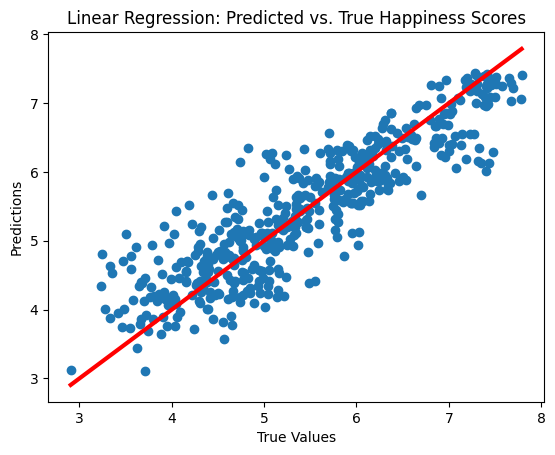

In [138]:
# scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predicted vs. True Happiness Scores')

# plot regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.show()

In [139]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

print('Coefficient of determination of the model on train set:', LinReg.score(X_train,y_train))
print('Coefficient of determination of the model on test set:', LinReg.score(X_test,y_test))

# => again similar results as with Standardization and Normalization
# => again coefficients very close to each other

Coefficient of determination of the model on train set: 0.8014886875530511
Coefficient of determination of the model on test set: 0.7927630916033442


In [140]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# => again similar results as with Standardization and Normalization
# => Scaling technique doesn't really matter

Mean Absolute Error: 0.38536971122325436
Mean Squared Error: 0.25323968923713963
Root Mean Squared Error: 0.5032292611098242


In [141]:
# drop all categorical variables
# divide dataset into target (Happiness Score) and explanatory variables (GDP,Social Support,Life Expectancy,Freedom,Generosity,Corruption)
# we use the whole df_historical dataset from 2005-2020 to predict 2021
from sklearn.model_selection import train_test_split

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# train test split with test size 20%
# drop Happiness Score Classification in X to not influence the results
X = df_05_20.drop(['Country','Region','Year','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1333 334 1333 334


In [142]:
# Standardization (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
# Linear Regression
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

LinearRegression()

In [144]:
# check intercept and estimated coefficients of each variable
print('Intercept:', LinReg.intercept_)
print('Coefficients:', LinReg.coef_)

# intercept represents the average value of the target variable when all predictors in the model are equal to zero

# when the variable x increases by 1 unit, y increases on average by the estimated coefficient

Intercept: 5.451093773443361
Coefficients: [ 0.42772325  0.26016389  0.23372147  0.13510666  0.12027641 -0.13761506]


In [145]:
# check prediction errors
predictions = LinReg.predict(X_test)
errors = predictions - y_test
print(errors)

1088    0.345566
1136   -0.354040
469     0.570128
820     0.080778
1882   -1.509368
152    -0.401165
1117   -0.670986
78     -0.142616
398    -0.670360
321     0.332907
555    -0.518556
1377   -0.180659
895     0.321042
234     1.405919
637    -0.893195
568    -0.188855
659    -0.983080
207    -0.320294
56      0.246499
1318   -0.929722
1176   -1.045941
1232   -0.047711
1750    0.344114
1326    0.149328
190    -0.496936
1913   -0.110490
107     0.887420
265    -0.047923
652    -1.050500
1786    0.763725
227    -0.681918
630     0.591863
1660   -0.424881
741     0.293713
454    -0.445420
842     0.291221
302    -0.261053
1323   -0.707591
23      0.286335
723     0.094949
687    -0.149428
1113   -1.100766
1347   -0.468203
379    -0.253738
1529    0.817077
1173   -0.101081
858     0.495398
477     0.782698
1192    0.430223
1194    0.292675
1051   -0.274905
1368    0.002715
1348   -0.426858
491    -0.380544
363    -0.577050
1620    1.551165
73     -0.151895
835    -0.762090
32      0.4442

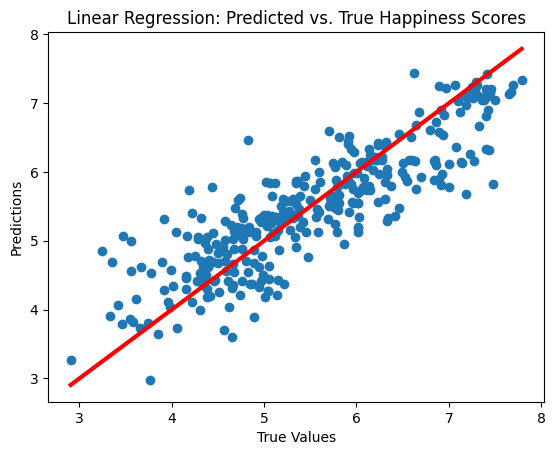

In [146]:
# scatter plot
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predicted vs. True Happiness Scores')

# plot regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=3)
plt.show()

In [147]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

print('Coefficient of determination of the model on train set:', LinReg.score(X_train,y_train))
print('Coefficient of determination of the model on test set:', LinReg.score(X_test,y_test))

# => worst results of all Linear Regression models!
# => but coefficients very close to each other

Coefficient of determination of the model on train set: 0.7535904293766762
Coefficient of determination of the model on test set: 0.7480547302057377


In [148]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# => worst results of all Linear Regression models!

Mean Absolute Error: 0.422291693401599
Mean Squared Error: 0.29717725635994885
Root Mean Squared Error: 0.5451396668377277


In [149]:
# run Linear Regression model to predict Happiness Scores for 2021 (first model with Country column)

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# filter df to keep only the rows where the Year column is 2021
df_21 = df.loc[df['Year'] == 2021]

# find the intersection of Country values in df_05_20 and df_21
intersecting_countries = set(df_05_20['Country']).intersection(set(df_21['Country']))

# filter df_05_20 to keep only the intersecting countries
df_05_20 = df_05_20.loc[df_05_20['Country'].isin(intersecting_countries)]

# filter df_21 to keep only the intersecting countries
df_21 = df_21.loc[df_21['Country'].isin(intersecting_countries)]

# train test split with test size 30%, stratified by Country
X = df_05_20.drop(['Year','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=X['Country'])

# One Hot Encoding for categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
cat = ['Country','Region']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# Standardization for numerical variables
scaler = StandardScaler()
num = ['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

# concatenate categorical and numerical variables
X_train = np.concatenate((X_train_cat, X_train[num]), axis=1)
X_test = np.concatenate((X_test_cat, X_test[num]), axis=1)

# Linear Regression model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# predict Happiness Scores for 2021
X_21 = df_21.drop(['Happiness Score','Happiness Score Classification'], axis=1)
X_21_cat = ohe.transform(X_21[cat])
X_21[num] = scaler.transform(X_21[num])
X_21 = np.concatenate((X_21_cat, X_21[num]), axis=1)
y_pred = LinReg.predict(X_21)
y_pred_rounded = np.round(y_pred, 4)

df_21_scores = pd.DataFrame({'Country': df_21['Country'],
                             'Region': df_21['Region'],
                             'True Happiness Score': df_21['Happiness Score'],
                             'Predicted Happiness Score': y_pred_rounded})

df_21_scores['Score Difference'] = df_21_scores['Predicted Happiness Score'] - df_21_scores['True Happiness Score']
df_21_scores['Score Sign'] = np.where(df_21_scores['Score Difference'] > 0, 'Higher', 'Lower')
df_21_scores_sorted = df_21_scores.sort_values(by='Score Difference', ascending=True)
styled_df = df_21_scores_sorted.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_df)

# Score Differences of countries with lower and middle Happiness Scores tend to be higher than of countries with high Happiness Scores
# bad prediction for Egypt, India, Pakistan and Philippines with high population!

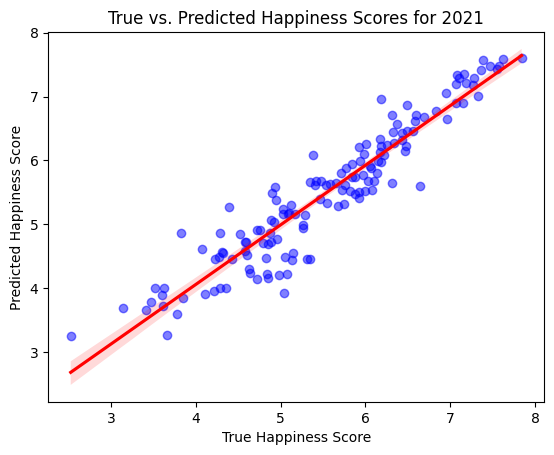

In [150]:
# scatter plot & regression line
sns.regplot(x=df_21_scores['True Happiness Score'],
            y=df_21_scores['Predicted Happiness Score'],
            color='red',
            scatter_kws={'color':'blue',
                         'alpha':0.5})
plt.xlabel('True Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('True vs. Predicted Happiness Scores for 2021')
plt.show()

# scatter plot confirms that countries with higher Happiness Score have better predictions

In [151]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

r2_score_value = r2_score(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
print('R-squared score:', r2_score_value)

R-squared score: 0.8842493709284499


In [152]:
# check MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
mse = mean_squared_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 0.28040139860139857
Mean Squared Error (MSE): 0.13729392251748254
Root Mean Squared Error (RMSE): 0.370531945340051


In [153]:
# Analysis with statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

df_05_20_rename = df_05_20.rename(columns={'Happiness Score': 'HappinessScore', 'Social Support': 'SocialSupport', 'Life Expectancy': 'LifeExpectancy'})

model = ols('HappinessScore ~ GDP + SocialSupport + LifeExpectancy + Freedom + Generosity + Corruption', data=df_05_20_rename).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
display(anova_table)

# ANOVA Table: The ANOVA table provides information about the overall significance of the regression model. Look at the "F-statistic" and its associated
# p-value (usually labeled as "PR(>F)") to determine whether the overall model is statistically significant in explaining the dependent variable.
# A low p-value suggests that the model is a good fit for the data.

# Sum of Squares: The ANOVA table also provides the sum of squares values, including the "Sum Sq" column, which represents the sum of squares explained
# by each predictor variable. This information helps assess the relative importance of each predictor in explaining the dependent variable's variability.

# Residual Analysis: It's important to examine the residuals of the model to check for any patterns or deviations from the assumptions of linear regression.
# You can plot the residuals against the predicted values or the predictor variables to identify any systematic patterns. If the residuals exhibit a
# random pattern around zero and do not show any specific trends, it suggests that the model adequately captures the relationship between the predictors
# and the dependent variable.

# => Square of each variable: GDP, Social Support and Life Expectancy explain more variability in the Happiness Score
# => Degree of freedom: each variable has 1 degree of freedom, means that there are two gropus being compares for each variable
# => F-statistic: is the ratio of between-group variability to within-group variability. All values seem to be high, which could mean that there are
# larger differences between groups
# => P-value associated with each F-statistic: All values seem to be low and therefore indicate significant impact on Happiness Score

sum_sq      df           F        PR(>F)
GDP              56.068431     1.0  176.373641  2.513044e-38
SocialSupport    57.652899     1.0  181.357879  2.616768e-39
LifeExpectancy   22.472973     1.0   70.692903  8.859557e-17
Freedom          19.135381     1.0   60.193887  1.490646e-14
Generosity       19.854273     1.0   62.455296  4.924126e-15
Corruption       18.755454     1.0   58.998758  2.678972e-14
Residual        527.706949  1660.0         NaN           NaN

In [154]:
# run Linear Regression model to predict Happiness Scores for 2020 (Corona came!)

# filter df to keep only the rows where the Year column is in the range 2005-2019
df_05_19 = df.loc[df['Year'].isin(range(2005,2020))]

# filter df to keep only the rows where the Year column is 2020
df_20 = df.loc[df['Year'] == 2020]

# find the intersection of Country values in df_05_19 and df_20
intersecting_countries = set(df_05_19['Country']).intersection(set(df_20['Country']))

# filter df_05_19 to keep only the intersecting countries
df_05_19 = df_05_19.loc[df_05_19['Country'].isin(intersecting_countries)]

# filter df_20 to keep only the intersecting countries
df_20 = df_20.loc[df_20['Country'].isin(intersecting_countries)]

# train test split with test size 30%, stratified by Country
X = df_05_19.drop(['Year','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_19['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=X['Country'])

# One Hot Encoding for categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
cat = ['Country','Region']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# Standardization for numerical variables
scaler = StandardScaler()
num = ['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

# concatenate categorical and numerical variables
X_train = np.concatenate((X_train_cat, X_train[num]), axis=1)
X_test = np.concatenate((X_test_cat, X_test[num]), axis=1)

# Linear Regression model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# predict Happiness Scores for 2020
X_20 = df_20.drop(['Happiness Score','Happiness Score Classification'], axis=1)
X_20_cat = ohe.transform(X_20[cat])
X_20[num] = scaler.transform(X_20[num])
X_20 = np.concatenate((X_20_cat, X_20[num]), axis=1)
y_pred = LinReg.predict(X_20)
y_pred_rounded = np.round(y_pred, 4)

df_20_scores = pd.DataFrame({'Country': df_20['Country'],
                             'Region': df_20['Region'],
                             'True Happiness Score': df_20['Happiness Score'],
                             'Predicted Happiness Score': y_pred_rounded})

df_20_scores['Score Difference'] = df_20_scores['Predicted Happiness Score'] - df_20_scores['True Happiness Score']
df_20_scores['Score Sign'] = np.where(df_20_scores['Score Difference'] > 0, 'Higher', 'Lower')
df_20_scores_sorted = df_20_scores.sort_values(by='Score Difference', ascending=True)
styled_df = df_20_scores_sorted.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_df)

# bad prediction for Nigeria with a high population

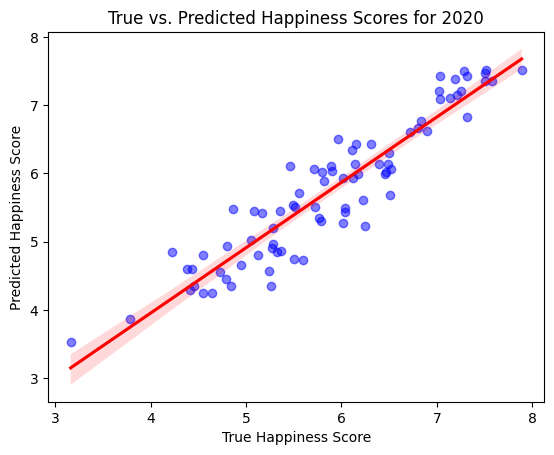

In [155]:
# scatter plot & regression line
sns.regplot(x=df_20_scores['True Happiness Score'],
            y=df_20_scores['Predicted Happiness Score'],
            color='red',
            scatter_kws={'color':'blue',
                         'alpha':0.5})
plt.xlabel('True Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('True vs. Predicted Happiness Scores for 2020')
plt.show()

# worse prediction for 2020 than for 2021 since pandemic impact in 2020
# less participating countries than in 2021!

In [156]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

r2_score_value = r2_score(df_20_scores['True Happiness Score'], df_20_scores['Predicted Happiness Score'])
print('R-squared score:', r2_score_value)

# coefficient lower than in 2021 prediction

R-squared score: 0.8480766202875016


In [157]:
# check MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_20_scores['True Happiness Score'], df_20_scores['Predicted Happiness Score'])
mse = mean_squared_error(df_20_scores['True Happiness Score'], df_20_scores['Predicted Happiness Score'])
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

# similar results as in 2021 prediction
# even though the pandemic hit in 2020, the prediction don't seem to be much worse than the 2021 prediction

Mean Absolute Error (MAE): 0.30787654320987656
Mean Squared Error (MSE): 0.14932133308641973
Root Mean Squared Error (RMSE): 0.3864211861252172


In [158]:
# run Linear Regression model to predict Happiness Scores for 2021 (second model without Country column)

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# filter df to keep only the rows where the Year column is 2021
df_21 = df.loc[df['Year'] == 2021]

# train test split with test size 30%, drop Country
X = df_05_20.drop(['Country','Year','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# One Hot Encoding for categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
cat = ['Region']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# Standardization for numerical variables
scaler = StandardScaler()
num = ['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

# concatenate categorical and numerical variables
X_train = np.concatenate((X_train_cat, X_train[num]), axis=1)
X_test = np.concatenate((X_test_cat, X_test[num]), axis=1)

# Linear Regression model
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

# predict Happiness Scores for 2021
X_21 = df_21.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
X_21_cat = ohe.transform(X_21[cat])
X_21[num] = scaler.transform(X_21[num])
X_21 = np.concatenate((X_21_cat, X_21[num]), axis=1)
y_pred = LinReg.predict(X_21)
y_pred_rounded = np.round(y_pred, 4)

df_21_scores = pd.DataFrame({'Region': df_21['Region'],
                             'True Happiness Score': df_21['Happiness Score'],
                             'Predicted Happiness Score': y_pred_rounded})

df_21_scores['Score Difference'] = df_21_scores['Predicted Happiness Score'] - df_21_scores['True Happiness Score']
df_21_scores['Score Sign'] = np.where(df_21_scores['Score Difference'] > 0, 'Higher', 'Lower')
df_21_scores_sorted = df_21_scores.sort_values(by='Score Difference', ascending=True)
styled_df = df_21_scores_sorted.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_df)

# bad prediction for many Sub-Saharan countries

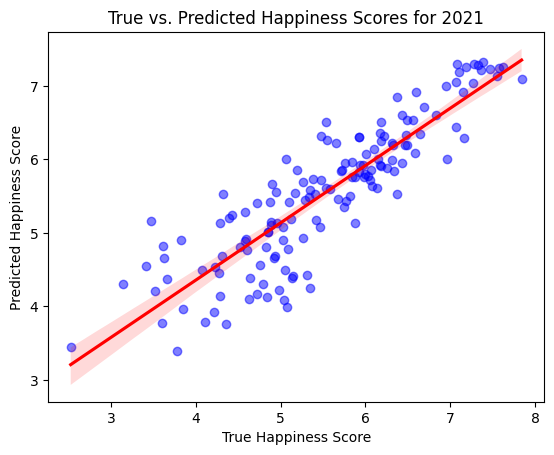

In [159]:
# scatter plot & regression line
sns.regplot(x=df_21_scores['True Happiness Score'],
            y=df_21_scores['Predicted Happiness Score'],
            color='red',
            scatter_kws={'color':'blue',
                         'alpha':0.5})
plt.xlabel('True Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('True vs. Predicted Happiness Scores for 2021')
plt.show()

In [160]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

r2_score_value = r2_score(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
print('R-squared score:', r2_score_value)

# score is higher with the Country column

R-squared score: 0.7702905547908505


In [161]:
# check MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
mse = mean_squared_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

# results are better with the Country column

Mean Absolute Error (MAE): 0.3979348993288591
Mean Squared Error (MSE): 0.26314858852348993
Root Mean Squared Error (RMSE): 0.5129801053876163


In [166]:
# Correlation Matrix for 2006 (2005 has only 1 country)
import warnings
warnings.filterwarnings('ignore')

df_06 = df.loc[df['Year'] == 2006]

# Keep only numeric columns for correlation matrix calculation
numeric_df_06 = df_06.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_06 = numeric_df_06.corr()

# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_06.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2006')

In [168]:
# Correlation Matrix for 2007
import warnings
warnings.filterwarnings('ignore')

df_07 = df.loc[df['Year'] == 2007]
# Keep only numeric columns for correlation matrix calculation
numeric_df_07 = df_07.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_07 = numeric_df_07.corr()

# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_07.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2007')

In [169]:
# Correlation Matrix for 2008
import warnings
warnings.filterwarnings('ignore')

df_08 = df.loc[df['Year'] == 2008]
# Keep only numeric columns for correlation matrix calculation
numeric_df_08 = df_08.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_08 = numeric_df_08.corr()

# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_08.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2008')

In [170]:
# Correlation Matrix for 2009
import warnings
warnings.filterwarnings('ignore')

df_09 = df.loc[df['Year'] == 2009]
# Keep only numeric columns for correlation matrix calculation
numeric_df_09 = df_09.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_09 = numeric_df_09.corr()

# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_09.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2009')

In [171]:
# Correlation Matrix for 2010
import warnings
warnings.filterwarnings('ignore')

df_10 = df.loc[df['Year'] == 2010]
# Keep only numeric columns for correlation matrix calculation
numeric_df_10 = df_10.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_10 = numeric_df_10.corr()

# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_10.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2010')

In [173]:
# Correlation Matrix for 2011
import warnings
warnings.filterwarnings('ignore')

df_11 = df.loc[df['Year'] == 2011]
# Keep only numeric columns for correlation matrix calculation
numeric_df_11 = df_11.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_11 = numeric_df_11.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_11.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2011')

In [174]:
# Correlation Matrix for 2012
import warnings
warnings.filterwarnings('ignore')

df_12 = df.loc[df['Year'] == 2012]
# Keep only numeric columns for correlation matrix calculation
numeric_df_12 = df_12.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_12 = numeric_df_12.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_12.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2012')

In [175]:
# Correlation Matrix for 2013
import warnings
warnings.filterwarnings('ignore')

df_13 = df.loc[df['Year'] == 2013]
# Keep only numeric columns for correlation matrix calculation
numeric_df_13 = df_13.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_13 = numeric_df_13.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_13.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2013')

In [176]:
# Correlation Matrix for 2014
import warnings
warnings.filterwarnings('ignore')

df_14 = df.loc[df['Year'] == 2014]
# Keep only numeric columns for correlation matrix calculation
numeric_df_14 = df_14.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_14 = numeric_df_14.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_14.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2014')

In [177]:
# Correlation Matrix for 2015
import warnings
warnings.filterwarnings('ignore')

df_15 = df.loc[df['Year'] == 2015]
# Keep only numeric columns for correlation matrix calculation
numeric_df_15 = df_15.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_15 = numeric_df_15.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_15.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2015')

In [178]:
# Correlation Matrix for 2016
import warnings
warnings.filterwarnings('ignore')

df_16 = df.loc[df['Year'] == 2016]
# Keep only numeric columns for correlation matrix calculation
numeric_df_16 = df_16.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_16 = numeric_df_16.corr()

# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_16.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2016')

In [179]:
# Correlation Matrix for 2017
import warnings
warnings.filterwarnings('ignore')

df_17 = df.loc[df['Year'] == 2017]
# Keep only numeric columns for correlation matrix calculation
numeric_df_17 = df_17.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_17 = numeric_df_17.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_17.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2017')

In [180]:
# Correlation Matrix for 2018
import warnings
warnings.filterwarnings('ignore')

df_18 = df.loc[df['Year'] == 2018]
# Keep only numeric columns for correlation matrix calculation
numeric_df_18 = df_18.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_18 = numeric_df_18.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_18.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2018')

In [181]:
# Correlation Matrix for 2019
import warnings
warnings.filterwarnings('ignore')

df_19 = df.loc[df['Year'] == 2019]
# Keep only numeric columns for correlation matrix calculation
numeric_df_19 = df_19.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_19 = numeric_df_19.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_19.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2019')

In [182]:
# Correlation Matrix for 2020
import warnings
warnings.filterwarnings('ignore')

df_20 = df.loc[df['Year'] == 2020]
# Keep only numeric columns for correlation matrix calculation
numeric_df_20 = df_20.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_20 = numeric_df_20.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_20.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2020')

In [184]:
# Correlation Matrix for 2021
import warnings
warnings.filterwarnings('ignore')

df_21 = df.loc[df['Year'] == 2021]
# Keep only numeric columns for correlation matrix calculation
numeric_df_21 = df_21.select_dtypes(include=['number']).drop('Year', axis=1)

corr_matrix_df_21 = numeric_df_21.corr()
# define color map
def color_map(val):
    color = 'white'
    if abs(val) == 1:
        color = 'green'
    elif abs(val) >= 0.7:
        color = 'orange'
    elif abs(val) >= 0.4:
        color = 'yellow'
    return f'background-color: {color}'

# apply color map to the correlation matrix
corr_style = corr_matrix_df_21.style.applymap(color_map)

corr_style.set_caption('Correlation Matrix for 2021')

# in all years, GDP seems to have the highest correlation with Happiness Score
# after that follows Life Expectancy, Social Support, Freedom and Corruption
# Generosity seems to have no correlation with Happiness Score

In [185]:
# PCA:
# PCA (Principal Component Analysis) is a dimensionality reduction technique used in machine learning to reduce the number of features in
# a dataset while retaining most of the information. PCA works by identifying the principal components in the data, which are linear
# combinations of the original features that explain the most variance in the data. These principal components are ordered by the amount
# of variance they explain, with the first component explaining the most variance, the second component explaining the second most variance,
# and so on. PCA then creates a new set of features by projecting the data onto the principal components. The new features are uncorrelated
# and represent the directions of maximum variance in the data. By keeping only the top k principal components that explain most of the
# variance in the data, PCA can reduce the dimensionality of the dataset from n features to k features, where k << n. The benefits of
# using PCA include faster training times, improved model performance, and reduced storage requirements. It can also help to identify
# patterns and relationships in the data that may not be visible in the original high-dimensional space. However, it is important to note
# that PCA is not always appropriate for every dataset and should be used with caution. It assumes that the data is linear and normally
# distributed, and may not work well on datasets with complex nonlinear relationships. It is also important to choose the right number
# of principal components to retain, as keeping too few components may result in loss of information, while keeping too many components
# may lead to overfitting.

In [186]:
# perform PCA on 2019 (last year before pandemic hit, check how good model works when external influence)

# filter df to keep only the rows where the Year column is in 2019
df_19 = df.loc[(df['Year'] == 2019)]

X = df_19.drop(['Happiness Score','Happiness Score Classification'], axis=1)
y = df_19['Happiness Score']

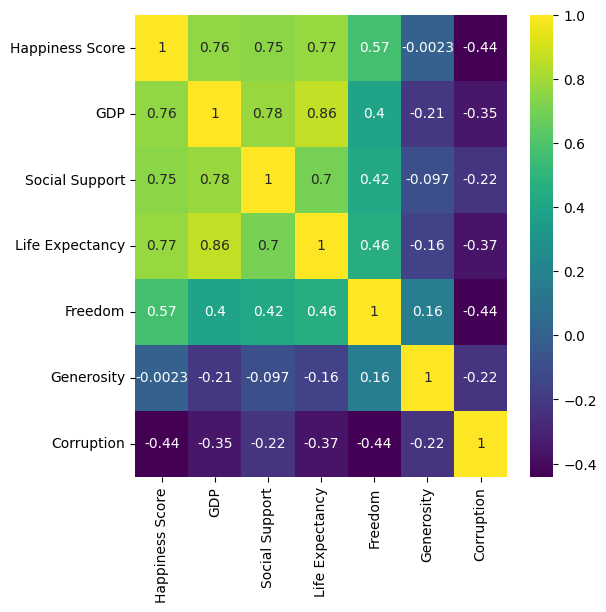

In [187]:
# print correlation matrix
correlation = df_19[['Happiness Score','GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.show()

In [188]:
# set Country column as index column in X
X = X.set_index('Country')

In [189]:
# Standardization (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X[['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption']])

In [190]:
# PCA
from sklearn.decomposition import PCA

pca = PCA()

Coord = pca.fit_transform(X)

The eigenvalues are: [3.10343997 1.35142726 0.64285261 0.55171664 0.28208103 0.11648249]


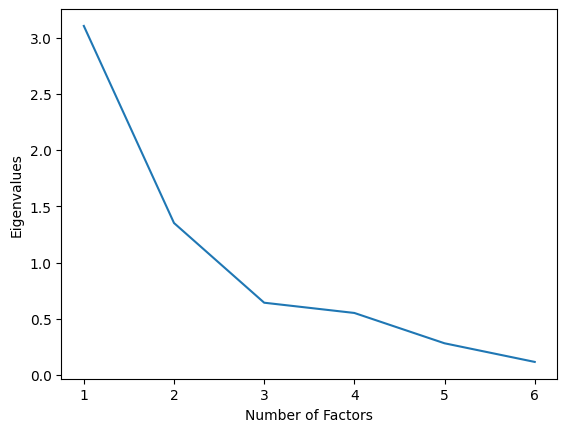

In [191]:
# check eigenvalues
print('The eigenvalues are:', pca.explained_variance_)
plt.plot(np.arange(1,7), pca.explained_variance_)
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalues')
plt.show()

Ratio: [0.51313492 0.22345028 0.10629177 0.09122299 0.04664038 0.01925967]


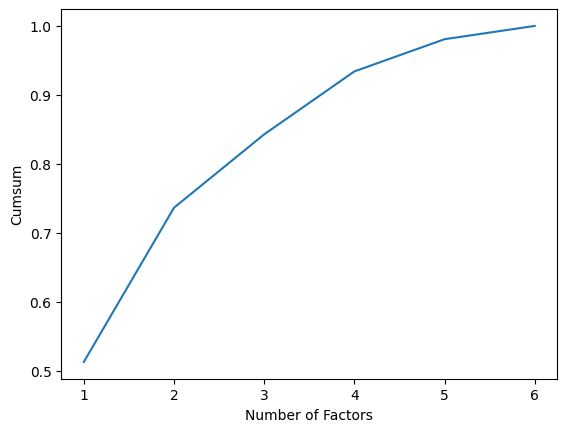

In [192]:
# elbow method
print('Ratio:', pca.explained_variance_ratio_)
plt.plot(np.arange(1,7), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Factors')
plt.ylabel('Cumsum')
plt.show()

# 0.51313492 + 0.22345028 => for 2 axes the explained variance is about 73%

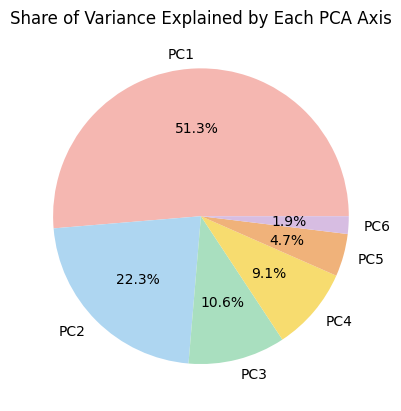

In [193]:
# plot pie chart of the distribution of the share of variance explained by each axis
variance_ratios = pca.explained_variance_ratio_[:6]
labels = ['PC' + str(i+1) for i in range(len(variance_ratios))]

colors = ['#f5b7b1', '#aed6f1', '#a9dfbf', '#f7dc6f', '#f0b27a', '#d7bde2']
plt.pie(variance_ratios, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('Share of Variance Explained by Each PCA Axis')
plt.show()

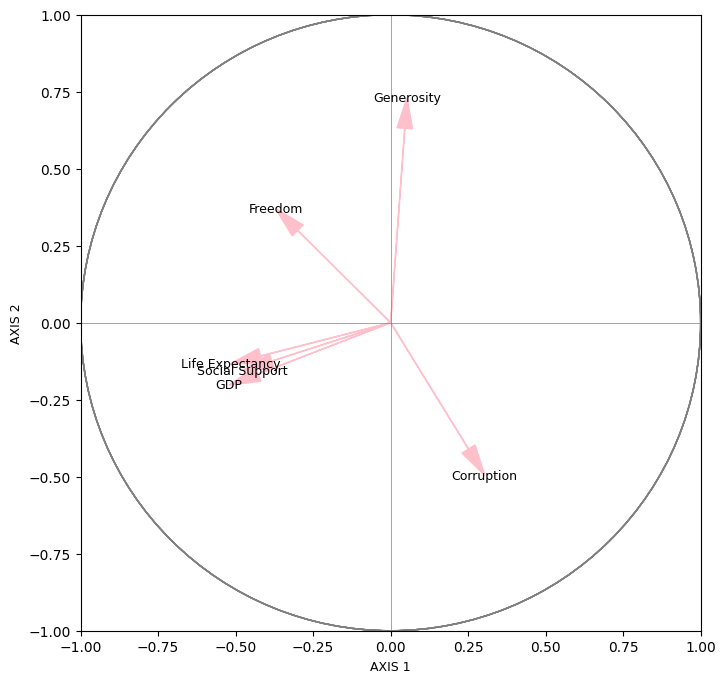

In [194]:
# print correlation circle
components = pd.DataFrame(pca.components_.T,
                          columns=['PC1','PC2','PC3','PC4','PC5','PC6'],
                          index=['GDP','Social Support','Life Expectancy','Freedom','Generosity','Corruption'])

fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

plt.plot([-1.1, 1.1], [0, 0], color='gray', linewidth=0.5)
plt.plot([0, 0], [-1.1, 1.1], color='gray', linewidth=0.5)

for i, (pc1, pc2) in enumerate(zip(components['PC1'], components['PC2'])):
    ax.add_artist(plt.Circle((0,0), radius=1, color='gray', fill=False))
    plt.arrow(0,0,pc1,pc2, head_width=0.05, head_length=0.1, length_includes_head=True, color='pink')
    ax.annotate(components.index[i], xy=(pc1,pc2), ha='center', va='center', fontsize=9)

ax.set_xlabel('AXIS 1'.format(int(pca.explained_variance_ratio_[0]*100)), fontsize=9)
ax.set_ylabel('AXIS 2'.format(int(pca.explained_variance_ratio_[1]*100)), fontsize=9)

plt.show()

# Corruption is positively correlated with the first axis (PC1)
# Freedom is positively correlated with the first axis (PC1) but negatively
# strong correlation between GDP, Life Expectancy and Social Support
# Freedom and Corruption are negatively correlated (makes sense, due to reverse sequence of numbers in Corruption)
# all vectors almost have the same length

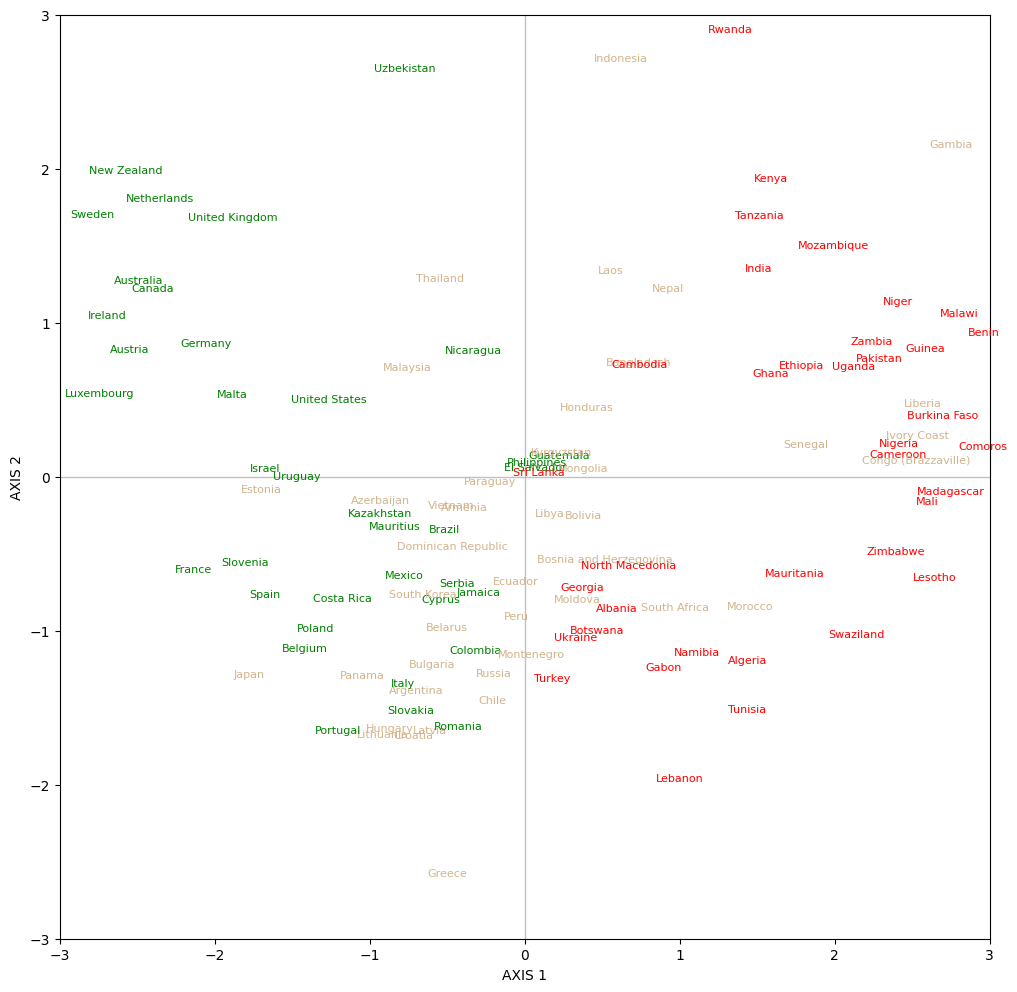

In [195]:
# represent each country on the two axes chosen by PCA
num_classes = 3
num_countries_per_class = len(df_19) // num_classes
thresholds = [np.percentile(df_19['Happiness Score'], i*100/num_classes) for i in range(1, num_classes)]

y_cut = pd.cut(df_19['Happiness Score'],
               bins=[-float('inf')] + thresholds + [float('inf')],
               labels=[i for i in range(num_classes)]).astype(int)

fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-3,3)
axes.set_ylim(-3,3)

df_19 = df_19.reset_index()
for i, (country, y) in enumerate(zip(df_19['Country'], y_cut)):
    if y == 0:
        #axes.scatter(Coord[i,0],Coord[i,1],color='red')
        axes.annotate(country, (Coord[i,0],Coord[i,1]), color='red', fontsize=8)
    elif y == 1:
        #axes.scatter(Coord[i,0],Coord[i,1],color='#D2B48C')
        axes.annotate(country, (Coord[i,0],Coord[i,1]), color='#D2B48C', fontsize=8)
    else:
        #axes.scatter(Coord[i,0],Coord[i,1],color='green')
        axes.annotate(country, (Coord[i,0],Coord[i,1]), color='green', fontsize=8)

axes.set_xlabel('AXIS 1'.format(int(pca.explained_variance_ratio_[0]*100)), fontsize=10)
axes.set_ylabel('AXIS 2'.format(int(pca.explained_variance_ratio_[1]*100)), fontsize=10)

plt.plot([-3, 3], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-3, 3], color='silver', linestyle='-', linewidth=1)
plt.show();

In [196]:
# anaylze PCA plot:

# => only few countries with middle and high Happiness Scores can be explained by Freedom
# => no country can be explained by Generosity (remember: negative values, incomprehensible calculation)
# => several countries with low and middle Happiness Scores can be explained by Corruption
# => several countries with middle and high Happiness Scored can be explained by GDP, Social Support & Life Expectancy => highest correlation

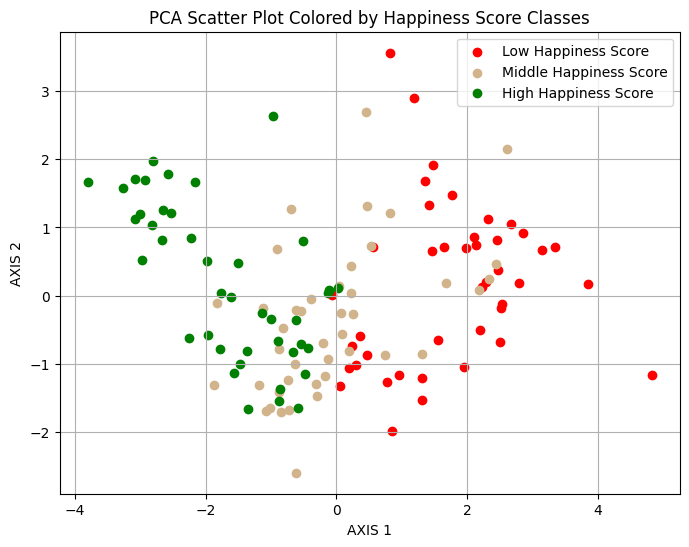

In [197]:
# plot coordinates colored according to Happiness Score Classes

# check array shapes and adjust if necessary
num_countries = min(Coord.shape[0], len(y_cut))
Coord = Coord[:num_countries]
y_cut = y_cut[:num_countries]

# create new df containing coordinates of first two components of PCA and target variable
PCA_mat = pd.DataFrame({'AXIS 1': Coord[:, 0], 'AXIS 2': Coord[:, 1], 'target': y_cut})

class_labels = ['Low Happiness Score', 'Middle Happiness Score', 'High Happiness Score']
colors = ['red', '#D2B48C', 'green']

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    class_data = PCA_mat[PCA_mat['target'] == i]
    plt.scatter(class_data['AXIS 1'], class_data['AXIS 2'], color=colors[i], label=class_labels[i])

plt.xlabel('AXIS 1'.format(int(pca.explained_variance_ratio_[0] * 100)), fontsize=10)
plt.ylabel('AXIS 2'.format(int(pca.explained_variance_ratio_[1] * 100)), fontsize=10)
plt.title('PCA Scatter Plot Colored by Happiness Score Classes')
plt.legend()
plt.grid(True)
plt.show()

In [198]:
# predict Hapiness Scores 2020
# filter df to keep only the rows where the Year column is in 2020
df_20 = df.loc[(df['Year'] == 2020)]

X = df_20.drop(['Happiness Score','Happiness Score Classification'], axis=1)
y = df_20['Happiness Score']

In [199]:
# get unique country names from Coord
coord_countries = set(df_19['Country'])

# filter countries in df_20 to only keep the ones present in Coord
df_20_filtered = df_20[df_20['Country'].isin(coord_countries)]

# reset index of df_20_filtered
df_20_filtered = df_20_filtered.reset_index(drop=True)

# filter coord to only keep the coordinates for countries present in df_20_filtered
Coord_filtered = Coord[df_19['Country'].isin(df_20_filtered['Country'])]

In [200]:
# create new df containing coordinates of first two components of PCA and target variable and predict 2020
PCA_mat = pd.DataFrame({'AXIS 1': Coord_filtered[:, 0], 'AXIS 2': Coord_filtered[:, 1], 'target': df_20_filtered['Happiness Score'].values})

# fit in Linear Regression model
X = PCA_mat[['AXIS 1', 'AXIS 2']]
y = PCA_mat['target']

In [201]:
# Standardization (StandardScaler)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_= scaler.fit_transform(X)

In [202]:
# run Linear Regression
LinReg = LinearRegression()
LinReg.fit(X,y)

LinearRegression()

In [203]:
# check intercept and estimated coefficients of each variable
print('Intercept:', LinReg.intercept_)
print('Coefficients:', LinReg.coef_)

# intercept represents the average value of the target variable when all predictors in the model are equal to zero

# when the variable x increases by 1 unit, y increases on average by the estimated coefficient

Intercept: 5.572388582943684
Coefficients: [-0.56811684  0.02349347]


In [204]:
# check prediction errors
predictions = LinReg.predict(X)
errors = predictions - y
print(errors)

0    -0.074451
1     0.134689
2    -0.029407
3    -0.102402
4     0.012025
5    -0.401836
6    -0.437986
7    -0.139399
8    -0.001232
9    -0.195040
10    0.369361
11    0.894191
12   -0.928640
13    0.018553
14   -0.442219
15    0.113761
16   -0.494275
17   -0.046292
18    0.859819
19    0.318446
20    0.187068
21    0.158246
22    0.107923
23   -0.580066
24    0.127680
25    0.301424
26   -0.457109
27   -0.564906
28    0.079807
29    0.077892
30    0.571046
31    0.164023
32   -0.613129
33   -0.457746
34   -1.004015
35    0.489646
36    0.045125
37    0.231007
38   -0.695165
39    0.049800
40   -0.284080
41   -0.241330
42    0.119996
43    0.105640
44   -0.366261
45   -0.559941
46   -0.076823
47    0.007275
48    0.763150
49    0.547235
50   -0.428281
51   -0.039566
52   -1.223755
53    0.297130
54    0.076628
55    0.559496
56    0.246913
57    0.533007
58    0.224925
59   -0.174257
60   -0.478996
61    0.209983
62    0.180649
63    0.259074
64    0.060968
65   -0.036224
66   -0.15

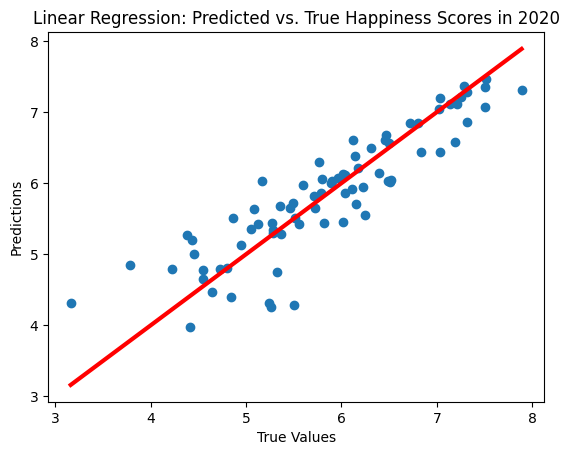

In [205]:
# scatter plot
plt.scatter(y, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression: Predicted vs. True Happiness Scores in 2020')

# plot regression line
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r', lw=3)
plt.show()

In [206]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

print('Coefficient of determination of the model:', LinReg.score(X,y))

# result not as bad as assumed

Coefficient of determination of the model: 0.7952310407422685


In [207]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# results not as bad as assumed

Mean Absolute Error: 0.3316037152086941
Mean Squared Error: 0.19545232517789476
Root Mean Squared Error: 0.44209990406908567


In [208]:
# DecisionTreeRegressor:
# A DecisionTreeRegressor is a type of regression algorithm used in machine learning to model the relationship between a set of input
# features and a continuous target variable. It uses a decision tree as its underlying model, where each internal node of the tree
# represents a test on a specific feature and each leaf node represents a predicted value for the target variable.
# The DecisionTreeRegressor works by recursively partitioning the input feature space into smaller regions based on the values of the
# features. At each internal node of the tree, the algorithm selects the feature and the split value that minimizes the variance
# of the target variable within the resulting partitions. This process is repeated until a stopping criterion is met, such as a maximum
# depth of the tree or a minimum number of samples per leaf node. The DecisionTreeRegressor is a non-parametric algorithm, which means
# that it does not make any assumptions about the underlying distribution of the data. It can handle both continuous and categorical
# input features, and it is robust to outliers and irrelevant input features. However, it can be prone to overfitting, especially
# when the tree is allowed to grow too deep. Overall, the DecisionTreeRegressor is a powerful and flexible algorithm that can be used
# for a wide range of regression problems. However, it is important to carefully tune its hyperparameters and evaluate its performance
# on a validation set to avoid overfitting.

In [209]:
# prepare data for Decision Tree Regressor without Country column
from sklearn.model_selection import train_test_split

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

X = df_05_20.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1333 334 1333 334


In [210]:
# select numerical variables
X_train = X_train.select_dtypes('number')
X_test = X_test.select_dtypes('number')

In [211]:
# Decision Tree Regressor without Country column
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [212]:
# check prediction errors
predictions = dt_reg.predict(X_test)
errors = predictions - y_test
print(errors)

1088    0.927
1136   -0.190
469    -0.353
820     0.460
1882   -0.204
152     0.222
1117    1.207
78     -0.125
398     0.581
321     0.573
555     0.025
1377   -0.031
895    -0.149
234     1.213
637    -0.676
568     0.161
659    -1.068
207    -0.233
56      0.096
1318   -1.392
1176   -0.331
1232   -0.693
1750    0.653
1326    0.844
190     0.409
1913   -0.157
107     0.799
265    -0.351
652    -1.233
1786    0.237
227    -0.345
630     0.705
1660   -0.062
741     0.151
454    -0.017
842     0.398
302    -0.174
1323    0.009
23     -0.001
723    -0.045
687    -0.323
1113   -0.230
1347   -0.568
379    -0.071
1529   -0.587
1173    0.509
858    -0.114
477     0.325
1192    1.034
1194   -0.320
1051   -0.227
1368    0.390
1348   -0.520
491    -0.108
363    -0.693
1620    2.446
73      0.032
835     0.206
32     -0.721
618    -0.070
1394    1.188
1291    0.258
1583    0.377
759    -0.006
1576    0.711
37     -0.733
1470   -0.072
1199   -1.033
1354   -0.002
1716    0.923
489    -0.665
1398  

In [213]:
# evaluate using score method on training and test data
print('score train:', dt_reg.score(X_train,y_train))
print('score test:', dt_reg.score(X_test,y_test))

# huge difference between the train and test scores
# overfitting

score train: 1.0
score test: 0.6699830516374248


In [214]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.44808383233532934
Mean Squared Error: 0.38926522155688625
Root Mean Squared Error: 0.6239112289075155


In [215]:
# run DecisionTreeRegressor model to predict Happiness Scores for 2021

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# filter df to keep only the rows where the Year column is 2021
df_21 = df.loc[df['Year'] == 2021]

# train test split with test size 20%
X = df_05_20.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# select numerical variables
X_train = X_train.select_dtypes('number')
X_test = X_test.select_dtypes('number')

# Decision Tree Regressor without Country column
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train,y_train)

# predict Happiness Scores for 2021
X_21 = df_21.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
X_21 = X_21.select_dtypes('number')
y_21 = df_21['Happiness Score']
y_pred = dt_reg.predict(X_21)
y_pred_rounded = np.round(y_pred, 4)

df_21_scores = pd.DataFrame({'Region': df_21['Region'],
                             'True Happiness Score': df_21['Happiness Score'],
                             'Predicted Happiness Score': y_pred_rounded})

df_21_scores['Score Difference'] = df_21_scores['Predicted Happiness Score'] - df_21_scores['True Happiness Score']
df_21_scores['Score Sign'] = np.where(df_21_scores['Score Difference'] > 0, 'Higher', 'Lower')
df_21_scores_sorted = df_21_scores.sort_values(by='Score Difference', ascending=True)
styled_df = df_21_scores_sorted.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_df)

# Interpretation without country names
# some countries have a way too much positive or negative prediction

In [216]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

r2_score_2021 = r2_score(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])

print('Coefficient of Determination (R²):', r2_score_2021)

Coefficient of Determination (R²): 0.8407492524986119


In [217]:
#check MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
mse = mean_squared_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Mean Absolute Error (MAE): 0.26685906040268464
Mean Squared Error (MSE): 0.18243311409395976
Root Mean Squared Error (RMSE): 0.42712189606008233


In [218]:
# apply GridSearchCV to DecisionTreeRegressor model
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None, 5, 10, 15],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('best parameters:', best_params)
print('best score:', best_score)

best_estimator = grid_search.best_estimator_
test_score = best_estimator.score(X_test, y_test)
print('test Score:', test_score)

best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}
best score: 0.7532216951391968
test Score: 0.7227946949280875


In [219]:
# predict Happiness Scores for 2021 using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_21)
y_pred_rounded = np.round(y_pred, 4)

df_21_scores = pd.DataFrame({'Region': df_21['Region'],
                             'True Happiness Score': df_21['Happiness Score'],
                             'Predicted Happiness Score': y_pred_rounded})

df_21_scores['Score Difference'] = df_21_scores['Predicted Happiness Score'] - df_21_scores['True Happiness Score']
df_21_scores['Score Sign'] = np.where(df_21_scores['Score Difference'] > 0, 'Higher', 'Lower')
df_21_scores_sorted = df_21_scores.sort_values(by='Score Difference', ascending=True)
styled_df = df_21_scores_sorted.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_df)

# predictions look better than before the GridsearchCV

In [220]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

r2 = r2_score(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])

print('Coefficient of Determination (R²):', r2)

# lower coefficient than without GridSearcCV

Coefficient of Determination (R²): 0.7519784735867389


In [221]:
#check MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
mse = mean_squared_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

# results worse than without GridSearchCV

Mean Absolute Error (MAE): 0.382186577181208
Mean Squared Error (MSE): 0.2841263864429529
Root Mean Squared Error (RMSE): 0.5330350705562936


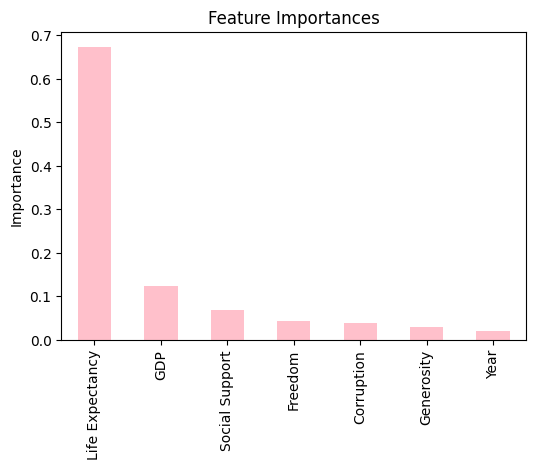

In [222]:
# plot feature importances
feat_importances = pd.Series(dt_reg.feature_importances_, index=X_train.columns)
feat_importances = feat_importances.sort_values(ascending=False)

plt.figure(figsize=(6, 4))
feat_importances.plot(kind='bar',color='pink')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

# Life Expectancy as the most important variable

In [223]:
# run DecisionTreeRegressor with 3 most important variables
X_train_reduced = X_train[['GDP','Social Support','Life Expectancy']]
X_test_reduced = X_test[['GDP','Social Support','Life Expectancy']]

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_reduced,y_train)

DecisionTreeRegressor(random_state=42)

In [224]:
# check prediction errors
predictions = dt_reg.predict(X_test_reduced)
errors = predictions - y_test
print(errors)

1088    0.816
1136   -0.554
469     0.245
820     0.460
1882   -0.609
152    -0.233
1117    0.444
78     -0.544
398     0.764
321     0.048
555    -1.003
1377   -0.031
895     0.433
234     0.838
637     0.186
568     0.572
659    -0.609
207    -1.790
56     -0.190
1318   -0.616
1176   -0.387
1232   -0.012
1750   -0.010
1326    0.661
190     0.080
1913   -0.157
107     1.033
265    -0.628
652    -0.867
1786    0.468
227    -1.374
630     0.718
1660   -0.220
741    -0.296
454    -0.199
842     0.461
302     0.181
1323   -1.048
23      0.009
723    -0.388
687    -0.323
1113   -1.742
1347   -0.389
379    -0.312
1529   -0.475
1173    0.339
858     0.187
477     0.284
1192   -0.032
1194   -0.398
1051   -1.325
1368   -0.495
1348    0.753
491    -1.395
363     0.232
1620    1.304
73      0.075
835    -0.058
32      0.298
618    -0.070
1394    0.571
1291    0.996
1583   -0.058
759    -0.242
1576   -0.256
37     -1.475
1470   -0.072
1199    0.200
1354   -1.295
1716    0.764
489    -0.451
1398  

In [225]:
# evaluate using score method on training and test data
print(dt_reg.score(X_train_reduced,y_train))
print(dt_reg.score(X_test_reduced,y_test))

# similar results
# overfitting

1.0
0.6256582615191055


In [226]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# worst results

Mean Absolute Error: 0.5018293413173652
Mean Squared Error: 0.4415476856287426
Root Mean Squared Error: 0.6644905459287909


In [227]:
# apply feauture importances on 2021:
X_21_reduced = X_21[['GDP','Social Support','Life Expectancy']]

In [228]:
# evaluate 2021
print(dt_reg.score(X_21_reduced,y_21))

0.7420823054793719


In [229]:
# run GridSearchCV with 2021
param_grid = {'max_depth': [None, 5, 10, 15],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5)

grid_search.fit(X_train_reduced, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('Best Parameters:', best_params)
print('Best Score:', best_score)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_21_reduced)

print('score train:', best_model.score(X_train_reduced,y_train))
print('score test:', best_model.score(X_21_reduced,y_21))

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.7491812536302321
score train: 0.7885221029069036
score test: 0.7613500233471292


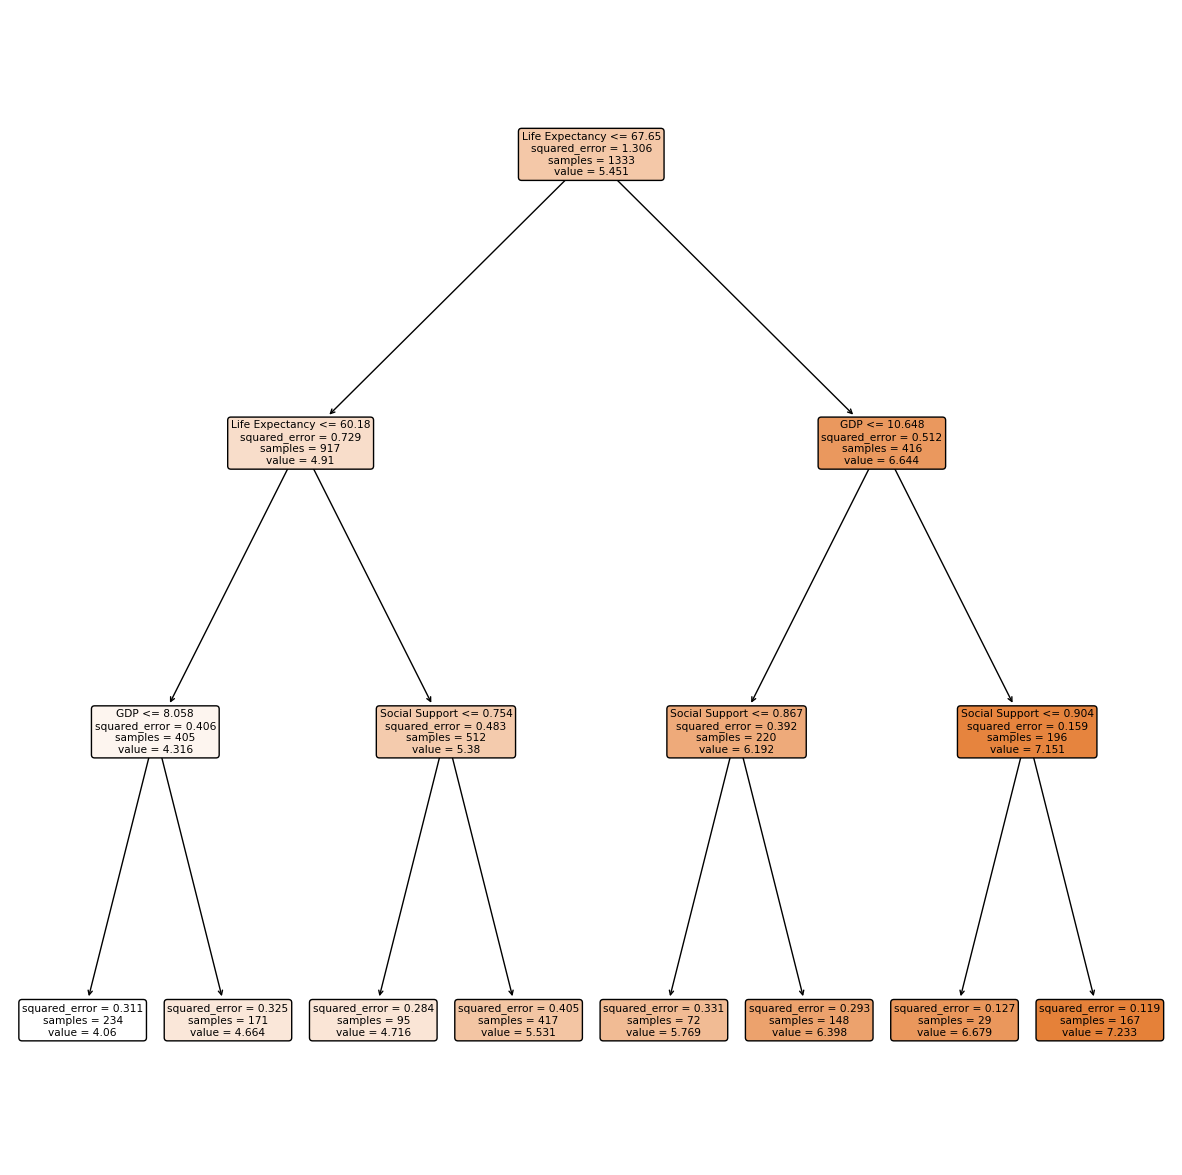

In [230]:
# reinstantiate model by choosing a maximum depth of the tree of 3
from sklearn.tree import plot_tree

dt_reg = DecisionTreeRegressor(random_state=42,max_depth=3)

dt_reg.fit(X_train_reduced,y_train)

fig,ax = plt.subplots(figsize=(15,15))

plot_tree(dt_reg,
          feature_names = ['GDP','Social Support','Life Expectancy'],
          filled = True,
          rounded = True)

plt.show()

# the most samples (417) can be found with an average Happiness Score of 5.531
# the fewest samples (29) can be found with an average Happiness Score of 6.679

# The ordering of features from left to right indicates their importance in the decision-making process.
# Features closer to the root node are considered more important.
# The color of each node represents the majority class or predicted value at that node.
# The intensity of the color can indicate the purity of the node, with darker shades representing more homogeneous classes or values.
# A deeper tree may indicate a more complex decision process.
# However, excessively deep trees can be prone to overfitting.

In [231]:
# RandomForestRegressor:
# Random Forest Regressor is a specific variant of the decision tree-based Random Forest algorithm used for regression tasks. It is a popular machine
# learning model known for its ability to handle complex relationships between features and the target variable, handle outliers, and reduce overfitting
# compared to individual decision trees.
# Ensemble Model: Random Forest Regressor is an ensemble model that combines multiple decision trees to make predictions. It uses the concept of
# bootstrap aggregating (bagging) to create an ensemble of trees.
# Random Feature Selection: Each decision tree in the Random Forest Regressor is trained on a random subset of features. This random feature selection
# helps to decorrelate the trees and reduce the variance of the model.
# Random Data Sampling: During the construction of each decision tree, a random subset of the training data is selected, with replacement. This process
# is known as bootstrap sampling. It introduces diversity into the training process and helps to reduce overfitting.
# rediction Aggregation: The predictions from all the individual decision trees are aggregated to make the final prediction. For regression tasks,
# the typical aggregation method is averaging the predictions from each tree.
# Handling Non-Linear Relationships: Random Forest Regressor can capture complex non-linear relationships between features and the target variable.
# It can model interactions and non-linearities effectively, making it suitable for tasks where linear models may not perform well.
# Robustness to Outliers: Random Forest Regressor is generally robust to outliers in the data. Since each decision tree is trained on a random subset
# of the data, the impact of outliers on the overall model is reduced.
# Feature Importance: Random Forest Regressor provides a measure of feature importance. It can rank the features based on their contribution to the
# predictive performance of the model. This information can be valuable for feature selection and understanding the underlying data.

In [232]:
# prepare data for Random Forest Regressor without Country column
from sklearn.model_selection import train_test_split

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

X = df_05_20.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(len(X_train), len(X_test), len(y_train), len(y_test))

1333 334 1333 334


In [233]:
# One Hot Encoding without Country column
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)

cat = ['Region','Year']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# drop original categorical variables from X_train and X_test
X_train = X_train.drop(cat, axis=1)
X_test = X_test.drop(cat, axis=1)

In [234]:
# concatenate categorical and numerical variables after encoding
X_train = np.concatenate([X_train_cat, X_train], axis=1)
X_test = np.concatenate([X_test_cat, X_test], axis=1)

In [235]:
# Random Forest Regressor without Country column
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [236]:
# check prediction errors
predictions = rf_reg.predict(X_test)
errors = predictions - y_test
print(errors)

1088    0.21786
1136   -0.55257
469     0.54296
820     0.36627
1882   -1.01132
152    -0.00875
1117    0.44852
78      0.03342
398     0.33130
321     0.57266
555     0.01585
1377    0.07364
895     0.14232
234     0.92328
637    -0.60179
568    -0.10485
659    -0.52187
207    -1.52283
56     -0.03522
1318   -0.24328
1176   -0.38214
1232   -0.14376
1750    0.08789
1326    0.40337
190     0.10322
1913    0.06388
107     0.85469
265    -0.38738
652    -0.53148
1786    0.22400
227    -0.20983
630     0.69804
1660   -0.37898
741     0.38928
454    -0.24168
842     0.65216
302    -0.05880
1323   -0.48093
23      0.20936
723     0.09322
687    -0.25094
1113   -0.38841
1347    0.08170
379    -0.13170
1529   -0.14966
1173    0.09528
858     0.11925
477     0.84466
1192   -0.17233
1194   -0.11386
1051   -0.47623
1368    0.23988
1348    0.04163
491    -0.00770
363    -0.53598
1620    0.36882
73      0.01068
835    -0.50316
32      0.20406
618    -0.05183
1394    0.56430
1291    0.50248
1583    

In [237]:
# evaluate using score method on training and test data
print('score train:', rf_reg.score(X_train,y_train))
print('score test:', rf_reg.score(X_test,y_test))

# results look very good

score train: 0.9831708078927653
score test: 0.8620911837531194


In [238]:
# check MAE, MSE, RMSE
# MAE = Mean Absolute Error: average of absolute differences between true and predicted values of the model, easily interpreted with
# respect to target variable, because it has the same unit
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# MSE = Mean Squared Error: average of squared differences between true and predicted values of the target variable, not in the same
# unit as target variable, interpretation more complex, metric penalizes large errors more than MAE, interesting when we absolutely
# want to avoid these problems
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print('Mean Squared Error:', mse)

# RMSE = Root Mean Squared Error: square root of Mean Squared Error, penalizes large differences in prediction, same unit as target
# variable, more interpretable than MSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 0.30904841317365295
Mean Squared Error: 0.1626677241194612
Root Mean Squared Error: 0.40332086992797833


In [239]:
# run RandomForestRegressor model to predict Happiness Scores for 2021

# filter df to keep only the rows where the Year column is in the range 2005-2020
df_05_20 = df.loc[df['Year'].isin(range(2005,2021))]

# filter df to keep only the rows where the Year column is 2021
df_21 = df.loc[df['Year'] == 2021]

# train test split with test size 20%
X = df_05_20.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
y = df_05_20['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# One Hot Encoding without Country column
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first',sparse_output=False)

cat = ['Region']
X_train_cat = ohe.fit_transform(X_train[cat])
X_test_cat = ohe.transform(X_test[cat])

# drop original categorical variables from X_train and X_test
X_train = X_train.drop(cat, axis=1)
X_test = X_test.drop(cat, axis=1)

# concatenate categorical and numerical variables after encoding
X_train = np.concatenate([X_train_cat, X_train], axis=1)
X_test = np.concatenate([X_test_cat, X_test], axis=1)

# Random Forest Regressor without Country column
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)

# predict Happiness Scores for 2021
X_21 = df_21.drop(['Country','Happiness Score','Happiness Score Classification'], axis=1)
X_21_cat = ohe.transform(X_21[cat])
X_21 = X_21.drop(cat, axis=1)
X_21 = np.concatenate([X_21_cat, X_21], axis=1)
y_pred = rf_reg.predict(X_21)
y_pred_rounded = np.round(y_pred, 4)

df_21_scores = pd.DataFrame({'Region': df_21['Region'],
                             'True Happiness Score': df_21['Happiness Score'],
                             'Predicted Happiness Score': y_pred_rounded})

df_21_scores['Score Difference'] = df_21_scores['Predicted Happiness Score'] - df_21_scores['True Happiness Score']
df_21_scores['Score Sign'] = np.where(df_21_scores['Score Difference'] > 0, 'Higher', 'Lower')
df_21_scores_sorted = df_21_scores.sort_values(by='Score Difference', ascending=True)
styled_df = df_21_scores_sorted.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_df)

# Score differences way smaller than in the DecisionTreeRegressor model!

In [240]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

r2 = r2_score(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])

print('Coefficient of Determination (R²):', r2)

# best result so far

Coefficient of Determination (R²): 0.9263633865802104


In [241]:
# check MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
mse = mean_squared_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

# best results so far

Mean Absolute Error (MAE): 0.2033637583892617
Mean Squared Error (MSE): 0.08435600402684562
Root Mean Squared Error (RMSE): 0.2904410508637607


In [242]:
# apply GridSearchCV to RandomForestRegressor model
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None, 5],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 5],
              'n_estimators': [100, 200]}

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print('best parameters:', best_params)
print('best score:', best_score)

best_estimator = grid_search.best_estimator_
test_score = best_estimator.score(X_test, y_test)
print('test Score:', test_score)

best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
best score: 0.8760548088388751
test Score: 0.8707076467256678


In [243]:
# predict Happiness Scores for 2021 using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_21)
y_pred_rounded = np.round(y_pred, 4)

df_21_scores = pd.DataFrame({'Region': df_21['Region'],
                             'True Happiness Score': df_21['Happiness Score'],
                             'Predicted Happiness Score': y_pred_rounded})

df_21_scores['Score Difference'] = df_21_scores['Predicted Happiness Score'] - df_21_scores['True Happiness Score']
df_21_scores['Score Sign'] = np.where(df_21_scores['Score Difference'] > 0, 'Higher', 'Lower')
df_21_scores_sorted = df_21_scores.sort_values(by='Score Difference', ascending=True)
styled_df = df_21_scores_sorted.style.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

display(styled_df)

# less countries with bad prediction

In [244]:
# check coefficient of determination (R²)
from sklearn.metrics import r2_score

r2 = r2_score(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])

print('Coefficient of Determination (R²):', r2)

# similar result as without GridSearchCV

Coefficient of Determination (R²): 0.9218405113622035


In [245]:
# check MAE, MSE, RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
mse = mean_squared_error(df_21_scores['True Happiness Score'], df_21_scores['Predicted Happiness Score'])
rmse = np.sqrt(mse)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

# similar results as without GridSearchCV, slightly worse

Mean Absolute Error (MAE): 0.2082181208053691
Mean Squared Error (MSE): 0.0895372808724832
Root Mean Squared Error (RMSE): 0.29922780765243595
